In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Conv2D, Flatten, Reshape, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras import backend as K
import pickle
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import gc
from sklearn.model_selection import KFold
import seaborn as sab
from sklearn.model_selection import StratifiedKFold
import math
import time
from sklearn.metrics import confusion_matrix
import seaborn as sab
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math
import time

import win32api
import win32con

import keras
import torch
from distutils.dir_util import copy_tree

from tkinter import *
import tkinter
import tkinter.messagebox
from PIL import Image, ImageTk

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
    
import multiprocessing

import gc
gc.collect()

0

In [2]:
multiprocessing.cpu_count()

8

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Функция вычисляет силу руки в определённый момент игры

In [4]:
def get_hand_strength(all_players_cards_cards, board_cards):
    with open('input_information.txt', 'w') as w:
        for i in range(len(all_players_cards_cards)):
            cards = all_players_cards_cards[i]
            for stage in range(4):
                w.write(str(int(stage)) + '\n')
                w.write(str(int(cards[0,0])) + ' ' + str(int(cards[0,1])) + ' ' + str(int(cards[1,0])) + ' ' + str(int(cards[1,1])) + '\n')
                if len(board_cards.shape) == 2:
                    w.write(str(int(board_cards[0,0])) + ' ' + str(int(board_cards[0,1])) + ' ' + str(int(board_cards[1,0])) + ' ' + str(int(board_cards[1,1])) + ' ' +
                            str(int(board_cards[2,0])) + ' ' + str(int(board_cards[2,1])) + ' ' + str(int(board_cards[3,0])) + ' ' + str(int(board_cards[3,1])) + ' ' +
                            str(int(board_cards[4,0])) + ' ' + str(int(board_cards[4,1])))
                else:
                    w.write(str(int(board_cards[i,0,0])) + ' ' + str(int(board_cards[i,0,1])) + ' ' + str(int(board_cards[i,1,0])) + ' ' + str(int(board_cards[i,1,1])) + ' ' +
                            str(int(board_cards[i,2,0])) + ' ' + str(int(board_cards[i,2,1])) + ' ' + str(int(board_cards[i,3,0])) + ' ' + str(int(board_cards[i,3,1])) + ' ' +
                            str(int(board_cards[i,4,0])) + ' ' + str(int(board_cards[i,4,1])))
                if i != len(all_players_cards_cards) - 1 or stage != 3:
                    w.write('\n')
    os.system('C:\\Users\\user\\Notebooks\\Poker\\Poker_calculation\\Hand_strenght\\win-x64\\Test.exe')
    
    stregth = np.zeros((len(all_players_cards_cards), 4))
    outs = np.zeros((len(all_players_cards_cards), 4))
    with open('hand_strength.txt', 'r') as r:
        for i in range(len(all_players_cards_cards)):
            for stage in range(4):
                stregth[i, stage] = float(re.search('[\d,]*',r.readline())[0].replace(',', '.'))
                if stage == 0:
                    stregth[i, 0] = stregth[i, 0] / 23
                outs[i, stage] = float(r.readline())
    return stregth, outs


def get_stronger_hand(cards1, cards2, board_cards):
    if cards1.shape == (2,2):   # когда сравниваются только одна рука с другой
        with open('input_information.txt', 'w') as w:
            w.write(str(int(cards1[0,0])) + ' ' + str(int(cards1[0,1])) + ' ' + str(int(cards1[1,0])) + ' ' + str(int(cards1[1,1])) + '\n')
            w.write(str(int(cards2[0,0])) + ' ' + str(int(cards2[0,1])) + ' ' + str(int(cards2[1,0])) + ' ' + str(int(cards2[1,1])) + '\n')
            w.write(str(int(board_cards[0,0])) + ' ' + str(int(board_cards[0,1])) + ' ' + str(int(board_cards[1,0])) + ' ' + str(int(board_cards[1,1])) + ' ' + 
                    str(int(board_cards[2,0])) + ' ' + str(int(board_cards[2,1])) + ' ' + str(int(board_cards[3,0])) + ' ' + str(int(board_cards[3,1])) + ' ' +
                    str(int(board_cards[4,0])) + ' ' + str(int(board_cards[4,1])))
    else:   # Когда сравниваются списки рук
        with open('input_information.txt', 'w') as w:
            for i in range(len(cards1)):
                w.write(str(int(cards1[i, 0,0])) + ' ' + str(int(cards1[i, 0,1])) + ' ' + str(int(cards1[i, 1,0])) + ' ' + str(int(cards1[i, 1,1])) + '\n')
                w.write(str(int(cards2[i, 0,0])) + ' ' + str(int(cards2[i, 0,1])) + ' ' + str(int(cards2[i, 1,0])) + ' ' + str(int(cards2[i, 1,1])) + '\n')
                w.write(str(int(board_cards[i, 0,0])) + ' ' + str(int(board_cards[i, 0,1])) + ' ' + str(int(board_cards[i, 1,0])) + ' ' + str(int(board_cards[i, 1,1])) + ' ' + 
                        str(int(board_cards[i, 2,0])) + ' ' + str(int(board_cards[i, 2,1])) + ' ' + str(int(board_cards[i, 3,0])) + ' ' + str(int(board_cards[i, 3,1])) + ' ' +
                        str(int(board_cards[i,4,0])) + ' ' + str(int(board_cards[i, 4,1])))
                if i != len(cards1) - 1:
                     w.write('\n')
            
    os.system('C:\\Users\\user\\Notebooks\\Poker\\Poker_calculation\\What_hand_stronger\\win-x64\\Test.exe')
    
    winner_hand = []
    with open('hand_strength.txt', 'r') as r:
        if cards1.shape == (2,2):
            winner_hand = int(r.readline())
        else:
            for i in range(len(cards1)):
                winner_hand.append(int(r.readline()))
                
    return winner_hand             # 1 - cards1 сильнее cards2, 2 - ничья, 3 - cards2 сильнее cards3


In [5]:
player_cards = np.array([
    [ [1, 1], [2, 2] ],
    [ [2, 2], [10, 1] ],
    [ [3, 4], [11, 4] ],
    [ [4, 3], [12, 2] ],
    [ [5, 2], [13, 1] ]
])
board_cards = np.array([
    [ [1, 1], [12, 3], [5, 1], [2, 2], [3, 4] ],
    [ [1, 1], [12, 3], [5, 1], [2, 2], [3, 4] ],
    [ [1, 1], [12, 3], [5, 1], [2, 2], [3, 4] ],
    [ [1, 1], [12, 3], [5, 1], [2, 2], [3, 4] ],
    [ [1, 1], [12, 3], [5, 1], [2, 2], [3, 4] ]
])
get_hand_strength(player_cards, board_cards)


(array([[0.13043478, 0.5111    , 0.9001    , 0.7101    ],
        [0.04347826, 0.235     , 0.5527    , 0.3508    ],
        [0.17391304, 0.3241    , 0.2261    , 0.4399    ],
        [0.13043478, 0.8534    , 0.8044    , 0.9443    ],
        [0.2173913 , 0.7428    , 0.6982    , 0.529     ]]),
 array([[0., 3., 6., 0.],
        [0., 0., 0., 0.],
        [0., 0., 4., 0.],
        [0., 2., 4., 0.],
        [0., 2., 0., 0.]]))

### Создаём список сил рук на префлопе ( для дальнейшего использования вместе с процентом разыгрываемых рук)

In [6]:
def get_list_of_stregths():
    strengths = []
    my_cards =  np.zeros((1,2,2))
    board_cards = np.zeros((5,2))

    for i1 in range(1,14):
        for i2 in range(i1,14):
            my_cards[0,0,0] = i1
            my_cards[0,0,1] = 1
            my_cards[0,1,0] = i2
            my_cards[0,1,1] = 1
            strength, outs = get_hand_strength(my_cards, board_cards)
            strengths.append(strength[0,0])

            my_cards[0,0,0] = i1
            my_cards[0,0,1] = 1
            my_cards[0,1,0] = i2
            my_cards[0,1,1] = 3
            strength, outs = get_hand_strength(my_cards, board_cards)
            strengths.append(strength[0,0])
            strengths.append(strength[0,0])
            strengths.append(strength[0,0])
    strengths.sort()
    return strengths

CPU times: total: 2.19 s
Wall time: 43.5 s


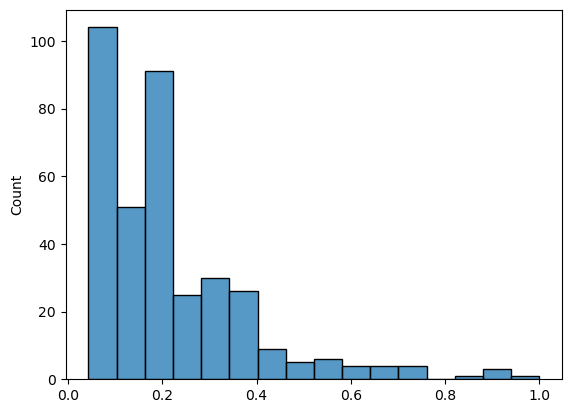

In [7]:
%%time
with tf.device('/GPU:0'):
    array_strengths = np.array(get_list_of_stregths())
    sab.histplot(np.array(array_strengths))

### Строим матрицу пар карт показывающую минимальные VPIP и PFR, с которыми игрок разыгрывал бы эту руку

In [8]:
min_VPIP_and_PFR_for_all_cards = np.zeros((2,14, 14))  # два слоя(0 - одномастные, 1 - разномастных), 1 карта, 2 карта  (индексы карт соответствуют их номиналу: от 1 до 13)

my_cards =  np.zeros((1,2,2))
board_cards = np.zeros((5,2))
for value1 in range(1, 14):
    for value2 in range(value1, 14):
        #if value1 == value2:
            #print(value1, value2)
        for j in range(2):     #j = 0 - одномастные, j = 1 - разномастные
            my_cards[0,0,0] = value1
            my_cards[0,0,1] = 2
            my_cards[0,1,0] = value2
            my_cards[0,1,1] = 2 - j
            strength, outs = get_hand_strength(my_cards, board_cards)
            for i in range(len(array_strengths) - 1, 0, -1):
                if array_strengths[i] <= strength[0, 0]:
                    index = i
                    min_vpip = (len(array_strengths) - index) / len(array_strengths)
                    min_VPIP_and_PFR_for_all_cards[j, value1, value2] = min_vpip
                    break

In [9]:
min_VPIP_and_PFR_for_all_cards[0, 13, 1]

0.0

### Раздел получения вероятностей победы всевозможных пар рук

Каждой возможной руке в соответствие ставиться код, эти коды используются как индексы в матрице вероятностей выигрыша против всех возможных рук

In [10]:
cards_codes = {}    # key - string(card1_value card2_value), value - код руки

code = 0
for card1 in range(1, 14):
    for card2 in range(card1, 14):
        cards_codes[str(card1) + ' ' + str(card2)] = code
        code += 1
        
def get_code_of_hand(card1_value, card2_value):
    return cards_codes[str(min(card1_value, card2_value)) + ' ' + str(max(card1_value, card2_value))]

In [11]:
poss_hand_cards_combinations = len(cards_codes)
matrix_possibilaties_of_win_suited = np.zeros((2, len(cards_codes), len(cards_codes)))   # Первый слой: 0 - вероятности против одномастных, 1 - вероятности против разномастных; код моих карт; код карт противника
matrix_possibilaties_of_win_unsuited = np.zeros((2, len(cards_codes), len(cards_codes)))   # Первый слой: 0 - вероятности против одномастных, 1 - вероятности против разномастных; код моих карт; код карт противника

### Вычисления вероятностей пар рук

Записываются все возможные случаи двух рук и стола для дальнейшего вычисления победителя в этих случаях и вычисления вероятностей победы всех пар рук против всех   (надо добавить исключение случаев с одинаковыми картами в руках)

In [ ]:
hands1 = []
hands2 = []
boards = []
count_played_cases_for_hands = []
current_length_of_all_cases = 0
with tf.device('/GPU:0'):
    for card1 in range(1,14):
        for card2 in range(card1,14):
            for suit in range(2):
                with open('input_for_what_hand_stronger.txt', 'a') as a:
                    for i in range(len(boards)):
                        a.write(hands1[i] + '\n')
                        a.write(hands2[i] + '\n')
                        a.write(boards[i] + '\n')
                hands1 = []
                hands2 = []
                boards = []
                current_length_of_all_cases += len(hands1)
                if not (suit == 0 and card1 == card2):
                    for player_card1 in range(1,14):
                        for player_card2 in range(player_card1,14):
                            for player_suit in range(2):
                                for types_of_suit in range(2):
                                    if not (player_suit == 0 and player_card1 == player_card2):
                                        my_cards = np.zeros((2,2))
                                        player_cards = np.zeros((2,2))
                                        my_cards[0,0] = card1
                                        my_cards[1,0] = card2
                                        player_cards[0, 0] = player_card1
                                        player_cards[1, 0] = player_card2
                                        if suit == player_suit == 0:
                                            my_cards[0,1] = 1 + types_of_suit
                                            my_cards[1,1] = 1 + types_of_suit
                                            player_cards[0, 1] = 2 - types_of_suit
                                            player_cards[1, 1] = 2 - types_of_suit
                                        if suit == 0 and player_suit == 1:
                                            my_cards[0,1] = 1 + types_of_suit
                                            my_cards[1,1] = 1 + types_of_suit
                                            player_cards[0, 1] = 1 if card1 != player_card1 and card2 != player_card1 else (1 if types_of_suit == 1 else 3)
                                            player_cards[1, 1] = 2 if card1 != player_card1 and card2 != player_card1 else (2 if types_of_suit == 0 else 3)
                                        if suit == 1 and player_suit == 0:
                                            my_cards[0,1] = 1 if card1 != player_card1 and card1 != player_card2 else (1 if types_of_suit == 1 else 3)
                                            my_cards[1,1] = 2 if card1 != player_card1 and card1 != player_card2 else (2 if types_of_suit == 0 else 3)
                                            player_cards[0, 1] = 1 + types_of_suit
                                            player_cards[1, 1] = 1 + types_of_suit
                                        if suit == player_suit == 1:
                                            my_cards[0,1] = 1
                                            my_cards[1,1] = 2 if card2 != player_card2 else 4 
                                            player_cards[0, 1] = 1 if card1 != player_card1 else 3
                                            player_cards[1, 1] = 2
                                            my_cards[0,1] += types_of_suit
                                            my_cards[1,1] -= types_of_suit  
                                            player_cards[0, 1] += types_of_suit
                                            player_cards[1, 1] -= types_of_suit
                                        for board_card1 in range(1,14):
                                            for board_card2 in range(board_card1,14):
                                                for board_card3 in range(board_card2,14):
                                                    for board_card4 in range(board_card3,14):
                                                        for board_card5 in range(board_card4,14):
                                                            #for types_of_sim_sutes in range(0,2):
                                                            for simular_suites in range(0, 6):
                                                                board_cards = np.array([ [board_card1, 1], [board_card2, 1], [board_card3, 1], [board_card4, 1], [board_card5, 1] ])
                                                                for j in range(simular_suites, 5):
                                                                    board_cards[j, 1] = 2
                                                                if not ((my_cards[0, 0] == board_cards[0, 0] and my_cards[0, 1] == board_cards[0, 1]) or (my_cards[1, 0] == board_cards[0, 0] and my_cards[1, 1] == board_cards[0, 1]) or 
                                                                        (my_cards[0, 0] == board_cards[1, 0] and my_cards[0, 1] == board_cards[1, 1]) or (my_cards[1, 0] == board_cards[1, 0] and my_cards[1, 1] == board_cards[1, 1]) or 
                                                                        (my_cards[0, 0] == board_cards[2, 0] and my_cards[0, 1] == board_cards[2, 1]) or (my_cards[1, 0] == board_cards[2, 0] and my_cards[1, 1] == board_cards[2, 1]) or 
                                                                        (my_cards[0, 0] == board_cards[3, 0] and my_cards[0, 1] == board_cards[3, 1]) or (my_cards[1, 0] == board_cards[3, 0] and my_cards[1, 1] == board_cards[3, 1]) or 
                                                                        (my_cards[0, 0] == board_cards[4, 0] and my_cards[0, 1] == board_cards[4, 1]) or (my_cards[1, 0] == board_cards[4, 0] and my_cards[1, 1] == board_cards[4, 1]) or 
                                                                        (player_cards[0, 0] == board_cards[0, 0] and player_cards[0, 1] == board_cards[0, 1]) or (player_cards[1, 0] == board_cards[0, 0] and player_cards[1, 1] == board_cards[0, 1]) or 
                                                                        (player_cards[0, 0] == board_cards[1, 0] and player_cards[0, 1] == board_cards[1, 1]) or (player_cards[1, 0] == board_cards[1, 0] and player_cards[1, 1] == board_cards[1, 1]) or 
                                                                        (player_cards[0, 0] == board_cards[2, 0] and player_cards[0, 1] == board_cards[2, 1]) or (player_cards[1, 0] == board_cards[2, 0] and player_cards[1, 1] == board_cards[2, 1]) or 
                                                                        (player_cards[0, 0] == board_cards[3, 0] and player_cards[0, 1] == board_cards[3, 1]) or (player_cards[1, 0] == board_cards[3, 0] and player_cards[1, 1] == board_cards[3, 1]) or 
                                                                        (player_cards[0, 0] == board_cards[4, 0] and player_cards[0, 1] == board_cards[4, 1]) or (player_cards[1, 0] == board_cards[4, 0] and player_cards[1, 1] == board_cards[4, 1]) or
                                                                        (board_cards[0, 0] == board_cards[1, 0] and board_cards[0, 1] == board_cards[1, 1]) or (board_cards[0, 0] == board_cards[2, 0] and board_cards[0, 1] == board_cards[2, 1]) or
                                                                        (board_cards[0, 0] == board_cards[3, 0] and board_cards[0, 1] == board_cards[3, 1]) or (board_cards[0, 0] == board_cards[4, 0] and board_cards[0, 1] == board_cards[4, 1]) or
                                                                        (board_cards[1, 0] == board_cards[2, 0] and board_cards[1, 1] == board_cards[2, 1]) or (board_cards[1, 0] == board_cards[3, 0] and board_cards[1, 1] == board_cards[3, 1]) or
                                                                        (board_cards[1, 0] == board_cards[4, 0] and board_cards[1, 1] == board_cards[4, 1]) or (board_cards[2, 0] == board_cards[3, 0] and board_cards[2, 1] == board_cards[3, 1]) or
                                                                        (board_cards[2, 0] == board_cards[4, 0] and board_cards[2, 1] == board_cards[4, 1]) or (board_cards[3, 0] == board_cards[4, 0] and board_cards[3, 1] == board_cards[4, 1]) or
                                                                        (my_cards[0, 0] == player_cards[0, 0] and my_cards[0, 1] == player_cards[0, 1]) or (my_cards[0, 0] == player_cards[1, 0] and my_cards[0, 1] == player_cards[1, 1]) or 
                                                                        (my_cards[1, 0] == player_cards[0, 0] and my_cards[1, 1] == player_cards[0, 1]) or (my_cards[1, 0] == player_cards[1, 0] and my_cards[1, 1] == player_cards[1, 1]) or
                                                                        (my_cards[0, 0] == my_cards[1, 0] and my_cards[0, 1] == my_cards[1, 1]) or (player_cards[0, 0] == player_cards[1, 0] and player_cards[0, 1] == player_cards[1, 1])):
                                                                    boards.append(str(int(board_cards[0,0])) + ' ' + str(int(board_cards[0,1])) + ' ' + str(int(board_cards[1,0])) + ' ' + str(int(board_cards[1,1])) + ' ' + str(int(board_cards[2,0])) + ' ' + str(int(board_cards[2,1])) + ' ' + str(int(board_cards[3,0])) + ' ' + str(int(board_cards[3,1])) + ' ' + str(int(board_cards[4,0])) + ' ' + str(int(board_cards[4,1])))
                                                                    hands1.append(str(int(my_cards[0,0])) + ' ' + str(int(my_cards[0,1])) + ' ' + str(int(my_cards[1,0])) + ' ' + str(int(my_cards[1,1])))
                                                                    hands2.append(str(int(player_cards[0,0])) + ' ' + str(int(player_cards[0,1])) + ' ' + str(int(player_cards[1,0])) + ' ' + str(int(player_cards[1,1])))

                                    print(len(hands1), len(hands2), len(boards))
                                    print('DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee', get_code_of_hand(card1, card2),get_code_of_hand(player_card1, player_card2))
                            count_played_cases_for_hands.append(current_length_of_all_cases + len(hands1))

    with open('input_for_what_hand_stronger.txt', 'a') as a:
        for i in range(len(boards)):
            a.write(hands1[i] + '\n')
            a.write(hands2[i] + '\n')
            a.write(boards[i] + '\n')
                        
    with open('count_played_cases_for_hands.txt', 'w') as w:
        for cases_checked in count_played_cases_for_hands:
            w.write(str(cases_checked) + '\n')

Считывание результатов определения победителей среди всех возможный пар рук и всевозможных столов (заполнение таблицы вероятностей победы всех рук против всех)

In [ ]:
win_cases = 0
lose_cases = 0
first_time = True
with open('hand_strength(результаты_раздач_для_всех_пар_рук).txt', 'r') as r:
    while True:
        line = r.readline()
        if line == None or line == '\n':
            break
        line = line.split()
        
        if line[0] == 'hands':   # Строка показывающая результаты для данной пары рук
            if not first_time:
                if int(line[1]) != my_hand[0][0] or int(line[3]) != my_hand[1][0]:
                    print('My hand', my_hand, 'Player hand', player_hand)
                # Сохраняем вероятности для прошлой рассмотренной пары рук
                if my_suite == 0:
                    matrix_possibilaties_of_win_suited[player_suite, get_code_of_hand(my_hand[0][0], my_hand[1][0]), get_code_of_hand(player_hand[0][0], player_hand[1][0])] = win_cases / (win_cases + lose_cases)
                else:
                    matrix_possibilaties_of_win_unsuited[player_suite, get_code_of_hand(my_hand[0][0], my_hand[1][0]), get_code_of_hand(player_hand[0][0], player_hand[1][0])] = win_cases / (win_cases + lose_cases)
            # Записываем карты в текущей паре рук
            my_hand = [ [int(line[1]), int(line[2])], [int(line[3]), int(line[4])] ]
            player_hand = [ [int(line[5]), int(line[6])], [int(line[7]), int(line[8])] ]
            my_suite = 0 if my_hand[0][1] == my_hand[1][1] else 1
            player_suite = 0 if player_hand[0][1] == player_hand[1][1] else 1
            first_time = False
            win_cases = 0
            lose_cases = 0
        else:      # На каждой строке результат конкретной раздачи данной пары рук
            if line[0] == '1':
                win_cases += 1
            if line[0] == '3':
                lose_cases += 1

Исправление ошибок вычислений

In [ ]:
for card1 in range(1,14):
    for card2 in range(card1,14):
        for suit in range(2):
            for player_card1 in range(1,14):
                for player_card2 in range(player_card1,14):
                    for player_suit in range(2):
                        # Заменяем некоторые неправильновычисленные вероятности
                        if suit == 0 and player_suit == 1:
                            if card1 == player_card1:
                                if player_card2 != player_card1:
                                    matrix_possibilaties_of_win_suited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.8 if card2 > player_card2 else (0.55 if card2 == player_card2 else 0.3)
                                else:
                                    matrix_possibilaties_of_win_suited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.3 
                            if card2 == player_card1:
                                if player_card2 != player_card1:
                                    matrix_possibilaties_of_win_suited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.27
                                else:
                                    matrix_possibilaties_of_win_suited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.13 
                        if suit == 1 and player_suit == 0:
                            if card1 == player_card1:
                                if card1 != card2:
                                    matrix_possibilaties_of_win_unsuited[0, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.53 if card2 > player_card2 else (0.45 if card2 == player_card2 else 0.35)
                                else:
                                    matrix_possibilaties_of_win_unsuited[0, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.65
                            if card1 == player_card2:
                                if card1 != card2:
                                    matrix_possibilaties_of_win_unsuited[0, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.7
                                else:
                                    matrix_possibilaties_of_win_unsuited[0, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.85
                        if suit == 1 and player_suit == 1:
                            if card2 == player_card2 and card1 != player_card1:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.73 if card1 > player_card1 else 0.27
                            if card2 != player_card2 and card1 == player_card1:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.7 if card2 > player_card2 else 0.3 
                            if card2 == player_card2 and card1 == player_card1:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.5
                            if card2 != player_card1 and card1 == player_card2:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.75 if card1 != card2 and player_card1 != player_card2 else (0.88 if card1 == card2 and player_card1 != player_card2 else (0.32 if card1 != card2 and player_card1 == player_card2 else matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)]))
                            if card2 == player_card1 and card1 != player_card2:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.25 if card1 != card2 and player_card1 != player_card2 else (0.68 if card1 == card2 and player_card1 != player_card2 else (0.12 if card1 != card2 and player_card1 == player_card2 else matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)]))
                            if card2 == card1 and player_card1 == player_card2:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.8 if card2 > player_card2 else (0.5 if card2 == player_card2 else 0.2)
                            if card2 > player_card2 and card1 != player_card1 and card1 != player_card2:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.62 if card1 > player_card1 and card1 > player_card2 else (0.6 if card1 > player_card1 and card1 < player_card2 else (0.55 if card1 < player_card1 and card1 < player_card2 else matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)]))
                            if card2 < player_card2 and card1 != player_card1 and card2 != player_card1:
                                matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)] = 0.4 if card2 > player_card1 and card1 > player_card1 else (0.58 if card2 > player_card1 and card1 < player_card1 else (0.38 if card2 < player_card1 and card1 < player_card1 else matrix_possibilaties_of_win_unsuited[1, get_code_of_hand(card1, card2), get_code_of_hand(player_card1, player_card2)]))
                            
                            
                        # Удаляем одномастные пары
                        if card1 == card2 and suit == 0:
                            matrix_possibilaties_of_win_suited[0, get_code_of_hand(card1, card2)] = [0] * poss_hand_cards_combinations 
                            matrix_possibilaties_of_win_suited[1, get_code_of_hand(card1, card2)] = [0] * poss_hand_cards_combinations 
                        if player_card1 == player_card2 and player_suit == 0:
                            matrix_possibilaties_of_win_suited[0, :, get_code_of_hand(player_card1, player_card2)] = [0] * poss_hand_cards_combinations 
                            matrix_possibilaties_of_win_unsuited[0, :, get_code_of_hand(player_card1, player_card2)] = [0] * poss_hand_cards_combinations 

Сохранение матриц вероятностей

In [ ]:
np.save('Вероятности победы/suite_vs_suited', matrix_possibilaties_of_win_suited[0])
np.save('Вероятности победы/suite_vs_unsuited', matrix_possibilaties_of_win_suited[1])
np.save('Вероятности победы/unsuite_vs_suited', matrix_possibilaties_of_win_unsuited[0])
np.save('Вероятности победы/unsuite_vs_unsuited', matrix_possibilaties_of_win_unsuited[1])

### Вычисление распределений (для каждой руки) вероятностей получения силы руки со случайно открытыми общими картами(на всех стадиях: флоп тёрн и ривер)

Earth Mover’s Distance (метрика показывающее расстояние между распределением силы руки на определённой стадии)

In [127]:
def EMD(p, q):
    p = torch.tensor(p)
    q = torch.tensor(q)
    x = p - q
    y = torch.cumsum(x, dim=0)
    return y.abs().sum()

Вычилсяется среднее расстояние руки от всех других

In [128]:
def avr_strength_of_diapozon(diapozon):
    strength = 0
    for i in range(len(diapozon)):
        strength += float(i) / 100 * diapozon[i]
    return strength

In [129]:
def get_avr_EMD(hand):
    my_card1 = int(hand[0, 0])
    my_card2 = int(hand[1, 0])
    my_suite = 1 if hand[0, 1] != hand[1, 1] else 0
    my_code = get_code_of_hand(my_card1, my_card2)
    
    sum_distace = np.zeros((3))
    counter = 0
    for card1 in range(1, 14):
        for card2 in range(card1, 14):
            player_code = get_code_of_hand(card1, card2)
            for suite in range(2):
                if not (card1 == card2 and suite == 0):
                    counter += 1
                    for stage in range(3):
                        dist = EMD(strengths_diapozons[suite, stage, player_code], strengths_diapozons[my_suite, stage, my_code])
                        if avr_strength_of_diapozon(strengths_diapozons[my_suite, stage, my_code]) >= avr_strength_of_diapozon(strengths_diapozons[suite, stage, player_code]):
                            sum_distace[stage] += dist
                        else:
                            sum_distace[stage] -= dist                
    sum_distace = sum_distace / counter
    return sum_distace

In [131]:
get_avr_EMD(np.array([ [10, 1], [10, 2] ]))

array([40.41023982, 28.57892836, 16.52264249])

Вычисляются диапозоны вероятностей силы руки на разных стадиях постфлопа  (диапозоны для конкретной руки)

In [ ]:
def computing_diapozons_postflop_hands():
    hand = ''
    boards = []
    count_played_cases_for_hands = []
    current_length_of_all_cases = 0
    with tf.device('/GPU:0'):
        for card1 in range(1,14):
            for card2 in range(card1,14):
                for suit in range(2):
                    with open('input_for_postflop_hands_diapozons.txt', 'a') as a:  
                        a.write('Hand' + ' ' + hand + '\n')
                        for i in range(len(boards)):
                            a.write(boards[i] + '\n')
                    hand = ''
                    boards = []
                    if not (suit == 0 and card1 == card2):
                        my_cards = np.zeros((2,2))
                        my_cards[0,0] = card1
                        my_cards[1,0] = card2
                        tmp = random.randint(1,4)
                        my_cards[0,1] = tmp if suit == 0 else 1
                        my_cards[1,1] = tmp if suit == 0 else 3
                        for board_card1 in range(1,14):
                            for board_card2 in range(board_card1,14):
                                for board_card3 in range(board_card2,14):
                                    for board_card4 in range(board_card3,14):
                                        for board_card5 in range(board_card4,14):
                                            for suit1 in range(1,4):
                                                for suite2 in range(suit1 + 1, 4):
                                                    for simular_suites in range(0, 6):
                                                        board_cards = np.array([ [board_card1, suit1], [board_card2, suit1], [board_card3, suit1], [board_card4, suit1], [board_card5, suit1] ])
                                                        for j in range(simular_suites, 5):
                                                            board_cards[j, 1] = suite2
                                                            
                                                        if not ((my_cards[0, 0] == board_cards[0, 0] and my_cards[0, 1] == board_cards[0, 1]) or (my_cards[1, 0] == board_cards[0, 0] and my_cards[1, 1] == board_cards[0, 1]) or 
                                                                (my_cards[0, 0] == board_cards[1, 0] and my_cards[0, 1] == board_cards[1, 1]) or (my_cards[1, 0] == board_cards[1, 0] and my_cards[1, 1] == board_cards[1, 1]) or 
                                                                (my_cards[0, 0] == board_cards[2, 0] and my_cards[0, 1] == board_cards[2, 1]) or (my_cards[1, 0] == board_cards[2, 0] and my_cards[1, 1] == board_cards[2, 1]) or 
                                                                (my_cards[0, 0] == board_cards[3, 0] and my_cards[0, 1] == board_cards[3, 1]) or (my_cards[1, 0] == board_cards[3, 0] and my_cards[1, 1] == board_cards[3, 1]) or 
                                                                (my_cards[0, 0] == board_cards[4, 0] and my_cards[0, 1] == board_cards[4, 1]) or (my_cards[1, 0] == board_cards[4, 0] and my_cards[1, 1] == board_cards[4, 1]) or 
                                                                (board_cards[0, 0] == board_cards[1, 0] and board_cards[0, 1] == board_cards[1, 1]) or (board_cards[0, 0] == board_cards[2, 0] and board_cards[0, 1] == board_cards[2, 1]) or
                                                                (board_cards[0, 0] == board_cards[3, 0] and board_cards[0, 1] == board_cards[3, 1]) or (board_cards[0, 0] == board_cards[4, 0] and board_cards[0, 1] == board_cards[4, 1]) or
                                                                (board_cards[1, 0] == board_cards[2, 0] and board_cards[1, 1] == board_cards[2, 1]) or (board_cards[1, 0] == board_cards[3, 0] and board_cards[1, 1] == board_cards[3, 1]) or
                                                                (board_cards[1, 0] == board_cards[4, 0] and board_cards[1, 1] == board_cards[4, 1]) or (board_cards[2, 0] == board_cards[3, 0] and board_cards[2, 1] == board_cards[3, 1]) or
                                                                (board_cards[2, 0] == board_cards[4, 0] and board_cards[2, 1] == board_cards[4, 1]) or (board_cards[3, 0] == board_cards[4, 0] and board_cards[3, 1] == board_cards[4, 1])): 
                                                            boards.append(str(int(board_cards[0,0])) + ' ' + str(int(board_cards[0,1])) + ' ' + str(int(board_cards[1,0])) + ' ' + str(int(board_cards[1,1])) + ' ' + str(int(board_cards[2,0])) + ' ' + str(int(board_cards[2,1])) + ' ' + str(int(board_cards[3,0])) + ' ' + str(int(board_cards[3,1])) + ' ' + str(int(board_cards[4,0])) + ' ' + str(int(board_cards[4,1])))
                                                            hand = str(int(my_cards[0,0])) + ' ' + str(int(my_cards[0,1])) + ' ' + str(int(my_cards[1,0])) + ' ' + str(int(my_cards[1,1]))
                print('DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee', get_code_of_hand(card1, card2), hand, len(boards))
    # Сохраняется последняя итерации перебора рук
    with open('input_for_postflop_hands_diapozons.txt', 'a') as a:
        a.write('Hand' + ' ' + hand + '\n')
        for i in range(len(boards)):
            a.write(boards[i] + '\n')


In [ ]:
computing_diapozons_postflop_hands()

Вычисляются вероятности того, что рука будет иметь определённую силу, при выбранном флопе  (диапозоны для конкретного флопа)

In [26]:
a = [np.zeros(3), np.zeros(3)]
a = np.array(a)
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [56]:
def computing_diapozons_postflop_boards(): 
    #count_played_cases_for_hands = []
    #current_length_of_all_cases = 0
    new_flop_hand = False
    new_turn_hand = False
    with tf.device('/GPU:0'):
        for board_card1 in range(1,14):
            for board_card2 in range(board_card1,14):
                for board_card3 in range(board_card2,14):
                    new_flop_hand = True
                    for board_card4 in range(board_card3,14):
                        new_turn_hand = True
                        for board_card5 in range(board_card4,14):
                            for simular_suites in range(0, 6):
                                board_cards = np.array([ [board_card1, 1], [board_card2, 1], [board_card3, 1], [board_card4, 1], [board_card5, 1] ])

                                for j in range(simular_suites, 5):
                                    board_cards[j, 1] = 2
                                hands = []
                                boards = []   
                                board_str = ''
                                for card1 in range(1,14):
                                    for card2 in range(card1,14):
                                        for suit1 in range(1, 4):
                                            for suit2 in range(1, 4):
                                                if not (suit1 == suit2 and card1 == card2):
                                                    my_cards = np.zeros((2,2))
                                                    my_cards[0,0] = card1
                                                    my_cards[1,0] = card2
                                                    my_cards[0,1] = suit1
                                                    my_cards[1,1] = suit2

                                                    #print(board_cards)
                                                    if not ((my_cards[0, 0] == board_cards[0, 0] and my_cards[0, 1] == board_cards[0, 1]) or (my_cards[1, 0] == board_cards[0, 0] and my_cards[1, 1] == board_cards[0, 1]) or 
                                                            (my_cards[0, 0] == board_cards[1, 0] and my_cards[0, 1] == board_cards[1, 1]) or (my_cards[1, 0] == board_cards[1, 0] and my_cards[1, 1] == board_cards[1, 1]) or 
                                                            (my_cards[0, 0] == board_cards[2, 0] and my_cards[0, 1] == board_cards[2, 1]) or (my_cards[1, 0] == board_cards[2, 0] and my_cards[1, 1] == board_cards[2, 1]) or 
                                                            (my_cards[0, 0] == board_cards[3, 0] and my_cards[0, 1] == board_cards[3, 1]) or (my_cards[1, 0] == board_cards[3, 0] and my_cards[1, 1] == board_cards[3, 1]) or 
                                                            (my_cards[0, 0] == board_cards[4, 0] and my_cards[0, 1] == board_cards[4, 1]) or (my_cards[1, 0] == board_cards[4, 0] and my_cards[1, 1] == board_cards[4, 1]) or 
                                                            (board_cards[0, 0] == board_cards[1, 0] and board_cards[0, 1] == board_cards[1, 1]) or (board_cards[0, 0] == board_cards[2, 0] and board_cards[0, 1] == board_cards[2, 1]) or
                                                            (board_cards[0, 0] == board_cards[3, 0] and board_cards[0, 1] == board_cards[3, 1]) or (board_cards[0, 0] == board_cards[4, 0] and board_cards[0, 1] == board_cards[4, 1]) or
                                                            (board_cards[1, 0] == board_cards[2, 0] and board_cards[1, 1] == board_cards[2, 1]) or (board_cards[1, 0] == board_cards[3, 0] and board_cards[1, 1] == board_cards[3, 1]) or
                                                            (board_cards[1, 0] == board_cards[4, 0] and board_cards[1, 1] == board_cards[4, 1]) or (board_cards[2, 0] == board_cards[3, 0] and board_cards[2, 1] == board_cards[3, 1]) or
                                                            (board_cards[2, 0] == board_cards[4, 0] and board_cards[2, 1] == board_cards[4, 1]) or (board_cards[3, 0] == board_cards[4, 0] and board_cards[3, 1] == board_cards[4, 1])): 
                                                        #print('hii')
                                                        #boards.append(board_cards)
                                                        board_str = str(int(board_cards[0,0])) + ' ' + str(int(board_cards[0,1])) + ' ' + str(int(board_cards[1,0])) + ' ' + str(int(board_cards[1,1])) + ' ' + str(int(board_cards[2,0])) + ' ' + str(int(board_cards[2,1])) + ' ' + str(int(board_cards[3,0])) + ' ' + str(int(board_cards[3,1])) + ' ' + str(int(board_cards[4,0])) + ' ' + str(int(board_cards[4,1]))
                                                        #hands.append(my_cards)
                                                        hands.append(str(int(my_cards[0,0])) + ' ' + str(int(my_cards[0,1])) + ' ' + str(int(my_cards[1,0])) + ' ' + str(int(my_cards[1,1])))
                                                        
                                if len(hands) > 0:
                                    with open('input_for_postflop_boards_diapozons.txt', 'a') as a:  
                                        a.write('Board' + ' ' + board_str + '\n')
                                        for i in range(len(hands)):
                                            a.write(hands[i] + '\n')
                                            
                                    print('DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee', board_card1, board_card2, board_card3, board_card4, board_card5)
                                
                                '''#print(hands)
                                strengths, outs = get_hand_strength(np.array(hands), np.array(boards))
                                #print(strengths)
                                for i in range(len(strengths)):
                                    diapozons_for_boards_river[board_card1 - 1, board_card2 - 1, board_card3 - 1, board_card4 - 1, board_card5 - 1, simular_suites, round(strengths[i, 3] * 100)] += 1
                                    if new_turn_hand:
                                        if simular_suites > 4:
                                            diapozons_for_boards_turn[board_card1 - 1, board_card2 - 1, board_card3 - 1, board_card4 - 1, 4, round(strengths[i, 2] * 100)] += 1
                                        else:
                                            diapozons_for_boards_turn[board_card1 - 1, board_card2 - 1, board_card3 - 1, board_card4 - 1, simular_suites, round(strengths[i, 2] * 100)] += 1
                                    if new_flop_hand:
                                        if simular_suites > 3:
                                            diapozons_for_boards_flop[board_card1 - 1, board_card2 - 1, board_card3 - 1, 3, round(strengths[i, 1] * 100)] += 1
                                        else:
                                            diapozons_for_boards_flop[board_card1 - 1, board_card2 - 1, board_card3 - 1, simular_suites, round(strengths[i, 1] * 100)] += 1'''
                                    
                                


In [57]:
computing_diapozons_postflop_boards()

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 4
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 5
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 3 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 4 5
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 4 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 4 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 2 4 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 1 4 12 13
DDDDDDDDDDDDDDDDDDdddddooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 6 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 2 7 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 3 9 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 6 8
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 7 8 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 8 10 12
DDDDDDDDDDDDDDDDDDddd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 2 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 5
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 4 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 5 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 5 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 3 5 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 4 10 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 5 8 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 6 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 3 8 12 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 4 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 4 9 10 12
DDDDDDDDDDDDDDDDDDdddddo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 6 7 11
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 7 8 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 8 10 11
DDDDDDDDDDDDDDDDDDdddddoooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 5 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 6 8 11
DDDDDDDDDDDDDDDDDDdddddoooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 7 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 8 9 11
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 6 10 12 12
DDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 7 9 10 12
DDDDDDDDDDDDDDDDDDddd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 9 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 1 8 10 11 12
DDDDDDDDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 6 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 3 7 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 8 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 2 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 6 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 6 7
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 4 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 7 12
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 5 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 6 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 6 12 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 8 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 3 10 12 13
DDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 7 10
DDDDDDDDDDDDDDDDDDdddddoooooooooooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 5 13 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 6 11 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 7 12 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 9 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 4 10 11 12
DDDDDDDDDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 7 9 11
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 5 8 12 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 6 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 7 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 8 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddoooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 10 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 6 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 7 8 9
DDDDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 7 9 12 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 10 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 2 8 11 11 13
DDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 4 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 4 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 4 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 6 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 7 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 7 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 3 5 7 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 4 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 4 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 4 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 5 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 6 6
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 5 9 11
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 6 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 7 9 11
DDDDDDDDDDDDDDDDDDdddddoooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 4 8 13 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 5 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 5 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 5 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 8
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 6 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 7 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 7 8
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 6 12 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 7 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 5 10 12 13
DDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 7 11 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 6 9 11 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 7 8 11 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 8 9 10 12
DDDDDDDDDDDDDDDDDDddd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 9 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 9 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 10 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 3 10 11 

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 5 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 6 7
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 6 8
DDDDDDDDDDDDDDDDDDdddddooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 6 11 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 7 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 8 9 9
DDDDDDDDDDDDDDDDDDdddddooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 9 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 5 10 11 13
DDDDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 7 10 12
DDDDDDDDDDDDDDDDDDdddddo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 6 9 10 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 8 10 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 7 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 8 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 9 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 8 9 9 11
DDDDDDDDDDDDDDDDDDdddddo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 10 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 9 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 4 10 10 11 12
DDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 8 10 13
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 6 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 8 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 8 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 7 10 12
DDDDDDDDDDDDDDDDDDdddddoooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 9 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 7 10 10 11
DDDDDDDDDDDDDDDDDDd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 10 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 5 8 11 12 13
DDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 8 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 8 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 9 10
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 9 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 9 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 9 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 7 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 8 8 9
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 8 8 10
DDDDDDDDDDDDDDDDDDdddddoooooo

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 9 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 7 10 11 12
DDDDDDDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 10 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 8 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 6 9 9 10 11
DDDDDDD

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 8 9 11 12
DDDDDDDDDDDDDDDDDDdd

DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 10 11 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 10 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 10 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 11 11 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 11 12 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 7 11 12 13 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 10 11
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 10 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 10 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 11 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 9 12 13
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 10 11 12
DDDDDDDDDDDDDDDDDDdddddooooooooooooooooooooooooooooonnnee 8 8 10 11 13
DDDDDD

#### Построение диапозонов

##### Диапозоны для рук

In [12]:
strengths_diapozons = np.zeros((2, 3, len(cards_codes), 101)) # (одномастные/разномастные, стадия, код карты, сила руки) - показывает вероятность того, что
                                                                # на этой стадии у такой то руки будет такая то сила
i = -1
code_card = 1000
with open('hand_strength(результаты_раздач_для_различных_рук).txt', 'r') as r:
    while (True):
        line = r.readline()
        if line == None or line == '\n' or line == '':
            break
        strength = 0
        if line[0] == 'H':
            print(line)
            hand = line.split()[1:]
            code_card = get_code_of_hand(int(hand[0]), int(hand[2]))
            code_card = -code_card if hand[1] != hand[3] else code_card
        else:
            i += 1
            strength = int(
                round(
                    float(
                        re.search('[\d,]*',line)[0].replace(',', '.'))
                , 2) * 100)
            if code_card > 0:
                strengths_diapozons[0, i, code_card, strength] += 1
            else:
                strengths_diapozons[1, i, abs(code_card), strength] += 1
            if i == 2:
                i = -1
                
for i in range(3):
    for j in range(len(cards_codes)):
        strengths_diapozons[0, i, j] = strengths_diapozons[0, i, j] / sum(strengths_diapozons[0, i, j]) 
        strengths_diapozons[1, i, j] = strengths_diapozons[1, i, j] / sum(strengths_diapozons[1, i, j]) 

Hand 1 1 1 3

Hand 1 1 2 1

Hand 1 1 2 3

Hand 1 2 3 2

Hand 1 1 3 3

Hand 1 2 4 2

Hand 1 1 4 3

Hand 1 2 5 2

Hand 1 1 5 3

Hand 1 1 6 1

Hand 1 1 6 3

Hand 1 4 7 4

Hand 1 1 7 3

Hand 1 4 8 4

Hand 1 1 8 3

Hand 1 1 9 1

Hand 1 1 9 3

Hand 1 1 10 1

Hand 1 1 10 3

Hand 1 4 11 4

Hand 1 1 11 3

Hand 1 1 12 1

Hand 1 1 12 3

Hand 1 4 13 4

Hand 1 1 13 3

Hand 2 1 2 3

Hand 2 2 3 2

Hand 2 1 3 3

Hand 2 2 4 2

Hand 2 1 4 3

Hand 2 2 5 2

Hand 2 1 5 3

Hand 2 2 6 2

Hand 2 1 6 3

Hand 2 1 7 1

Hand 2 1 7 3

Hand 2 1 8 1

Hand 2 1 8 3

Hand 2 3 9 3

Hand 2 1 9 3

Hand 2 3 10 3

Hand 2 1 10 3

Hand 2 3 11 3

Hand 2 1 11 3

Hand 2 4 12 4

Hand 2 1 12 3

Hand 2 2 13 2

Hand 2 1 13 3

Hand 3 1 3 3

Hand 3 1 4 1

Hand 3 1 4 3

Hand 3 2 5 2

Hand 3 1 5 3

Hand 3 2 6 2

Hand 3 1 6 3

Hand 3 1 7 1

Hand 3 1 7 3

Hand 3 4 8 4

Hand 3 1 8 3

Hand 3 4 9 4

Hand 3 1 9 3

Hand 3 3 10 3

Hand 3 1 10 3

Hand 3 4 11 4

Hand 3 1 11 3

Hand 3 3 12 3

Hand 3 1 12 3

Hand 3 1 13 1

Hand 3 1 13 3

Hand 4 1 4

C:\Users\user\AppData\Local\Temp\ipykernel_20144\3053730800.py:32: RuntimeWarning: invalid value encountered in divide
  strengths_diapozons[0, i, j] = strengths_diapozons[0, i, j] / sum(strengths_diapozons[0, i, j])


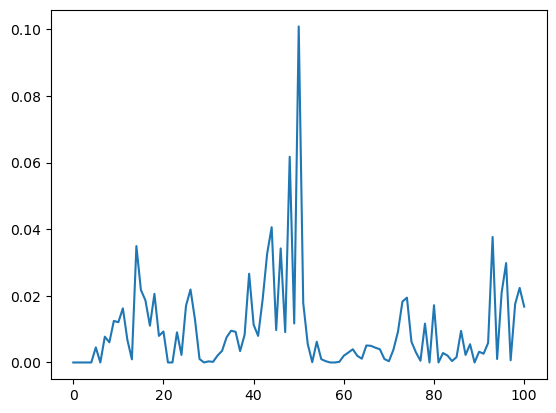

In [13]:
plt.plot(strengths_diapozons[0, 2, 86])

##### Диапозоны для столов

Задаём каждому столу свой код

In [14]:
codes_for_board_cards_flop = np.zeros((13, 13, 13, 4))
codes_for_board_cards_turn = np.zeros((13, 13, 13, 13, 5))
codes_for_board_cards_river = np.zeros((13, 13, 13, 13, 13, 6))

codes_flop = 0
codes_turn = 0
codes_river = 0

i = 0
for board_card1 in range(13):
    for board_card2 in range(board_card1, 13):
        for board_card3 in range(board_card2, 13):
            for board_card4 in range(board_card3, 13):
                for board_card5 in range(board_card4, 13):
                    for simular_suites in range(6):
                        codes_for_board_cards_river[board_card1, board_card2, board_card3, board_card4, board_card5, simular_suites] = i
                        i += 1
codes_river = i
print("River codes count", codes_river)

i = 0
for board_card1 in range(13):
    for board_card2 in range(board_card1, 13):
        for board_card3 in range(board_card2, 13):
            for board_card4 in range(board_card3, 13):
                for simular_suites in range(5):
                    codes_for_board_cards_turn[board_card1, board_card2, board_card3, board_card4, simular_suites] = i
                    i += 1
codes_turn = i
print("Turn codes count", codes_turn)

i = 0
for board_card1 in range(13):
    for board_card2 in range(board_card1, 13):
        for board_card3 in range(board_card2, 13):
            for simular_suites in range(4):
                codes_for_board_cards_flop[board_card1, board_card2, board_card3, simular_suites] = i
                i += 1
codes_flop = i
print("Flop codes count", codes_flop)

def get_code_of_board_flop(card1, card2, card3, simular_suites):
    return int(codes_for_board_cards_flop[card1, card2, card3, simular_suites])

def get_code_of_board_turn(card1, card2, card3, card4, simular_suites):
    return int(codes_for_board_cards_turn[card1, card2, card3, card4, simular_suites])

def get_code_of_board_river(card1, card2, card3, card4, card5, simular_suites):
    return int(codes_for_board_cards_river[card1, card2, card3, card4, card5, simular_suites])

River codes count 37128
Turn codes count 9100
Flop codes count 1820


Считываем диапозоны из файла

In [15]:
diapozons_for_boards_flop = np.zeros((codes_flop, 101))  # (карта1, карта2, карта3, количество одинаковых первых мастей, сила руки); матрица содержит значения вероятности того, что случайная рука при данном флопе будет иметь данную силу руки
diapozons_for_boards_turn = np.zeros((codes_turn, 101))
diapozons_for_boards_river = np.zeros((codes_river, 101))

i = -1
suites_flop = 0
suites_turn = 0
suites_river = 0
with open('hand_strength(результаты_раздач_для_различных_столов).txt', 'r') as r:
    while (True):
        line = r.readline()
        if line == None or line == '\n' or line == '':
            break
        
        strength = 0
        if line[0] == 'B':
            print(line)
            suites_flop = np.zeros(5)
            suites_turn = np.zeros(5)
            suites_river = np.zeros(5)
            
            board = line.split()[1:]
            for j in range(1, 10, 2):
                suites_river[int(board[j])] += 1
                if j <= 7:
                    suites_turn[int(board[j])] += 1
                if j <= 5:
                    suites_flop[int(board[j])] += 1
        else:
            i += 1
            strength = int(line)
            if i == 0:
                #print(get_code_of_board_flop(int(board[0]) - 1, int(board[2]) - 1, int(board[4]) - 1, int(suites_flop[suites_flop.argmax()])))
                diapozons_for_boards_flop[get_code_of_board_flop(int(board[0]) - 1, int(board[2]) - 1, int(board[4]) - 1, int(suites_flop[suites_flop.argmax()])), strength] += 1
            if i == 1:
                diapozons_for_boards_turn[get_code_of_board_turn(int(board[0]) - 1, int(board[2]) - 1, int(board[4]) - 1, int(board[6]) - 1, int(suites_turn[suites_turn.argmax()])), strength] += 1
            if i == 2:
                diapozons_for_boards_river[get_code_of_board_river(int(board[0]) - 1, int(board[2]) - 1, int(board[4]) - 1, int(board[6]) - 1, int(board[8]) - 1, int(suites_river[suites_river.argmax()])), strength] += 1
            if i == 2:
                i = -1
                
turn_done = False
flop_done = False
for board_card1 in range(0, 13):
    for board_card2 in range(board_card1, 13):
        for board_card3 in range(board_card2, 13):
            flop_done = False
            for board_card4 in range(board_card3, 13):
                turn_done = False
                for board_card5 in range(board_card4, 13):
                    for simular_suites in range(0, 6):
                        code_river = get_code_of_board_river(board_card1, board_card2, board_card3, board_card4, board_card5, simular_suites)
                        if simular_suites >= 4:
                            code_turn = get_code_of_board_turn(board_card1, board_card2, board_card3, board_card4, 4)
                        else:
                            code_turn = get_code_of_board_turn(board_card1, board_card2, board_card3, board_card4, simular_suites)
                        if simular_suites >= 3:
                            code_flop = get_code_of_board_flop(board_card1, board_card2, board_card3, 3)
                        else:
                            code_flop = get_code_of_board_flop(board_card1, board_card2, board_card3, simular_suites)
                            
                        if diapozons_for_boards_river[code_river].max() != 0:
                            diapozons_for_boards_river[code_river] /= diapozons_for_boards_river[code_river].max()
                        if not turn_done:
                            if diapozons_for_boards_turn[code_turn].max() != 0:
                                diapozons_for_boards_turn[code_turn] /= diapozons_for_boards_turn[code_turn].max()
                            turn_done = True
                        if not flop_done:
                            if diapozons_for_boards_flop[code_flop].max() != 0:
                                diapozons_for_boards_flop[code_flop] /= diapozons_for_boards_flop[code_flop].max()
                            flop_done = True
                            

Board 1 1 1 2 2 2 3 2 4 2

Board 1 1 1 2 2 2 3 2 5 2

Board 1 1 1 2 2 2 3 2 6 2

Board 1 1 1 2 2 2 3 2 7 2

Board 1 1 1 2 2 2 3 2 8 2

Board 1 1 1 2 2 2 3 2 9 2

Board 1 1 1 2 2 2 3 2 10 2

Board 1 1 1 2 2 2 3 2 11 2

Board 1 1 1 2 2 2 3 2 12 2

Board 1 1 1 2 2 2 3 2 13 2

Board 1 1 1 2 2 2 4 2 5 2

Board 1 1 1 2 2 2 4 2 6 2

Board 1 1 1 2 2 2 4 2 7 2

Board 1 1 1 2 2 2 4 2 8 2

Board 1 1 1 2 2 2 4 2 9 2

Board 1 1 1 2 2 2 4 2 10 2

Board 1 1 1 2 2 2 4 2 11 2

Board 1 1 1 2 2 2 4 2 12 2

Board 1 1 1 2 2 2 4 2 13 2

Board 1 1 1 2 2 2 5 2 6 2

Board 1 1 1 2 2 2 5 2 7 2

Board 1 1 1 2 2 2 5 2 8 2

Board 1 1 1 2 2 2 5 2 9 2

Board 1 1 1 2 2 2 5 2 10 2

Board 1 1 1 2 2 2 5 2 11 2

Board 1 1 1 2 2 2 5 2 12 2

Board 1 1 1 2 2 2 5 2 13 2

Board 1 1 1 2 2 2 6 2 7 2

Board 1 1 1 2 2 2 6 2 8 2

Board 1 1 1 2 2 2 6 2 9 2

Board 1 1 1 2 2 2 6 2 10 2

Board 1 1 1 2 2 2 6 2 11 2

Board 1 1 1 2 2 2 6 2 12 2

Board 1 1 1 2 2 2 6 2 13 2

Board 1 1 1 2 2 2 7 2 8 2

Board 1 1 1 2 2 2 7 2 9 2

Board 1 1 1 

Board 1 1 2 1 3 1 4 2 6 2

Board 1 1 2 1 3 1 4 1 6 2

Board 1 1 2 1 3 1 4 1 6 1

Board 1 2 2 2 3 2 4 2 7 2

Board 1 1 2 2 3 2 4 2 7 2

Board 1 1 2 1 3 2 4 2 7 2

Board 1 1 2 1 3 1 4 2 7 2

Board 1 1 2 1 3 1 4 1 7 2

Board 1 1 2 1 3 1 4 1 7 1

Board 1 2 2 2 3 2 4 2 8 2

Board 1 1 2 2 3 2 4 2 8 2

Board 1 1 2 1 3 2 4 2 8 2

Board 1 1 2 1 3 1 4 2 8 2

Board 1 1 2 1 3 1 4 1 8 2

Board 1 1 2 1 3 1 4 1 8 1

Board 1 2 2 2 3 2 4 2 9 2

Board 1 1 2 2 3 2 4 2 9 2

Board 1 1 2 1 3 2 4 2 9 2

Board 1 1 2 1 3 1 4 2 9 2

Board 1 1 2 1 3 1 4 1 9 2

Board 1 1 2 1 3 1 4 1 9 1

Board 1 2 2 2 3 2 4 2 10 2

Board 1 1 2 2 3 2 4 2 10 2

Board 1 1 2 1 3 2 4 2 10 2

Board 1 1 2 1 3 1 4 2 10 2

Board 1 1 2 1 3 1 4 1 10 2

Board 1 1 2 1 3 1 4 1 10 1

Board 1 2 2 2 3 2 4 2 11 2

Board 1 1 2 2 3 2 4 2 11 2

Board 1 1 2 1 3 2 4 2 11 2

Board 1 1 2 1 3 1 4 2 11 2

Board 1 1 2 1 3 1 4 1 11 2

Board 1 1 2 1 3 1 4 1 11 1

Board 1 2 2 2 3 2 4 2 12 2

Board 1 1 2 2 3 2 4 2 12 2

Board 1 1 2 1 3 2 4 2 12 2

Board 1 1 2 1

Board 1 1 2 1 4 1 5 2 9 2

Board 1 1 2 1 4 1 5 1 9 2

Board 1 1 2 1 4 1 5 1 9 1

Board 1 2 2 2 4 2 5 2 10 2

Board 1 1 2 2 4 2 5 2 10 2

Board 1 1 2 1 4 2 5 2 10 2

Board 1 1 2 1 4 1 5 2 10 2

Board 1 1 2 1 4 1 5 1 10 2

Board 1 1 2 1 4 1 5 1 10 1

Board 1 2 2 2 4 2 5 2 11 2

Board 1 1 2 2 4 2 5 2 11 2

Board 1 1 2 1 4 2 5 2 11 2

Board 1 1 2 1 4 1 5 2 11 2

Board 1 1 2 1 4 1 5 1 11 2

Board 1 1 2 1 4 1 5 1 11 1

Board 1 2 2 2 4 2 5 2 12 2

Board 1 1 2 2 4 2 5 2 12 2

Board 1 1 2 1 4 2 5 2 12 2

Board 1 1 2 1 4 1 5 2 12 2

Board 1 1 2 1 4 1 5 1 12 2

Board 1 1 2 1 4 1 5 1 12 1

Board 1 2 2 2 4 2 5 2 13 2

Board 1 1 2 2 4 2 5 2 13 2

Board 1 1 2 1 4 2 5 2 13 2

Board 1 1 2 1 4 1 5 2 13 2

Board 1 1 2 1 4 1 5 1 13 2

Board 1 1 2 1 4 1 5 1 13 1

Board 1 1 2 1 4 1 6 1 6 2

Board 1 2 2 2 4 2 6 2 7 2

Board 1 1 2 2 4 2 6 2 7 2

Board 1 1 2 1 4 2 6 2 7 2

Board 1 1 2 1 4 1 6 2 7 2

Board 1 1 2 1 4 1 6 1 7 2

Board 1 1 2 1 4 1 6 1 7 1

Board 1 2 2 2 4 2 6 2 8 2

Board 1 1 2 2 4 2 6 2 8 2

Boar

Board 1 1 2 1 5 2 8 2 11 2

Board 1 1 2 1 5 1 8 2 11 2

Board 1 1 2 1 5 1 8 1 11 2

Board 1 1 2 1 5 1 8 1 11 1

Board 1 2 2 2 5 2 8 2 12 2

Board 1 1 2 2 5 2 8 2 12 2

Board 1 1 2 1 5 2 8 2 12 2

Board 1 1 2 1 5 1 8 2 12 2

Board 1 1 2 1 5 1 8 1 12 2

Board 1 1 2 1 5 1 8 1 12 1

Board 1 2 2 2 5 2 8 2 13 2

Board 1 1 2 2 5 2 8 2 13 2

Board 1 1 2 1 5 2 8 2 13 2

Board 1 1 2 1 5 1 8 2 13 2

Board 1 1 2 1 5 1 8 1 13 2

Board 1 1 2 1 5 1 8 1 13 1

Board 1 1 2 1 5 1 9 1 9 2

Board 1 2 2 2 5 2 9 2 10 2

Board 1 1 2 2 5 2 9 2 10 2

Board 1 1 2 1 5 2 9 2 10 2

Board 1 1 2 1 5 1 9 2 10 2

Board 1 1 2 1 5 1 9 1 10 2

Board 1 1 2 1 5 1 9 1 10 1

Board 1 2 2 2 5 2 9 2 11 2

Board 1 1 2 2 5 2 9 2 11 2

Board 1 1 2 1 5 2 9 2 11 2

Board 1 1 2 1 5 1 9 2 11 2

Board 1 1 2 1 5 1 9 1 11 2

Board 1 1 2 1 5 1 9 1 11 1

Board 1 2 2 2 5 2 9 2 12 2

Board 1 1 2 2 5 2 9 2 12 2

Board 1 1 2 1 5 2 9 2 12 2

Board 1 1 2 1 5 1 9 2 12 2

Board 1 1 2 1 5 1 9 1 12 2

Board 1 1 2 1 5 1 9 1 12 1

Board 1 2 2 2 5 2 9 2

Board 1 1 2 1 7 1 10 1 13 1

Board 1 1 2 1 7 1 11 1 11 2

Board 1 2 2 2 7 2 11 2 12 2

Board 1 1 2 2 7 2 11 2 12 2

Board 1 1 2 1 7 2 11 2 12 2

Board 1 1 2 1 7 1 11 2 12 2

Board 1 1 2 1 7 1 11 1 12 2

Board 1 1 2 1 7 1 11 1 12 1

Board 1 2 2 2 7 2 11 2 13 2

Board 1 1 2 2 7 2 11 2 13 2

Board 1 1 2 1 7 2 11 2 13 2

Board 1 1 2 1 7 1 11 2 13 2

Board 1 1 2 1 7 1 11 1 13 2

Board 1 1 2 1 7 1 11 1 13 1

Board 1 1 2 1 7 1 12 1 12 2

Board 1 2 2 2 7 2 12 2 13 2

Board 1 1 2 2 7 2 12 2 13 2

Board 1 1 2 1 7 2 12 2 13 2

Board 1 1 2 1 7 1 12 2 13 2

Board 1 1 2 1 7 1 12 1 13 2

Board 1 1 2 1 7 1 12 1 13 1

Board 1 1 2 1 7 1 13 1 13 2

Board 1 1 2 1 8 1 8 2 9 2

Board 1 1 2 1 8 1 8 2 10 2

Board 1 1 2 1 8 1 8 2 11 2

Board 1 1 2 1 8 1 8 2 12 2

Board 1 1 2 1 8 1 8 2 13 2

Board 1 1 2 1 8 1 9 1 9 2

Board 1 2 2 2 8 2 9 2 10 2

Board 1 1 2 2 8 2 9 2 10 2

Board 1 1 2 1 8 2 9 2 10 2

Board 1 1 2 1 8 1 9 2 10 2

Board 1 1 2 1 8 1 9 1 10 2

Board 1 1 2 1 8 1 9 1 10 1

Board 1 2 2 2 8 2 9 2 11 2



Board 1 1 3 2 4 2 6 2 11 2

Board 1 1 3 1 4 2 6 2 11 2

Board 1 1 3 1 4 1 6 2 11 2

Board 1 1 3 1 4 1 6 1 11 2

Board 1 1 3 1 4 1 6 1 11 1

Board 1 2 3 2 4 2 6 2 12 2

Board 1 1 3 2 4 2 6 2 12 2

Board 1 1 3 1 4 2 6 2 12 2

Board 1 1 3 1 4 1 6 2 12 2

Board 1 1 3 1 4 1 6 1 12 2

Board 1 1 3 1 4 1 6 1 12 1

Board 1 2 3 2 4 2 6 2 13 2

Board 1 1 3 2 4 2 6 2 13 2

Board 1 1 3 1 4 2 6 2 13 2

Board 1 1 3 1 4 1 6 2 13 2

Board 1 1 3 1 4 1 6 1 13 2

Board 1 1 3 1 4 1 6 1 13 1

Board 1 1 3 1 4 1 7 1 7 2

Board 1 2 3 2 4 2 7 2 8 2

Board 1 1 3 2 4 2 7 2 8 2

Board 1 1 3 1 4 2 7 2 8 2

Board 1 1 3 1 4 1 7 2 8 2

Board 1 1 3 1 4 1 7 1 8 2

Board 1 1 3 1 4 1 7 1 8 1

Board 1 2 3 2 4 2 7 2 9 2

Board 1 1 3 2 4 2 7 2 9 2

Board 1 1 3 1 4 2 7 2 9 2

Board 1 1 3 1 4 1 7 2 9 2

Board 1 1 3 1 4 1 7 1 9 2

Board 1 1 3 1 4 1 7 1 9 1

Board 1 2 3 2 4 2 7 2 10 2

Board 1 1 3 2 4 2 7 2 10 2

Board 1 1 3 1 4 2 7 2 10 2

Board 1 1 3 1 4 1 7 2 10 2

Board 1 1 3 1 4 1 7 1 10 2

Board 1 1 3 1 4 1 7 1 10 1

Board

Board 1 1 3 1 5 1 10 2 11 2

Board 1 1 3 1 5 1 10 1 11 2

Board 1 1 3 1 5 1 10 1 11 1

Board 1 2 3 2 5 2 10 2 12 2

Board 1 1 3 2 5 2 10 2 12 2

Board 1 1 3 1 5 2 10 2 12 2

Board 1 1 3 1 5 1 10 2 12 2

Board 1 1 3 1 5 1 10 1 12 2

Board 1 1 3 1 5 1 10 1 12 1

Board 1 2 3 2 5 2 10 2 13 2

Board 1 1 3 2 5 2 10 2 13 2

Board 1 1 3 1 5 2 10 2 13 2

Board 1 1 3 1 5 1 10 2 13 2

Board 1 1 3 1 5 1 10 1 13 2

Board 1 1 3 1 5 1 10 1 13 1

Board 1 1 3 1 5 1 11 1 11 2

Board 1 2 3 2 5 2 11 2 12 2

Board 1 1 3 2 5 2 11 2 12 2

Board 1 1 3 1 5 2 11 2 12 2

Board 1 1 3 1 5 1 11 2 12 2

Board 1 1 3 1 5 1 11 1 12 2

Board 1 1 3 1 5 1 11 1 12 1

Board 1 2 3 2 5 2 11 2 13 2

Board 1 1 3 2 5 2 11 2 13 2

Board 1 1 3 1 5 2 11 2 13 2

Board 1 1 3 1 5 1 11 2 13 2

Board 1 1 3 1 5 1 11 1 13 2

Board 1 1 3 1 5 1 11 1 13 1

Board 1 1 3 1 5 1 12 1 12 2

Board 1 2 3 2 5 2 12 2 13 2

Board 1 1 3 2 5 2 12 2 13 2

Board 1 1 3 1 5 2 12 2 13 2

Board 1 1 3 1 5 1 12 2 13 2

Board 1 1 3 1 5 1 12 1 13 2

Board 1 1 3 1 

Board 1 1 3 2 8 2 9 2 11 2

Board 1 1 3 1 8 2 9 2 11 2

Board 1 1 3 1 8 1 9 2 11 2

Board 1 1 3 1 8 1 9 1 11 2

Board 1 1 3 1 8 1 9 1 11 1

Board 1 2 3 2 8 2 9 2 12 2

Board 1 1 3 2 8 2 9 2 12 2

Board 1 1 3 1 8 2 9 2 12 2

Board 1 1 3 1 8 1 9 2 12 2

Board 1 1 3 1 8 1 9 1 12 2

Board 1 1 3 1 8 1 9 1 12 1

Board 1 2 3 2 8 2 9 2 13 2

Board 1 1 3 2 8 2 9 2 13 2

Board 1 1 3 1 8 2 9 2 13 2

Board 1 1 3 1 8 1 9 2 13 2

Board 1 1 3 1 8 1 9 1 13 2

Board 1 1 3 1 8 1 9 1 13 1

Board 1 1 3 1 8 1 10 1 10 2

Board 1 2 3 2 8 2 10 2 11 2

Board 1 1 3 2 8 2 10 2 11 2

Board 1 1 3 1 8 2 10 2 11 2

Board 1 1 3 1 8 1 10 2 11 2

Board 1 1 3 1 8 1 10 1 11 2

Board 1 1 3 1 8 1 10 1 11 1

Board 1 2 3 2 8 2 10 2 12 2

Board 1 1 3 2 8 2 10 2 12 2

Board 1 1 3 1 8 2 10 2 12 2

Board 1 1 3 1 8 1 10 2 12 2

Board 1 1 3 1 8 1 10 1 12 2

Board 1 1 3 1 8 1 10 1 12 1

Board 1 2 3 2 8 2 10 2 13 2

Board 1 1 3 2 8 2 10 2 13 2

Board 1 1 3 1 8 2 10 2 13 2

Board 1 1 3 1 8 1 10 2 13 2

Board 1 1 3 1 8 1 10 1 13 2

Bo

Board 1 1 4 1 5 1 9 1 10 1

Board 1 2 4 2 5 2 9 2 11 2

Board 1 1 4 2 5 2 9 2 11 2

Board 1 1 4 1 5 2 9 2 11 2

Board 1 1 4 1 5 1 9 2 11 2

Board 1 1 4 1 5 1 9 1 11 2

Board 1 1 4 1 5 1 9 1 11 1

Board 1 2 4 2 5 2 9 2 12 2

Board 1 1 4 2 5 2 9 2 12 2

Board 1 1 4 1 5 2 9 2 12 2

Board 1 1 4 1 5 1 9 2 12 2

Board 1 1 4 1 5 1 9 1 12 2

Board 1 1 4 1 5 1 9 1 12 1

Board 1 2 4 2 5 2 9 2 13 2

Board 1 1 4 2 5 2 9 2 13 2

Board 1 1 4 1 5 2 9 2 13 2

Board 1 1 4 1 5 1 9 2 13 2

Board 1 1 4 1 5 1 9 1 13 2

Board 1 1 4 1 5 1 9 1 13 1

Board 1 1 4 1 5 1 10 1 10 2

Board 1 2 4 2 5 2 10 2 11 2

Board 1 1 4 2 5 2 10 2 11 2

Board 1 1 4 1 5 2 10 2 11 2

Board 1 1 4 1 5 1 10 2 11 2

Board 1 1 4 1 5 1 10 1 11 2

Board 1 1 4 1 5 1 10 1 11 1

Board 1 2 4 2 5 2 10 2 12 2

Board 1 1 4 2 5 2 10 2 12 2

Board 1 1 4 1 5 2 10 2 12 2

Board 1 1 4 1 5 1 10 2 12 2

Board 1 1 4 1 5 1 10 1 12 2

Board 1 1 4 1 5 1 10 1 12 1

Board 1 2 4 2 5 2 10 2 13 2

Board 1 1 4 2 5 2 10 2 13 2

Board 1 1 4 1 5 2 10 2 13 2

Boar

Board 1 1 4 1 7 1 13 1 13 2

Board 1 1 4 1 8 1 8 2 9 2

Board 1 1 4 1 8 1 8 2 10 2

Board 1 1 4 1 8 1 8 2 11 2

Board 1 1 4 1 8 1 8 2 12 2

Board 1 1 4 1 8 1 8 2 13 2

Board 1 1 4 1 8 1 9 1 9 2

Board 1 2 4 2 8 2 9 2 10 2

Board 1 1 4 2 8 2 9 2 10 2

Board 1 1 4 1 8 2 9 2 10 2

Board 1 1 4 1 8 1 9 2 10 2

Board 1 1 4 1 8 1 9 1 10 2

Board 1 1 4 1 8 1 9 1 10 1

Board 1 2 4 2 8 2 9 2 11 2

Board 1 1 4 2 8 2 9 2 11 2

Board 1 1 4 1 8 2 9 2 11 2

Board 1 1 4 1 8 1 9 2 11 2

Board 1 1 4 1 8 1 9 1 11 2

Board 1 1 4 1 8 1 9 1 11 1

Board 1 2 4 2 8 2 9 2 12 2

Board 1 1 4 2 8 2 9 2 12 2

Board 1 1 4 1 8 2 9 2 12 2

Board 1 1 4 1 8 1 9 2 12 2

Board 1 1 4 1 8 1 9 1 12 2

Board 1 1 4 1 8 1 9 1 12 1

Board 1 2 4 2 8 2 9 2 13 2

Board 1 1 4 2 8 2 9 2 13 2

Board 1 1 4 1 8 2 9 2 13 2

Board 1 1 4 1 8 1 9 2 13 2

Board 1 1 4 1 8 1 9 1 13 2

Board 1 1 4 1 8 1 9 1 13 1

Board 1 1 4 1 8 1 10 1 10 2

Board 1 2 4 2 8 2 10 2 11 2

Board 1 1 4 2 8 2 10 2 11 2

Board 1 1 4 1 8 2 10 2 11 2

Board 1 1 4 1 8 1

Board 1 1 5 1 6 1 10 1 12 1

Board 1 2 5 2 6 2 10 2 13 2

Board 1 1 5 2 6 2 10 2 13 2

Board 1 1 5 1 6 2 10 2 13 2

Board 1 1 5 1 6 1 10 2 13 2

Board 1 1 5 1 6 1 10 1 13 2

Board 1 1 5 1 6 1 10 1 13 1

Board 1 1 5 1 6 1 11 1 11 2

Board 1 2 5 2 6 2 11 2 12 2

Board 1 1 5 2 6 2 11 2 12 2

Board 1 1 5 1 6 2 11 2 12 2

Board 1 1 5 1 6 1 11 2 12 2

Board 1 1 5 1 6 1 11 1 12 2

Board 1 1 5 1 6 1 11 1 12 1

Board 1 2 5 2 6 2 11 2 13 2

Board 1 1 5 2 6 2 11 2 13 2

Board 1 1 5 1 6 2 11 2 13 2

Board 1 1 5 1 6 1 11 2 13 2

Board 1 1 5 1 6 1 11 1 13 2

Board 1 1 5 1 6 1 11 1 13 1

Board 1 1 5 1 6 1 12 1 12 2

Board 1 2 5 2 6 2 12 2 13 2

Board 1 1 5 2 6 2 12 2 13 2

Board 1 1 5 1 6 2 12 2 13 2

Board 1 1 5 1 6 1 12 2 13 2

Board 1 1 5 1 6 1 12 1 13 2

Board 1 1 5 1 6 1 12 1 13 1

Board 1 1 5 1 6 1 13 1 13 2

Board 1 1 5 1 7 1 7 2 8 2

Board 1 1 5 1 7 1 7 2 9 2

Board 1 1 5 1 7 1 7 2 10 2

Board 1 1 5 1 7 1 7 2 11 2

Board 1 1 5 1 7 1 7 2 12 2

Board 1 1 5 1 7 1 7 2 13 2

Board 1 1 5 1 7 1 8 1 

Board 1 1 6 1 6 2 9 2 13 2

Board 1 1 6 1 6 2 10 2 11 2

Board 1 1 6 1 6 2 10 2 12 2

Board 1 1 6 1 6 2 10 2 13 2

Board 1 1 6 1 6 2 11 2 12 2

Board 1 1 6 1 6 2 11 2 13 2

Board 1 1 6 1 6 2 12 2 13 2

Board 1 1 6 1 7 1 7 2 8 2

Board 1 1 6 1 7 1 7 2 9 2

Board 1 1 6 1 7 1 7 2 10 2

Board 1 1 6 1 7 1 7 2 11 2

Board 1 1 6 1 7 1 7 2 12 2

Board 1 1 6 1 7 1 7 2 13 2

Board 1 1 6 1 7 1 8 1 8 2

Board 1 2 6 2 7 2 8 2 9 2

Board 1 1 6 2 7 2 8 2 9 2

Board 1 1 6 1 7 2 8 2 9 2

Board 1 1 6 1 7 1 8 2 9 2

Board 1 1 6 1 7 1 8 1 9 2

Board 1 1 6 1 7 1 8 1 9 1

Board 1 2 6 2 7 2 8 2 10 2

Board 1 1 6 2 7 2 8 2 10 2

Board 1 1 6 1 7 2 8 2 10 2

Board 1 1 6 1 7 1 8 2 10 2

Board 1 1 6 1 7 1 8 1 10 2

Board 1 1 6 1 7 1 8 1 10 1

Board 1 2 6 2 7 2 8 2 11 2

Board 1 1 6 2 7 2 8 2 11 2

Board 1 1 6 1 7 2 8 2 11 2

Board 1 1 6 1 7 1 8 2 11 2

Board 1 1 6 1 7 1 8 1 11 2

Board 1 1 6 1 7 1 8 1 11 1

Board 1 2 6 2 7 2 8 2 12 2

Board 1 1 6 2 7 2 8 2 12 2

Board 1 1 6 1 7 2 8 2 12 2

Board 1 1 6 1 7 1 8 2 1

Board 1 1 7 1 8 1 9 2 12 2

Board 1 1 7 1 8 1 9 1 12 2

Board 1 1 7 1 8 1 9 1 12 1

Board 1 2 7 2 8 2 9 2 13 2

Board 1 1 7 2 8 2 9 2 13 2

Board 1 1 7 1 8 2 9 2 13 2

Board 1 1 7 1 8 1 9 2 13 2

Board 1 1 7 1 8 1 9 1 13 2

Board 1 1 7 1 8 1 9 1 13 1

Board 1 1 7 1 8 1 10 1 10 2

Board 1 2 7 2 8 2 10 2 11 2

Board 1 1 7 2 8 2 10 2 11 2

Board 1 1 7 1 8 2 10 2 11 2

Board 1 1 7 1 8 1 10 2 11 2

Board 1 1 7 1 8 1 10 1 11 2

Board 1 1 7 1 8 1 10 1 11 1

Board 1 2 7 2 8 2 10 2 12 2

Board 1 1 7 2 8 2 10 2 12 2

Board 1 1 7 1 8 2 10 2 12 2

Board 1 1 7 1 8 1 10 2 12 2

Board 1 1 7 1 8 1 10 1 12 2

Board 1 1 7 1 8 1 10 1 12 1

Board 1 2 7 2 8 2 10 2 13 2

Board 1 1 7 2 8 2 10 2 13 2

Board 1 1 7 1 8 2 10 2 13 2

Board 1 1 7 1 8 1 10 2 13 2

Board 1 1 7 1 8 1 10 1 13 2

Board 1 1 7 1 8 1 10 1 13 1

Board 1 1 7 1 8 1 11 1 11 2

Board 1 2 7 2 8 2 11 2 12 2

Board 1 1 7 2 8 2 11 2 12 2

Board 1 1 7 1 8 2 11 2 12 2

Board 1 1 7 1 8 1 11 2 12 2

Board 1 1 7 1 8 1 11 1 12 2

Board 1 1 7 1 8 1 11 1 

Board 2 1 2 2 3 2 4 2 5 2

Board 2 1 2 2 3 2 4 2 6 2

Board 2 1 2 2 3 2 4 2 7 2

Board 2 1 2 2 3 2 4 2 8 2

Board 2 1 2 2 3 2 4 2 9 2

Board 2 1 2 2 3 2 4 2 10 2

Board 2 1 2 2 3 2 4 2 11 2

Board 2 1 2 2 3 2 4 2 12 2

Board 2 1 2 2 3 2 4 2 13 2

Board 2 1 2 2 3 2 5 2 6 2

Board 2 1 2 2 3 2 5 2 7 2

Board 2 1 2 2 3 2 5 2 8 2

Board 2 1 2 2 3 2 5 2 9 2

Board 2 1 2 2 3 2 5 2 10 2

Board 2 1 2 2 3 2 5 2 11 2

Board 2 1 2 2 3 2 5 2 12 2

Board 2 1 2 2 3 2 5 2 13 2

Board 2 1 2 2 3 2 6 2 7 2

Board 2 1 2 2 3 2 6 2 8 2

Board 2 1 2 2 3 2 6 2 9 2

Board 2 1 2 2 3 2 6 2 10 2

Board 2 1 2 2 3 2 6 2 11 2

Board 2 1 2 2 3 2 6 2 12 2

Board 2 1 2 2 3 2 6 2 13 2

Board 2 1 2 2 3 2 7 2 8 2

Board 2 1 2 2 3 2 7 2 9 2

Board 2 1 2 2 3 2 7 2 10 2

Board 2 1 2 2 3 2 7 2 11 2

Board 2 1 2 2 3 2 7 2 12 2

Board 2 1 2 2 3 2 7 2 13 2

Board 2 1 2 2 3 2 8 2 9 2

Board 2 1 2 2 3 2 8 2 10 2

Board 2 1 2 2 3 2 8 2 11 2

Board 2 1 2 2 3 2 8 2 12 2

Board 2 1 2 2 3 2 8 2 13 2

Board 2 1 2 2 3 2 9 2 10 2

Board 2

Board 2 1 3 1 4 1 6 1 11 2

Board 2 1 3 1 4 1 6 1 11 1

Board 2 2 3 2 4 2 6 2 12 2

Board 2 1 3 2 4 2 6 2 12 2

Board 2 1 3 1 4 2 6 2 12 2

Board 2 1 3 1 4 1 6 2 12 2

Board 2 1 3 1 4 1 6 1 12 2

Board 2 1 3 1 4 1 6 1 12 1

Board 2 2 3 2 4 2 6 2 13 2

Board 2 1 3 2 4 2 6 2 13 2

Board 2 1 3 1 4 2 6 2 13 2

Board 2 1 3 1 4 1 6 2 13 2

Board 2 1 3 1 4 1 6 1 13 2

Board 2 1 3 1 4 1 6 1 13 1

Board 2 1 3 1 4 1 7 1 7 2

Board 2 2 3 2 4 2 7 2 8 2

Board 2 1 3 2 4 2 7 2 8 2

Board 2 1 3 1 4 2 7 2 8 2

Board 2 1 3 1 4 1 7 2 8 2

Board 2 1 3 1 4 1 7 1 8 2

Board 2 1 3 1 4 1 7 1 8 1

Board 2 2 3 2 4 2 7 2 9 2

Board 2 1 3 2 4 2 7 2 9 2

Board 2 1 3 1 4 2 7 2 9 2

Board 2 1 3 1 4 1 7 2 9 2

Board 2 1 3 1 4 1 7 1 9 2

Board 2 1 3 1 4 1 7 1 9 1

Board 2 2 3 2 4 2 7 2 10 2

Board 2 1 3 2 4 2 7 2 10 2

Board 2 1 3 1 4 2 7 2 10 2

Board 2 1 3 1 4 1 7 2 10 2

Board 2 1 3 1 4 1 7 1 10 2

Board 2 1 3 1 4 1 7 1 10 1

Board 2 2 3 2 4 2 7 2 11 2

Board 2 1 3 2 4 2 7 2 11 2

Board 2 1 3 1 4 2 7 2 11 2

Board

Board 2 1 3 1 5 2 10 2 11 2

Board 2 1 3 1 5 1 10 2 11 2

Board 2 1 3 1 5 1 10 1 11 2

Board 2 1 3 1 5 1 10 1 11 1

Board 2 2 3 2 5 2 10 2 12 2

Board 2 1 3 2 5 2 10 2 12 2

Board 2 1 3 1 5 2 10 2 12 2

Board 2 1 3 1 5 1 10 2 12 2

Board 2 1 3 1 5 1 10 1 12 2

Board 2 1 3 1 5 1 10 1 12 1

Board 2 2 3 2 5 2 10 2 13 2

Board 2 1 3 2 5 2 10 2 13 2

Board 2 1 3 1 5 2 10 2 13 2

Board 2 1 3 1 5 1 10 2 13 2

Board 2 1 3 1 5 1 10 1 13 2

Board 2 1 3 1 5 1 10 1 13 1

Board 2 1 3 1 5 1 11 1 11 2

Board 2 2 3 2 5 2 11 2 12 2

Board 2 1 3 2 5 2 11 2 12 2

Board 2 1 3 1 5 2 11 2 12 2

Board 2 1 3 1 5 1 11 2 12 2

Board 2 1 3 1 5 1 11 1 12 2

Board 2 1 3 1 5 1 11 1 12 1

Board 2 2 3 2 5 2 11 2 13 2

Board 2 1 3 2 5 2 11 2 13 2

Board 2 1 3 1 5 2 11 2 13 2

Board 2 1 3 1 5 1 11 2 13 2

Board 2 1 3 1 5 1 11 1 13 2

Board 2 1 3 1 5 1 11 1 13 1

Board 2 1 3 1 5 1 12 1 12 2

Board 2 2 3 2 5 2 12 2 13 2

Board 2 1 3 2 5 2 12 2 13 2

Board 2 1 3 1 5 2 12 2 13 2

Board 2 1 3 1 5 1 12 2 13 2

Board 2 1 3 1 

Board 2 1 3 1 8 1 9 2 11 2

Board 2 1 3 1 8 1 9 1 11 2

Board 2 1 3 1 8 1 9 1 11 1

Board 2 2 3 2 8 2 9 2 12 2

Board 2 1 3 2 8 2 9 2 12 2

Board 2 1 3 1 8 2 9 2 12 2

Board 2 1 3 1 8 1 9 2 12 2

Board 2 1 3 1 8 1 9 1 12 2

Board 2 1 3 1 8 1 9 1 12 1

Board 2 2 3 2 8 2 9 2 13 2

Board 2 1 3 2 8 2 9 2 13 2

Board 2 1 3 1 8 2 9 2 13 2

Board 2 1 3 1 8 1 9 2 13 2

Board 2 1 3 1 8 1 9 1 13 2

Board 2 1 3 1 8 1 9 1 13 1

Board 2 1 3 1 8 1 10 1 10 2

Board 2 2 3 2 8 2 10 2 11 2

Board 2 1 3 2 8 2 10 2 11 2

Board 2 1 3 1 8 2 10 2 11 2

Board 2 1 3 1 8 1 10 2 11 2

Board 2 1 3 1 8 1 10 1 11 2

Board 2 1 3 1 8 1 10 1 11 1

Board 2 2 3 2 8 2 10 2 12 2

Board 2 1 3 2 8 2 10 2 12 2

Board 2 1 3 1 8 2 10 2 12 2

Board 2 1 3 1 8 1 10 2 12 2

Board 2 1 3 1 8 1 10 1 12 2

Board 2 1 3 1 8 1 10 1 12 1

Board 2 2 3 2 8 2 10 2 13 2

Board 2 1 3 2 8 2 10 2 13 2

Board 2 1 3 1 8 2 10 2 13 2

Board 2 1 3 1 8 1 10 2 13 2

Board 2 1 3 1 8 1 10 1 13 2

Board 2 1 3 1 8 1 10 1 13 1

Board 2 1 3 1 8 1 11 1 11 2



Board 2 1 4 1 5 1 8 1 13 1

Board 2 1 4 1 5 1 9 1 9 2

Board 2 2 4 2 5 2 9 2 10 2

Board 2 1 4 2 5 2 9 2 10 2

Board 2 1 4 1 5 2 9 2 10 2

Board 2 1 4 1 5 1 9 2 10 2

Board 2 1 4 1 5 1 9 1 10 2

Board 2 1 4 1 5 1 9 1 10 1

Board 2 2 4 2 5 2 9 2 11 2

Board 2 1 4 2 5 2 9 2 11 2

Board 2 1 4 1 5 2 9 2 11 2

Board 2 1 4 1 5 1 9 2 11 2

Board 2 1 4 1 5 1 9 1 11 2

Board 2 1 4 1 5 1 9 1 11 1

Board 2 2 4 2 5 2 9 2 12 2

Board 2 1 4 2 5 2 9 2 12 2

Board 2 1 4 1 5 2 9 2 12 2

Board 2 1 4 1 5 1 9 2 12 2

Board 2 1 4 1 5 1 9 1 12 2

Board 2 1 4 1 5 1 9 1 12 1

Board 2 2 4 2 5 2 9 2 13 2

Board 2 1 4 2 5 2 9 2 13 2

Board 2 1 4 1 5 2 9 2 13 2

Board 2 1 4 1 5 1 9 2 13 2

Board 2 1 4 1 5 1 9 1 13 2

Board 2 1 4 1 5 1 9 1 13 1

Board 2 1 4 1 5 1 10 1 10 2

Board 2 2 4 2 5 2 10 2 11 2

Board 2 1 4 2 5 2 10 2 11 2

Board 2 1 4 1 5 2 10 2 11 2

Board 2 1 4 1 5 1 10 2 11 2

Board 2 1 4 1 5 1 10 1 11 2

Board 2 1 4 1 5 1 10 1 11 1

Board 2 2 4 2 5 2 10 2 12 2

Board 2 1 4 2 5 2 10 2 12 2

Board 2 1 4 

Board 2 1 4 1 7 1 11 2 13 2

Board 2 1 4 1 7 1 11 1 13 2

Board 2 1 4 1 7 1 11 1 13 1

Board 2 1 4 1 7 1 12 1 12 2

Board 2 2 4 2 7 2 12 2 13 2

Board 2 1 4 2 7 2 12 2 13 2

Board 2 1 4 1 7 2 12 2 13 2

Board 2 1 4 1 7 1 12 2 13 2

Board 2 1 4 1 7 1 12 1 13 2

Board 2 1 4 1 7 1 12 1 13 1

Board 2 1 4 1 7 1 13 1 13 2

Board 2 1 4 1 8 1 8 2 9 2

Board 2 1 4 1 8 1 8 2 10 2

Board 2 1 4 1 8 1 8 2 11 2

Board 2 1 4 1 8 1 8 2 12 2

Board 2 1 4 1 8 1 8 2 13 2

Board 2 1 4 1 8 1 9 1 9 2

Board 2 2 4 2 8 2 9 2 10 2

Board 2 1 4 2 8 2 9 2 10 2

Board 2 1 4 1 8 2 9 2 10 2

Board 2 1 4 1 8 1 9 2 10 2

Board 2 1 4 1 8 1 9 1 10 2

Board 2 1 4 1 8 1 9 1 10 1

Board 2 2 4 2 8 2 9 2 11 2

Board 2 1 4 2 8 2 9 2 11 2

Board 2 1 4 1 8 2 9 2 11 2

Board 2 1 4 1 8 1 9 2 11 2

Board 2 1 4 1 8 1 9 1 11 2

Board 2 1 4 1 8 1 9 1 11 1

Board 2 2 4 2 8 2 9 2 12 2

Board 2 1 4 2 8 2 9 2 12 2

Board 2 1 4 1 8 2 9 2 12 2

Board 2 1 4 1 8 1 9 2 12 2

Board 2 1 4 1 8 1 9 1 12 2

Board 2 1 4 1 8 1 9 1 12 1

Board 2 2 4

Board 2 1 5 2 6 2 10 2 12 2

Board 2 1 5 1 6 2 10 2 12 2

Board 2 1 5 1 6 1 10 2 12 2

Board 2 1 5 1 6 1 10 1 12 2

Board 2 1 5 1 6 1 10 1 12 1

Board 2 2 5 2 6 2 10 2 13 2

Board 2 1 5 2 6 2 10 2 13 2

Board 2 1 5 1 6 2 10 2 13 2

Board 2 1 5 1 6 1 10 2 13 2

Board 2 1 5 1 6 1 10 1 13 2

Board 2 1 5 1 6 1 10 1 13 1

Board 2 1 5 1 6 1 11 1 11 2

Board 2 2 5 2 6 2 11 2 12 2

Board 2 1 5 2 6 2 11 2 12 2

Board 2 1 5 1 6 2 11 2 12 2

Board 2 1 5 1 6 1 11 2 12 2

Board 2 1 5 1 6 1 11 1 12 2

Board 2 1 5 1 6 1 11 1 12 1

Board 2 2 5 2 6 2 11 2 13 2

Board 2 1 5 2 6 2 11 2 13 2

Board 2 1 5 1 6 2 11 2 13 2

Board 2 1 5 1 6 1 11 2 13 2

Board 2 1 5 1 6 1 11 1 13 2

Board 2 1 5 1 6 1 11 1 13 1

Board 2 1 5 1 6 1 12 1 12 2

Board 2 2 5 2 6 2 12 2 13 2

Board 2 1 5 2 6 2 12 2 13 2

Board 2 1 5 1 6 2 12 2 13 2

Board 2 1 5 1 6 1 12 2 13 2

Board 2 1 5 1 6 1 12 1 13 2

Board 2 1 5 1 6 1 12 1 13 1

Board 2 1 5 1 6 1 13 1 13 2

Board 2 1 5 1 7 1 7 2 8 2

Board 2 1 5 1 7 1 7 2 9 2

Board 2 1 5 1 7 1 

Board 2 1 6 1 6 2 8 2 10 2

Board 2 1 6 1 6 2 8 2 11 2

Board 2 1 6 1 6 2 8 2 12 2

Board 2 1 6 1 6 2 8 2 13 2

Board 2 1 6 1 6 2 9 2 10 2

Board 2 1 6 1 6 2 9 2 11 2

Board 2 1 6 1 6 2 9 2 12 2

Board 2 1 6 1 6 2 9 2 13 2

Board 2 1 6 1 6 2 10 2 11 2

Board 2 1 6 1 6 2 10 2 12 2

Board 2 1 6 1 6 2 10 2 13 2

Board 2 1 6 1 6 2 11 2 12 2

Board 2 1 6 1 6 2 11 2 13 2

Board 2 1 6 1 6 2 12 2 13 2

Board 2 1 6 1 7 1 7 2 8 2

Board 2 1 6 1 7 1 7 2 9 2

Board 2 1 6 1 7 1 7 2 10 2

Board 2 1 6 1 7 1 7 2 11 2

Board 2 1 6 1 7 1 7 2 12 2

Board 2 1 6 1 7 1 7 2 13 2

Board 2 1 6 1 7 1 8 1 8 2

Board 2 2 6 2 7 2 8 2 9 2

Board 2 1 6 2 7 2 8 2 9 2

Board 2 1 6 1 7 2 8 2 9 2

Board 2 1 6 1 7 1 8 2 9 2

Board 2 1 6 1 7 1 8 1 9 2

Board 2 1 6 1 7 1 8 1 9 1

Board 2 2 6 2 7 2 8 2 10 2

Board 2 1 6 2 7 2 8 2 10 2

Board 2 1 6 1 7 2 8 2 10 2

Board 2 1 6 1 7 1 8 2 10 2

Board 2 1 6 1 7 1 8 1 10 2

Board 2 1 6 1 7 1 8 1 10 1

Board 2 2 6 2 7 2 8 2 11 2

Board 2 1 6 2 7 2 8 2 11 2

Board 2 1 6 1 7 2 8 2 1

Board 2 1 7 1 8 1 9 1 10 1

Board 2 2 7 2 8 2 9 2 11 2

Board 2 1 7 2 8 2 9 2 11 2

Board 2 1 7 1 8 2 9 2 11 2

Board 2 1 7 1 8 1 9 2 11 2

Board 2 1 7 1 8 1 9 1 11 2

Board 2 1 7 1 8 1 9 1 11 1

Board 2 2 7 2 8 2 9 2 12 2

Board 2 1 7 2 8 2 9 2 12 2

Board 2 1 7 1 8 2 9 2 12 2

Board 2 1 7 1 8 1 9 2 12 2

Board 2 1 7 1 8 1 9 1 12 2

Board 2 1 7 1 8 1 9 1 12 1

Board 2 2 7 2 8 2 9 2 13 2

Board 2 1 7 2 8 2 9 2 13 2

Board 2 1 7 1 8 2 9 2 13 2

Board 2 1 7 1 8 1 9 2 13 2

Board 2 1 7 1 8 1 9 1 13 2

Board 2 1 7 1 8 1 9 1 13 1

Board 2 1 7 1 8 1 10 1 10 2

Board 2 2 7 2 8 2 10 2 11 2

Board 2 1 7 2 8 2 10 2 11 2

Board 2 1 7 1 8 2 10 2 11 2

Board 2 1 7 1 8 1 10 2 11 2

Board 2 1 7 1 8 1 10 1 11 2

Board 2 1 7 1 8 1 10 1 11 1

Board 2 2 7 2 8 2 10 2 12 2

Board 2 1 7 2 8 2 10 2 12 2

Board 2 1 7 1 8 2 10 2 12 2

Board 2 1 7 1 8 1 10 2 12 2

Board 2 1 7 1 8 1 10 1 12 2

Board 2 1 7 1 8 1 10 1 12 1

Board 2 2 7 2 8 2 10 2 13 2

Board 2 1 7 2 8 2 10 2 13 2

Board 2 1 7 1 8 2 10 2 13 2

Boar

Board 2 1 10 1 12 1 13 1 13 2

Board 2 1 11 1 11 2 12 2 13 2

Board 2 1 11 1 12 1 12 2 13 2

Board 2 1 11 1 12 1 13 1 13 2

Board 3 1 3 2 4 2 5 2 6 2

Board 3 1 3 2 4 2 5 2 7 2

Board 3 1 3 2 4 2 5 2 8 2

Board 3 1 3 2 4 2 5 2 9 2

Board 3 1 3 2 4 2 5 2 10 2

Board 3 1 3 2 4 2 5 2 11 2

Board 3 1 3 2 4 2 5 2 12 2

Board 3 1 3 2 4 2 5 2 13 2

Board 3 1 3 2 4 2 6 2 7 2

Board 3 1 3 2 4 2 6 2 8 2

Board 3 1 3 2 4 2 6 2 9 2

Board 3 1 3 2 4 2 6 2 10 2

Board 3 1 3 2 4 2 6 2 11 2

Board 3 1 3 2 4 2 6 2 12 2

Board 3 1 3 2 4 2 6 2 13 2

Board 3 1 3 2 4 2 7 2 8 2

Board 3 1 3 2 4 2 7 2 9 2

Board 3 1 3 2 4 2 7 2 10 2

Board 3 1 3 2 4 2 7 2 11 2

Board 3 1 3 2 4 2 7 2 12 2

Board 3 1 3 2 4 2 7 2 13 2

Board 3 1 3 2 4 2 8 2 9 2

Board 3 1 3 2 4 2 8 2 10 2

Board 3 1 3 2 4 2 8 2 11 2

Board 3 1 3 2 4 2 8 2 12 2

Board 3 1 3 2 4 2 8 2 13 2

Board 3 1 3 2 4 2 9 2 10 2

Board 3 1 3 2 4 2 9 2 11 2

Board 3 1 3 2 4 2 9 2 12 2

Board 3 1 3 2 4 2 9 2 13 2

Board 3 1 3 2 4 2 10 2 11 2

Board 3 1 3 2 4 2

Board 3 1 4 1 5 1 9 2 13 2

Board 3 1 4 1 5 1 9 1 13 2

Board 3 1 4 1 5 1 9 1 13 1

Board 3 1 4 1 5 1 10 1 10 2

Board 3 2 4 2 5 2 10 2 11 2

Board 3 1 4 2 5 2 10 2 11 2

Board 3 1 4 1 5 2 10 2 11 2

Board 3 1 4 1 5 1 10 2 11 2

Board 3 1 4 1 5 1 10 1 11 2

Board 3 1 4 1 5 1 10 1 11 1

Board 3 2 4 2 5 2 10 2 12 2

Board 3 1 4 2 5 2 10 2 12 2

Board 3 1 4 1 5 2 10 2 12 2

Board 3 1 4 1 5 1 10 2 12 2

Board 3 1 4 1 5 1 10 1 12 2

Board 3 1 4 1 5 1 10 1 12 1

Board 3 2 4 2 5 2 10 2 13 2

Board 3 1 4 2 5 2 10 2 13 2

Board 3 1 4 1 5 2 10 2 13 2

Board 3 1 4 1 5 1 10 2 13 2

Board 3 1 4 1 5 1 10 1 13 2

Board 3 1 4 1 5 1 10 1 13 1

Board 3 1 4 1 5 1 11 1 11 2

Board 3 2 4 2 5 2 11 2 12 2

Board 3 1 4 2 5 2 11 2 12 2

Board 3 1 4 1 5 2 11 2 12 2

Board 3 1 4 1 5 1 11 2 12 2

Board 3 1 4 1 5 1 11 1 12 2

Board 3 1 4 1 5 1 11 1 12 1

Board 3 2 4 2 5 2 11 2 13 2

Board 3 1 4 2 5 2 11 2 13 2

Board 3 1 4 1 5 2 11 2 13 2

Board 3 1 4 1 5 1 11 2 13 2

Board 3 1 4 1 5 1 11 1 13 2

Board 3 1 4 1 5 1

Board 3 1 4 2 8 2 9 2 12 2

Board 3 1 4 1 8 2 9 2 12 2

Board 3 1 4 1 8 1 9 2 12 2

Board 3 1 4 1 8 1 9 1 12 2

Board 3 1 4 1 8 1 9 1 12 1

Board 3 2 4 2 8 2 9 2 13 2

Board 3 1 4 2 8 2 9 2 13 2

Board 3 1 4 1 8 2 9 2 13 2

Board 3 1 4 1 8 1 9 2 13 2

Board 3 1 4 1 8 1 9 1 13 2

Board 3 1 4 1 8 1 9 1 13 1

Board 3 1 4 1 8 1 10 1 10 2

Board 3 2 4 2 8 2 10 2 11 2

Board 3 1 4 2 8 2 10 2 11 2

Board 3 1 4 1 8 2 10 2 11 2

Board 3 1 4 1 8 1 10 2 11 2

Board 3 1 4 1 8 1 10 1 11 2

Board 3 1 4 1 8 1 10 1 11 1

Board 3 2 4 2 8 2 10 2 12 2

Board 3 1 4 2 8 2 10 2 12 2

Board 3 1 4 1 8 2 10 2 12 2

Board 3 1 4 1 8 1 10 2 12 2

Board 3 1 4 1 8 1 10 1 12 2

Board 3 1 4 1 8 1 10 1 12 1

Board 3 2 4 2 8 2 10 2 13 2

Board 3 1 4 2 8 2 10 2 13 2

Board 3 1 4 1 8 2 10 2 13 2

Board 3 1 4 1 8 1 10 2 13 2

Board 3 1 4 1 8 1 10 1 13 2

Board 3 1 4 1 8 1 10 1 13 1

Board 3 1 4 1 8 1 11 1 11 2

Board 3 2 4 2 8 2 11 2 12 2

Board 3 1 4 2 8 2 11 2 12 2

Board 3 1 4 1 8 2 11 2 12 2

Board 3 1 4 1 8 1 11 2 12

Board 3 1 5 1 6 1 12 2 13 2

Board 3 1 5 1 6 1 12 1 13 2

Board 3 1 5 1 6 1 12 1 13 1

Board 3 1 5 1 6 1 13 1 13 2

Board 3 1 5 1 7 1 7 2 8 2

Board 3 1 5 1 7 1 7 2 9 2

Board 3 1 5 1 7 1 7 2 10 2

Board 3 1 5 1 7 1 7 2 11 2

Board 3 1 5 1 7 1 7 2 12 2

Board 3 1 5 1 7 1 7 2 13 2

Board 3 1 5 1 7 1 8 1 8 2

Board 3 2 5 2 7 2 8 2 9 2

Board 3 1 5 2 7 2 8 2 9 2

Board 3 1 5 1 7 2 8 2 9 2

Board 3 1 5 1 7 1 8 2 9 2

Board 3 1 5 1 7 1 8 1 9 2

Board 3 1 5 1 7 1 8 1 9 1

Board 3 2 5 2 7 2 8 2 10 2

Board 3 1 5 2 7 2 8 2 10 2

Board 3 1 5 1 7 2 8 2 10 2

Board 3 1 5 1 7 1 8 2 10 2

Board 3 1 5 1 7 1 8 1 10 2

Board 3 1 5 1 7 1 8 1 10 1

Board 3 2 5 2 7 2 8 2 11 2

Board 3 1 5 2 7 2 8 2 11 2

Board 3 1 5 1 7 2 8 2 11 2

Board 3 1 5 1 7 1 8 2 11 2

Board 3 1 5 1 7 1 8 1 11 2

Board 3 1 5 1 7 1 8 1 11 1

Board 3 2 5 2 7 2 8 2 12 2

Board 3 1 5 2 7 2 8 2 12 2

Board 3 1 5 1 7 2 8 2 12 2

Board 3 1 5 1 7 1 8 2 12 2

Board 3 1 5 1 7 1 8 1 12 2

Board 3 1 5 1 7 1 8 1 12 1

Board 3 2 5 2 7 2 8 2 13 

Board 3 1 6 1 7 1 8 2 11 2

Board 3 1 6 1 7 1 8 1 11 2

Board 3 1 6 1 7 1 8 1 11 1

Board 3 2 6 2 7 2 8 2 12 2

Board 3 1 6 2 7 2 8 2 12 2

Board 3 1 6 1 7 2 8 2 12 2

Board 3 1 6 1 7 1 8 2 12 2

Board 3 1 6 1 7 1 8 1 12 2

Board 3 1 6 1 7 1 8 1 12 1

Board 3 2 6 2 7 2 8 2 13 2

Board 3 1 6 2 7 2 8 2 13 2

Board 3 1 6 1 7 2 8 2 13 2

Board 3 1 6 1 7 1 8 2 13 2

Board 3 1 6 1 7 1 8 1 13 2

Board 3 1 6 1 7 1 8 1 13 1

Board 3 1 6 1 7 1 9 1 9 2

Board 3 2 6 2 7 2 9 2 10 2

Board 3 1 6 2 7 2 9 2 10 2

Board 3 1 6 1 7 2 9 2 10 2

Board 3 1 6 1 7 1 9 2 10 2

Board 3 1 6 1 7 1 9 1 10 2

Board 3 1 6 1 7 1 9 1 10 1

Board 3 2 6 2 7 2 9 2 11 2

Board 3 1 6 2 7 2 9 2 11 2

Board 3 1 6 1 7 2 9 2 11 2

Board 3 1 6 1 7 1 9 2 11 2

Board 3 1 6 1 7 1 9 1 11 2

Board 3 1 6 1 7 1 9 1 11 1

Board 3 2 6 2 7 2 9 2 12 2

Board 3 1 6 2 7 2 9 2 12 2

Board 3 1 6 1 7 2 9 2 12 2

Board 3 1 6 1 7 1 9 2 12 2

Board 3 1 6 1 7 1 9 1 12 2

Board 3 1 6 1 7 1 9 1 12 1

Board 3 2 6 2 7 2 9 2 13 2

Board 3 1 6 2 7 2 9 2

Board 3 1 7 2 8 2 11 2 12 2

Board 3 1 7 1 8 2 11 2 12 2

Board 3 1 7 1 8 1 11 2 12 2

Board 3 1 7 1 8 1 11 1 12 2

Board 3 1 7 1 8 1 11 1 12 1

Board 3 2 7 2 8 2 11 2 13 2

Board 3 1 7 2 8 2 11 2 13 2

Board 3 1 7 1 8 2 11 2 13 2

Board 3 1 7 1 8 1 11 2 13 2

Board 3 1 7 1 8 1 11 1 13 2

Board 3 1 7 1 8 1 11 1 13 1

Board 3 1 7 1 8 1 12 1 12 2

Board 3 2 7 2 8 2 12 2 13 2

Board 3 1 7 2 8 2 12 2 13 2

Board 3 1 7 1 8 2 12 2 13 2

Board 3 1 7 1 8 1 12 2 13 2

Board 3 1 7 1 8 1 12 1 13 2

Board 3 1 7 1 8 1 12 1 13 1

Board 3 1 7 1 8 1 13 1 13 2

Board 3 1 7 1 9 1 9 2 10 2

Board 3 1 7 1 9 1 9 2 11 2

Board 3 1 7 1 9 1 9 2 12 2

Board 3 1 7 1 9 1 9 2 13 2

Board 3 1 7 1 9 1 10 1 10 2

Board 3 2 7 2 9 2 10 2 11 2

Board 3 1 7 2 9 2 10 2 11 2

Board 3 1 7 1 9 2 10 2 11 2

Board 3 1 7 1 9 1 10 2 11 2

Board 3 1 7 1 9 1 10 1 11 2

Board 3 1 7 1 9 1 10 1 11 1

Board 3 2 7 2 9 2 10 2 12 2

Board 3 1 7 2 9 2 10 2 12 2

Board 3 1 7 1 9 2 10 2 12 2

Board 3 1 7 1 9 1 10 2 12 2

Board 3 1 7 1 9 1 

Board 4 1 4 2 6 2 9 2 13 2

Board 4 1 4 2 6 2 10 2 11 2

Board 4 1 4 2 6 2 10 2 12 2

Board 4 1 4 2 6 2 10 2 13 2

Board 4 1 4 2 6 2 11 2 12 2

Board 4 1 4 2 6 2 11 2 13 2

Board 4 1 4 2 6 2 12 2 13 2

Board 4 1 4 2 7 2 8 2 9 2

Board 4 1 4 2 7 2 8 2 10 2

Board 4 1 4 2 7 2 8 2 11 2

Board 4 1 4 2 7 2 8 2 12 2

Board 4 1 4 2 7 2 8 2 13 2

Board 4 1 4 2 7 2 9 2 10 2

Board 4 1 4 2 7 2 9 2 11 2

Board 4 1 4 2 7 2 9 2 12 2

Board 4 1 4 2 7 2 9 2 13 2

Board 4 1 4 2 7 2 10 2 11 2

Board 4 1 4 2 7 2 10 2 12 2

Board 4 1 4 2 7 2 10 2 13 2

Board 4 1 4 2 7 2 11 2 12 2

Board 4 1 4 2 7 2 11 2 13 2

Board 4 1 4 2 7 2 12 2 13 2

Board 4 1 4 2 8 2 9 2 10 2

Board 4 1 4 2 8 2 9 2 11 2

Board 4 1 4 2 8 2 9 2 12 2

Board 4 1 4 2 8 2 9 2 13 2

Board 4 1 4 2 8 2 10 2 11 2

Board 4 1 4 2 8 2 10 2 12 2

Board 4 1 4 2 8 2 10 2 13 2

Board 4 1 4 2 8 2 11 2 12 2

Board 4 1 4 2 8 2 11 2 13 2

Board 4 1 4 2 8 2 12 2 13 2

Board 4 1 4 2 9 2 10 2 11 2

Board 4 1 4 2 9 2 10 2 12 2

Board 4 1 4 2 9 2 10 2 13 2



Board 4 1 5 1 7 1 11 2 13 2

Board 4 1 5 1 7 1 11 1 13 2

Board 4 1 5 1 7 1 11 1 13 1

Board 4 1 5 1 7 1 12 1 12 2

Board 4 2 5 2 7 2 12 2 13 2

Board 4 1 5 2 7 2 12 2 13 2

Board 4 1 5 1 7 2 12 2 13 2

Board 4 1 5 1 7 1 12 2 13 2

Board 4 1 5 1 7 1 12 1 13 2

Board 4 1 5 1 7 1 12 1 13 1

Board 4 1 5 1 7 1 13 1 13 2

Board 4 1 5 1 8 1 8 2 9 2

Board 4 1 5 1 8 1 8 2 10 2

Board 4 1 5 1 8 1 8 2 11 2

Board 4 1 5 1 8 1 8 2 12 2

Board 4 1 5 1 8 1 8 2 13 2

Board 4 1 5 1 8 1 9 1 9 2

Board 4 2 5 2 8 2 9 2 10 2

Board 4 1 5 2 8 2 9 2 10 2

Board 4 1 5 1 8 2 9 2 10 2

Board 4 1 5 1 8 1 9 2 10 2

Board 4 1 5 1 8 1 9 1 10 2

Board 4 1 5 1 8 1 9 1 10 1

Board 4 2 5 2 8 2 9 2 11 2

Board 4 1 5 2 8 2 9 2 11 2

Board 4 1 5 1 8 2 9 2 11 2

Board 4 1 5 1 8 1 9 2 11 2

Board 4 1 5 1 8 1 9 1 11 2

Board 4 1 5 1 8 1 9 1 11 1

Board 4 2 5 2 8 2 9 2 12 2

Board 4 1 5 2 8 2 9 2 12 2

Board 4 1 5 1 8 2 9 2 12 2

Board 4 1 5 1 8 1 9 2 12 2

Board 4 1 5 1 8 1 9 1 12 2

Board 4 1 5 1 8 1 9 1 12 1

Board 4 2 5

Board 4 1 6 1 8 1 8 2 11 2

Board 4 1 6 1 8 1 8 2 12 2

Board 4 1 6 1 8 1 8 2 13 2

Board 4 1 6 1 8 1 9 1 9 2

Board 4 2 6 2 8 2 9 2 10 2

Board 4 1 6 2 8 2 9 2 10 2

Board 4 1 6 1 8 2 9 2 10 2

Board 4 1 6 1 8 1 9 2 10 2

Board 4 1 6 1 8 1 9 1 10 2

Board 4 1 6 1 8 1 9 1 10 1

Board 4 2 6 2 8 2 9 2 11 2

Board 4 1 6 2 8 2 9 2 11 2

Board 4 1 6 1 8 2 9 2 11 2

Board 4 1 6 1 8 1 9 2 11 2

Board 4 1 6 1 8 1 9 1 11 2

Board 4 1 6 1 8 1 9 1 11 1

Board 4 2 6 2 8 2 9 2 12 2

Board 4 1 6 2 8 2 9 2 12 2

Board 4 1 6 1 8 2 9 2 12 2

Board 4 1 6 1 8 1 9 2 12 2

Board 4 1 6 1 8 1 9 1 12 2

Board 4 1 6 1 8 1 9 1 12 1

Board 4 2 6 2 8 2 9 2 13 2

Board 4 1 6 2 8 2 9 2 13 2

Board 4 1 6 1 8 2 9 2 13 2

Board 4 1 6 1 8 1 9 2 13 2

Board 4 1 6 1 8 1 9 1 13 2

Board 4 1 6 1 8 1 9 1 13 1

Board 4 1 6 1 8 1 10 1 10 2

Board 4 2 6 2 8 2 10 2 11 2

Board 4 1 6 2 8 2 10 2 11 2

Board 4 1 6 1 8 2 10 2 11 2

Board 4 1 6 1 8 1 10 2 11 2

Board 4 1 6 1 8 1 10 1 11 2

Board 4 1 6 1 8 1 10 1 11 1

Board 4 2 6 2 

Board 4 2 7 2 11 2 12 2 13 2

Board 4 1 7 2 11 2 12 2 13 2

Board 4 1 7 1 11 2 12 2 13 2

Board 4 1 7 1 11 1 12 2 13 2

Board 4 1 7 1 11 1 12 1 13 2

Board 4 1 7 1 11 1 12 1 13 1

Board 4 1 7 1 11 1 13 1 13 2

Board 4 1 7 1 12 1 12 2 13 2

Board 4 1 7 1 12 1 13 1 13 2

Board 4 1 8 1 8 2 9 2 10 2

Board 4 1 8 1 8 2 9 2 11 2

Board 4 1 8 1 8 2 9 2 12 2

Board 4 1 8 1 8 2 9 2 13 2

Board 4 1 8 1 8 2 10 2 11 2

Board 4 1 8 1 8 2 10 2 12 2

Board 4 1 8 1 8 2 10 2 13 2

Board 4 1 8 1 8 2 11 2 12 2

Board 4 1 8 1 8 2 11 2 13 2

Board 4 1 8 1 8 2 12 2 13 2

Board 4 1 8 1 9 1 9 2 10 2

Board 4 1 8 1 9 1 9 2 11 2

Board 4 1 8 1 9 1 9 2 12 2

Board 4 1 8 1 9 1 9 2 13 2

Board 4 1 8 1 9 1 10 1 10 2

Board 4 2 8 2 9 2 10 2 11 2

Board 4 1 8 2 9 2 10 2 11 2

Board 4 1 8 1 9 2 10 2 11 2

Board 4 1 8 1 9 1 10 2 11 2

Board 4 1 8 1 9 1 10 1 11 2

Board 4 1 8 1 9 1 10 1 11 1

Board 4 2 8 2 9 2 10 2 12 2

Board 4 1 8 2 9 2 10 2 12 2

Board 4 1 8 1 9 2 10 2 12 2

Board 4 1 8 1 9 1 10 2 12 2

Board 4 1 8 1

Board 5 1 6 1 7 1 9 1 12 2

Board 5 1 6 1 7 1 9 1 12 1

Board 5 2 6 2 7 2 9 2 13 2

Board 5 1 6 2 7 2 9 2 13 2

Board 5 1 6 1 7 2 9 2 13 2

Board 5 1 6 1 7 1 9 2 13 2

Board 5 1 6 1 7 1 9 1 13 2

Board 5 1 6 1 7 1 9 1 13 1

Board 5 1 6 1 7 1 10 1 10 2

Board 5 2 6 2 7 2 10 2 11 2

Board 5 1 6 2 7 2 10 2 11 2

Board 5 1 6 1 7 2 10 2 11 2

Board 5 1 6 1 7 1 10 2 11 2

Board 5 1 6 1 7 1 10 1 11 2

Board 5 1 6 1 7 1 10 1 11 1

Board 5 2 6 2 7 2 10 2 12 2

Board 5 1 6 2 7 2 10 2 12 2

Board 5 1 6 1 7 2 10 2 12 2

Board 5 1 6 1 7 1 10 2 12 2

Board 5 1 6 1 7 1 10 1 12 2

Board 5 1 6 1 7 1 10 1 12 1

Board 5 2 6 2 7 2 10 2 13 2

Board 5 1 6 2 7 2 10 2 13 2

Board 5 1 6 1 7 2 10 2 13 2

Board 5 1 6 1 7 1 10 2 13 2

Board 5 1 6 1 7 1 10 1 13 2

Board 5 1 6 1 7 1 10 1 13 1

Board 5 1 6 1 7 1 11 1 11 2

Board 5 2 6 2 7 2 11 2 12 2

Board 5 1 6 2 7 2 11 2 12 2

Board 5 1 6 1 7 2 11 2 12 2

Board 5 1 6 1 7 1 11 2 12 2

Board 5 1 6 1 7 1 11 1 12 2

Board 5 1 6 1 7 1 11 1 12 1

Board 5 2 6 2 7 2 11 2

Board 5 2 7 2 9 2 10 2 12 2

Board 5 1 7 2 9 2 10 2 12 2

Board 5 1 7 1 9 2 10 2 12 2

Board 5 1 7 1 9 1 10 2 12 2

Board 5 1 7 1 9 1 10 1 12 2

Board 5 1 7 1 9 1 10 1 12 1

Board 5 2 7 2 9 2 10 2 13 2

Board 5 1 7 2 9 2 10 2 13 2

Board 5 1 7 1 9 2 10 2 13 2

Board 5 1 7 1 9 1 10 2 13 2

Board 5 1 7 1 9 1 10 1 13 2

Board 5 1 7 1 9 1 10 1 13 1

Board 5 1 7 1 9 1 11 1 11 2

Board 5 2 7 2 9 2 11 2 12 2

Board 5 1 7 2 9 2 11 2 12 2

Board 5 1 7 1 9 2 11 2 12 2

Board 5 1 7 1 9 1 11 2 12 2

Board 5 1 7 1 9 1 11 1 12 2

Board 5 1 7 1 9 1 11 1 12 1

Board 5 2 7 2 9 2 11 2 13 2

Board 5 1 7 2 9 2 11 2 13 2

Board 5 1 7 1 9 2 11 2 13 2

Board 5 1 7 1 9 1 11 2 13 2

Board 5 1 7 1 9 1 11 1 13 2

Board 5 1 7 1 9 1 11 1 13 1

Board 5 1 7 1 9 1 12 1 12 2

Board 5 2 7 2 9 2 12 2 13 2

Board 5 1 7 2 9 2 12 2 13 2

Board 5 1 7 1 9 2 12 2 13 2

Board 5 1 7 1 9 1 12 2 13 2

Board 5 1 7 1 9 1 12 1 13 2

Board 5 1 7 1 9 1 12 1 13 1

Board 5 1 7 1 9 1 13 1 13 2

Board 5 1 7 1 10 1 10 2 11 2

Board 5 1 7 1

Board 6 1 7 2 8 2 10 2 12 2

Board 6 1 7 1 8 2 10 2 12 2

Board 6 1 7 1 8 1 10 2 12 2

Board 6 1 7 1 8 1 10 1 12 2

Board 6 1 7 1 8 1 10 1 12 1

Board 6 2 7 2 8 2 10 2 13 2

Board 6 1 7 2 8 2 10 2 13 2

Board 6 1 7 1 8 2 10 2 13 2

Board 6 1 7 1 8 1 10 2 13 2

Board 6 1 7 1 8 1 10 1 13 2

Board 6 1 7 1 8 1 10 1 13 1

Board 6 1 7 1 8 1 11 1 11 2

Board 6 2 7 2 8 2 11 2 12 2

Board 6 1 7 2 8 2 11 2 12 2

Board 6 1 7 1 8 2 11 2 12 2

Board 6 1 7 1 8 1 11 2 12 2

Board 6 1 7 1 8 1 11 1 12 2

Board 6 1 7 1 8 1 11 1 12 1

Board 6 2 7 2 8 2 11 2 13 2

Board 6 1 7 2 8 2 11 2 13 2

Board 6 1 7 1 8 2 11 2 13 2

Board 6 1 7 1 8 1 11 2 13 2

Board 6 1 7 1 8 1 11 1 13 2

Board 6 1 7 1 8 1 11 1 13 1

Board 6 1 7 1 8 1 12 1 12 2

Board 6 2 7 2 8 2 12 2 13 2

Board 6 1 7 2 8 2 12 2 13 2

Board 6 1 7 1 8 2 12 2 13 2

Board 6 1 7 1 8 1 12 2 13 2

Board 6 1 7 1 8 1 12 1 13 2

Board 6 1 7 1 8 1 12 1 13 1

Board 6 1 7 1 8 1 13 1 13 2

Board 6 1 7 1 9 1 9 2 10 2

Board 6 1 7 1 9 1 9 2 11 2

Board 6 1 7 1 9 

Board 7 1 8 1 8 2 9 2 13 2

Board 7 1 8 1 8 2 10 2 11 2

Board 7 1 8 1 8 2 10 2 12 2

Board 7 1 8 1 8 2 10 2 13 2

Board 7 1 8 1 8 2 11 2 12 2

Board 7 1 8 1 8 2 11 2 13 2

Board 7 1 8 1 8 2 12 2 13 2

Board 7 1 8 1 9 1 9 2 10 2

Board 7 1 8 1 9 1 9 2 11 2

Board 7 1 8 1 9 1 9 2 12 2

Board 7 1 8 1 9 1 9 2 13 2

Board 7 1 8 1 9 1 10 1 10 2

Board 7 2 8 2 9 2 10 2 11 2

Board 7 1 8 2 9 2 10 2 11 2

Board 7 1 8 1 9 2 10 2 11 2

Board 7 1 8 1 9 1 10 2 11 2

Board 7 1 8 1 9 1 10 1 11 2

Board 7 1 8 1 9 1 10 1 11 1

Board 7 2 8 2 9 2 10 2 12 2

Board 7 1 8 2 9 2 10 2 12 2

Board 7 1 8 1 9 2 10 2 12 2

Board 7 1 8 1 9 1 10 2 12 2

Board 7 1 8 1 9 1 10 1 12 2

Board 7 1 8 1 9 1 10 1 12 1

Board 7 2 8 2 9 2 10 2 13 2

Board 7 1 8 2 9 2 10 2 13 2

Board 7 1 8 1 9 2 10 2 13 2

Board 7 1 8 1 9 1 10 2 13 2

Board 7 1 8 1 9 1 10 1 13 2

Board 7 1 8 1 9 1 10 1 13 1

Board 7 1 8 1 9 1 11 1 11 2

Board 7 2 8 2 9 2 11 2 12 2

Board 7 1 8 2 9 2 11 2 12 2

Board 7 1 8 1 9 2 11 2 12 2

Board 7 1 8 1 9 1 1

##### Группируем карты столов по и диаграммам 

In [16]:
best_count_clusters_flop = 74
best_count_clusters_turn = 84
best_count_clusters_river = 105
boards_kmeans_flop = KMeans(n_clusters=best_count_clusters_flop, random_state=0).fit(diapozons_for_boards_flop)
boards_kmeans_turn = KMeans(n_clusters=best_count_clusters_turn, random_state=0).fit(diapozons_for_boards_turn)
boards_kmeans_river = KMeans(n_clusters=best_count_clusters_river, random_state=0).fit(diapozons_for_boards_river)


def get_groups_of_this_board(board): # Возвращает кластеры к которым принадлежит стол на всех стадиях игры
    cards = []
    suites_flop = np.zeros((5))
    suites_turn = np.zeros((5))
    suites_river = np.zeros((5))
    for i in range(5):
        cards.append(int(board[i, 0]))
        suites_river[int(board[i, 1])] += 1
        if i <= 4:
            suites_turn[int(board[i, 1])] += 1
        if i <= 3:
            suites_flop[int(board[i, 1])] += 1
    cards = sorted(cards)
        
    clusters = []
    clusters.append(boards_kmeans_flop.predict(
        diapozons_for_boards_flop[
            get_code_of_board_flop(cards[0], cards[1], cards[2], suites_flop[suites_flop.argmax()])
        ]))
    clusters.append(boards_kmeans_turn.predict(
        diapozons_for_boards_turn[
            get_code_of_board_turn(cards[0], cards[1], cards[2], cards[3], suites_turn[suites_turn.argmax()])
        ]))
    clusters.append(boards_kmeans_river.predict(
        diapozons_for_boards_river[
            get_code_of_board_river(cards[0], cards[1], cards[2], cards[3], cards[4], suites_river[suites_river.argmax()])
        ]))
    
    return clusters

##### Группируем карты рук по их диаграммам

In [17]:
connected_suites_strengths_diapozons = np.zeros((3, 2 * len(cards_codes), 101))
for i in range(2 * len(cards_codes)):
    if i >= len(cards_codes):
        connected_suites_strengths_diapozons[:, len(cards_codes) + (i % len(cards_codes))] = strengths_diapozons[1, :, i % len(cards_codes)]
    else:
        connected_suites_strengths_diapozons[:, i] = strengths_diapozons[0, :, i % len(cards_codes)]

        
for i in range(3):
    for i2 in range(2 * len(cards_codes)):
        for i3 in range(101):
            if math.isnan(connected_suites_strengths_diapozons[i, i2, i3]):
                connected_suites_strengths_diapozons[i, i2, i3] = 0
                
hands_kmeans_flop = KMeans(n_clusters=10, random_state=0).fit(connected_suites_strengths_diapozons[0])
hands_kmeans_turn = KMeans(n_clusters=10, random_state=0).fit(connected_suites_strengths_diapozons[1])
hands_kmeans_river = KMeans(n_clusters=10, random_state=0).fit(connected_suites_strengths_diapozons[2])

C:\Users\user\.conda\envs\Keras_with_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\.conda\envs\Keras_with_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\.conda\envs\Keras_with_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
def get_groups_of_this_hand(hand): # Возвращает кластеры к которым принадлежит рука на всех стадиях игры
    my_card1 = int(hand[0, 0])
    my_card2 = int(hand[1, 0])
    my_suite = 1 if hand[0, 1] != hand[1, 1] else 0
    my_code = get_code_of_hand(my_card1, my_card2)
    if my_suite == 1:
        my_code = my_code + len(cards_codes)
        
    clusters = []
    clusters.append(hands_kmeans_flop.predict(connected_suites_strengths_diapozons[0, my_code:my_code + 1]))
    clusters.append(hands_kmeans_turn.predict(connected_suites_strengths_diapozons[1, my_code:my_code + 1]))
    clusters.append(hands_kmeans_river.predict(connected_suites_strengths_diapozons[2, my_code:my_code + 1]))
    
    return clusters

In [19]:
get_groups_of_this_hand(np.array([ [10, 1], [11, 2] ]))

[array([9]), array([8]), array([1])]

### Загрузка готовых вероятностей

In [20]:
matrix_possibilaties_of_win_suited[0] = np.load('Вероятности победы/suite_vs_suited.npy') 
matrix_possibilaties_of_win_suited[1] = np.load('Вероятности победы/suite_vs_unsuited.npy') 
matrix_possibilaties_of_win_unsuited[0] = np.load('Вероятности победы/unsuite_vs_suited.npy') 
matrix_possibilaties_of_win_unsuited[1] = np.load('Вероятности победы/unsuite_vs_unsuited.npy') 

In [21]:
matrix_possibilaties_of_win_unsuited[0, 89]

array([0.        , 0.80059524, 0.80355872, 0.79699761, 0.78440367,
       0.78566919, 0.77019201, 0.75744179, 0.75      , 0.74436504,
       0.7407506 , 0.7       , 0.57184895, 0.        , 0.80093991,
       0.79490487, 0.78274364, 0.7840024 , 0.78038874, 0.76404494,
       0.75671277, 0.75111695, 0.74745158, 0.7       , 0.58694628,
       0.        , 0.78372591, 0.77239137, 0.77416595, 0.7710177 ,
       0.76590604, 0.75551518, 0.75018887, 0.74669927, 0.7       ,
       0.5937287 , 0.        , 0.75246409, 0.7554407 , 0.75297226,
       0.74858757, 0.74838228, 0.74063331, 0.73754699, 0.7       ,
       0.59286027, 0.        , 0.73175182, 0.7308667 , 0.72725031,
       0.72768605, 0.72892408, 0.72383326, 0.7       , 0.59332065,
       0.        , 0.71002184, 0.70834318, 0.70929966, 0.71096197,
       0.7134758 , 0.7       , 0.58415033, 0.        , 0.68998628,
       0.69012838, 0.69235751, 0.6952401 , 0.7       , 0.57380293,
       0.        , 0.67250587, 0.67675924, 0.6800571 , 0.7    

In [22]:
get_code_of_hand(1,12)

11

### Функции для имитации игры соперников

In [23]:
VPIP_ = 0
PFR_ = 0
AF_ = [0, 0, 0]
AcF_ = [0, 0, 0]
bet_3_ = 0
fold_on_bet_3_ = 0
steal_ =0
fold_on_steal_ = 0
contbet_ = 0
fold_on_contbet_ = 0
WTSD_ = 0
WWSF_ = 0

array_strengths = np.array(get_list_of_stregths())

def set_variabels(player_type):
    global VPIP_ 
    global PFR_ 
    global AF_ 
    global AcF_ 
    global bet_3_ 
    global fold_on_bet_3_ 
    global steal_
    global fold_on_steal_ 
    global contbet_ 
    global fold_on_contbet_ 
    global WTSD_ 
    global WWSF_ 
    if (player_type == 1):
        VPIP = [0.45, 0.7]
        PFR = [0.05, 0.1]
        AF = [1.5] * 3
        AcF = [0.15] * 3
        bet_3 = [0.01, 0.04]
        fold_on_bet_3 = [0, 0.05]
        steal=[0.08, 0.15]
        fold_on_steal = [0.4, 0.6]
        contbet = [0.5, 0.8]
        fold_on_contbet = [0.3, 0.6]
        WTSD = [0.3, 0.35]
        WWSF = [0.39, 0.44]
    elif (player_type == 2):
        VPIP = [0.3, 0.35]
        PFR = [0.15, 0.2]
        AF = [2] * 3
        AcF = [0.25] * 3
        bet_3 = [0.03, 0.05]
        fold_on_bet_3 = [0.3, 0.55]
        steal=[0.15, 0.3]
        fold_on_steal = [0.5, 0.65]
        contbet = [0.5, 0.8]
        fold_on_contbet = [0.4, 0.65]
        WTSD = [0.25, 0.3]
        WWSF = [0.42, 0.47]
    elif (player_type == 3):
        VPIP = [0.5, 0.9]
        PFR = [0.3, 0.6]
        AF = [3.5] * 3
        AcF = [2.5] * 3
        bet_3 = [0.1, 0.3]
        fold_on_bet_3 = [0.2, 0.5]
        steal=[0.4, 0.9]
        fold_on_steal = [0.2, 0.5]
        contbet = [0.7, 1]
        fold_on_contbet = [0.2, 0.4]
        WTSD = [0.25, 0.35]
        WWSF = [0.42, 0.47]
    elif (player_type == 4):
        VPIP = [0.1, 0.13]
        PFR = [0.05, 0.08]
        AF = [3] * 3
        AcF = [0.25] * 3
        bet_3 = [0.03, 0.05]
        fold_on_bet_3 = [0.3, 0.5]
        steal=[0.1, 0.2]
        fold_on_steal = [0.8, 0.9]
        contbet = [0.6, 0.8]
        fold_on_contbet = [0.65, 0.75]
        WTSD = [0.2, 0.25]
        WWSF = [0.52, 0.57]
    elif (player_type == 5):
        VPIP = [0.16, 0.21]
        PFR = [0.1, 0.18]
        AF = [3] * 3
        AcF = [0.3] * 3
        bet_3 = [0.03, 0.07]
        fold_on_bet_3 = [0.6, 0.8]
        steal=[0.15, 0.2]
        fold_on_steal = [0.8, 0.9]
        contbet = [0.5, 0.75]
        fold_on_contbet = [0.6, 0.75]
        WTSD = [0.2, 0.25]
        WWSF = [0.49, 0.54]
    elif (player_type == 6):
        VPIP = [0.22, 0.3]
        PFR = [0.19, 0.27]
        AF = [5.5] * 3
        AcF = [1.5] * 3
        bet_3 = [0.09, 0.2]
        fold_on_bet_3 = [0.35, 0.50]
        steal=[0.4, 0.6]
        fold_on_steal = [0.6, 0.75]
        contbet = [0.75, 0.85]
        fold_on_contbet = [0.3, 0.5]
        WTSD = [0.25, 0.35]
        WWSF = [0.46, 0.51]
    elif (player_type == 7):
        VPIP = [0.2, 0.25]
        PFR = [0.18, 0.23]
        AF = [4.5] * 3
        AcF = [1] * 3
        bet_3 = [0.07, 0.12]
        fold_on_bet_3 = [0.55, 0.65]
        steal=[0.3, 0.45]
        fold_on_steal = [0.55, 0.65]
        contbet = [0.65, 0.75]
        fold_on_contbet = [0.55, 0.65]
        WTSD = [0.25, 0.25]
        WWSF = [0.5, 0.55]
    else:
        VPIP = [0.24, 0.3]
        PFR = [0.22, 0.27]
        AF = [5] * 3
        AcF = [1] * 3
        bet_3 = [0.09, 0.15]
        fold_on_bet_3 = [0.5, 0.6]
        steal=[0.45, 0.55]
        fold_on_steal = [0.65, 0.7]
        contbet = [0.7, 0.8]
        fold_on_contbet = [0.45, 0.65]
        WTSD = [0.25, 0.25]
        WWSF = [0.5, 0.55]
    VPIP_ = random.randint(int(VPIP[0] * 100), int(VPIP[1] * 100)) / 100
    PFR_ = random.randint(int(PFR[0] * 100), int(PFR[1] * 100)) / 100
    AF_[:] = AF[:]
    AcF_[:] = AcF[:]
    bet_3_ = random.randint(int(bet_3[0] * 100), int(bet_3[1] * 100)) / 100
    fold_on_bet_3_ = random.randint(int(fold_on_bet_3[0] * 100), int(fold_on_bet_3[1] * 100)) / 100
    steal_ = random.randint(int(steal[0] * 100), int(steal[1] * 100)) / 100
    fold_on_steal_  = random.randint(int(fold_on_steal[0] * 100), int(fold_on_steal[1] * 100)) / 100
    contbet_  = random.randint(int(contbet[0] * 100), int(contbet[1] * 100)) / 100
    fold_on_contbet_  = random.randint(int(fold_on_contbet[0] * 100), int(fold_on_contbet[1] * 100)) / 100
    WTSD_  = random.randint(int(WTSD[0] * 100), int(WTSD[1] * 100)) / 100
    WWSF_  = random.randint(int(WWSF[0] * 100), int(WWSF[1] * 100)) / 100


def make_action_preflop(board_bank, current_bet, cards, board_cards, active_players, button, steal_bet, strength):    
    #strength, outs = get_hand_strength(0, cards, board_cards)
    global array_strengths
    min_strength_VPIP = array_strengths[int(len(array_strengths) * (1 - VPIP_))]
    min_strength_PFR = array_strengths[int(len(array_strengths) * (1 - PFR_))]
    min_strength_bet_3 = array_strengths[int(len(array_strengths) * (1 - bet_3_))]
    max_strength_fold_bet_3 = array_strengths[int(len(array_strengths) * fold_on_bet_3_)]

    if button and current_bet == 1 and strength >= 1 - steal_:
        return random.randint(2, 5)
    if steal_bet and strength <= fold_on_steal_:
        return -1

    if current_bet == 1:
        if strength >= min_strength_PFR or (strength >= min_strength_VPIP and random.randint(1, 5) == 1):
            return random.randint(2, 5)
        elif strength >= min_strength_VPIP:
            return 1
        else:
            return -1
    elif current_bet == 0:
        if strength >= min_strength_PFR or (strength >= min_strength_VPIP and random.randint(1, 5) == 1):
            return random.randint(2, 5)
        else:
            return 0
    else:
        if strength >= min_strength_bet_3 and random.randint(1, 3) != 1:
            return current_bet + random.randint(2, 5)
        elif strength > max_strength_fold_bet_3 and strength >= min_strength_VPIP:
            return current_bet
        else:
            return -1


def make_action_postflop(stage, board_bank, current_bet, cards, board_cards, active_players, contbet, this_player_contbet, strength, outs):
    #strength, outs = get_hand_strength(stage, cards, board_cards)
    strength += (1 - strength) * outs / 47
    new_AF = AF_[stage - 1] - random.randint(1,10) / 10
    call_proportion = 1 - new_AF / (new_AF + 1)
    check_proportion = 1 - AcF_[stage - 1] / (AcF_[stage - 1] + 1)

    #print('strrreenngt = ', strength)

    if contbet:          # current_bet > 0 априори
        if strength > fold_on_contbet_:  
            if strength > call_proportion:
                return current_bet * random.randint(15, 20) / 10
            else:
                return current_bet
        else:
            return -1
    elif this_player_contbet and current_bet == 0:
        if strength >= 1 - contbet_:  
            if strength > check_proportion:
                return board_bank * random.randint(2, 10) / 10
            else:
                return 0
        else:
            return 0
    else:
        if current_bet == 0:
            if strength >= check_proportion:
                return board_bank * random.randint(2, 10) / 10
            else:
                return 0
        else:
            coeff = 1/3
            if stage == 2:
                coeff = 1/2
            if stage == 3:
                coeff = 2/3
            if strength >= call_proportion * coeff + (1 - coeff) * (1 - WTSD_) and (strength >= 1 - WTSD_ + (0.90 - 1 + WTSD_) * current_bet / board_bank or (strength >= 0.92 and random.randint(1,3) != 1)):
                return current_bet * random.randint(15, 20) / 10
            elif (stage == 1 and (strength >= 1 - (coeff * WTSD_ + (1 - coeff) * WWSF_) * 1.5 + (0.90 - 1 + (coeff * WTSD_ + (1 - coeff) * WWSF_) * 1.5) * current_bet / board_bank or (strength >= 0.92 and random.randint(1,4) != 1))):
                return current_bet
            elif (stage == 2 and (strength >= 1 - (coeff * WTSD_ + (1 - coeff) * WWSF_) * 1.3 + (0.90 - 1 + (coeff * WTSD_ + (1 - coeff) * WWSF_) * 1.3) * current_bet / board_bank or (strength >= 0.92 and random.randint(1,4) != 1))):
                return current_bet
            elif (stage == 3 and (strength >= 1 - (coeff * WTSD_ + (1 - coeff) * WWSF_) + (0.92 - 1 + (coeff * WTSD_ + (1 - coeff) * WWSF_)) * current_bet / board_bank or strength >= 0.95)):
                return current_bet
            else:
                return -1


def player_make_action(player_type, stage, board_bank, current_bet, cards, board_cards, active_players, button, contbet, this_player_contbet, steal_bet, player_hand_strength, player_outs):
    set_variabels(player_type)
    if (stage == 0):
        return make_action_preflop(board_bank, current_bet, cards, board_cards, active_players, button, steal_bet, player_hand_strength)
    else:
        return math.ceil(make_action_postflop(stage, board_bank, current_bet, cards, board_cards, active_players, contbet, this_player_contbet, player_hand_strength, player_outs))

### Функции раздачи карт

In [24]:
def random_card():
    card = np.zeros((2))
    card[0] = random.randint(1, 13)   # Карты считаются от 1 до 13, где 1 - '2', а 13 - 'туз'
    card[1] = random.randint(1, 4)    # Масти считаются от 1 до 4, обозначения мастей потом придумаю
    return card

def set_random_cards(active_players):
    players_cards = np.zeros((6,2,2))
    board = np.zeros((5,2))
    cards_chosen = np.full((14, 5), False)       # Отмечаются какие карты уже вышли из колоды
    for i in range(active_players):              # Выдаются карты для игроков за столом, случайным образом
        card1 = random_card()
        card2 = random_card()
        while ((card1[0] == card2[0]) and (card1[1] == card2[1])) or cards_chosen[int(card1[0]), int(card1[1])] == True or cards_chosen[int(card2[0]), int(card2[1])] == True:
            card1 = random_card()
            card2 = random_card()         
        players_cards[i, 0] = card1
        players_cards[i, 1] = card2
        cards_chosen[int(card1[0]), int(card1[1])] = True
        cards_chosen[int(card2[0]), int(card2[1])] = True
    for i in range(5):                            # Выкладываются карты на стол
        card = random_card()
        while cards_chosen[int(card[0]), int(card[1])] == True:
            card = random_card()           
        board[i] = card
        cards_chosen[int(card[0]), int(card[1])] = True
    return players_cards[0], players_cards[1:], board

### Модели действия

#### Скриптованное дейтвие на префлопе

In [25]:
players_diapazons = np.zeros((5, 2, 14, 14))
sequence_of_players_diapazons = np.array([-1] * 5)

def preflop_action(data_matrix, sequence_players_in_data_matrix):    # data_matrix размерности (players_count, 12)
    global players_diapazons
    global sequence_of_players_diapazons
    sequence_of_players_diapazons = np.array([-1] * 5)
    players_diapazons = np.zeros((5, 2, 14, 14))
    
    players_count = int(data_matrix[0,-1, 0] - 1)
    possibilaties_against_players = np.zeros((players_count))
    my_possibilaty_to_win = 1
    my_cards_code = data_matrix[0, 9, 0]
    
    if my_cards_code >= 0:          # Код положительный когда карты одномастные и отрицательный когда разномастные
        matrix_possibilaty = matrix_possibilaties_of_win_suited
    else:
        matrix_possibilaty = matrix_possibilaties_of_win_unsuited
    my_cards_code = int(abs(my_cards_code))
    
    for i in range(players_count):
        sequence_of_players_diapazons[i] = sequence_players_in_data_matrix[i]
        
        used_koeff_upper = 1
        used_koeff_low = 0
        if np.round(data_matrix[i, 1, 0],2) == 0.33:
            used_koeff_upper = data_matrix[i, 0, 0]
        if np.round(data_matrix[i, 1, 0],2) == 0.67:
            used_koeff_upper = data_matrix[i, 2, 0]
        if data_matrix[i, 1] == 1:
            used_koeff_upper = data_matrix[i, 3, 0]
            
        #print(used_koeff_upper)
        #print(used_koeff_low)            
        for card1 in range(1, 14):
            for card2 in range(card1, 14):
                for suited in range(2):
                    if used_koeff_low - 0.03 <= min_VPIP_and_PFR_for_all_cards[suited, card1, card2] and min_VPIP_and_PFR_for_all_cards[suited, card1, card2] <= used_koeff_upper + 0.03:
                        if not ((card1 == card2 and suited == 0)):
                            players_diapazons[i, suited, card1, card2] = 1
            
        
        count_cards_in_diapozon = np.sum(players_diapazons[i], axis=(0, 1, 2))
        #if print_time:
            #print(count_cards_in_diapozon)
        for card1 in range(1, 14):
                for card2 in range(card1, 14):
                    for suited in range(2):                   
                        possibilaties_against_players[i] += 1 / count_cards_in_diapozon * matrix_possibilaty[suited, my_cards_code, get_code_of_hand(card1, card2)] * players_diapazons[i, suited, card1, card2]
        
        my_possibilaty_to_win *= possibilaties_against_players[i]
        if i > 0:
            my_possibilaty_to_win *= (1.85 - possibilaties_against_players[i])
    
    if print_time:
        #print(possibilaties_against_players)
        #print(sequence_of_players_diapazons)
        #print(data_matrix[:players_count])
        #print(possibilaties_against_players)
        print(my_possibilaty_to_win)
    my_action = -1
    bank = data_matrix[0, 8, 0] * 100
    curr_bet = data_matrix[0, 7, 0] * 100
    bet_to_mult = 1 if curr_bet == 0.5 else curr_bet
    expect_value = my_possibilaty_to_win * players_count * bet_to_mult - (1 - my_possibilaty_to_win) * curr_bet
    print('e_v', expect_value)
    if expect_value < 0 or (curr_bet == 0.5 and expect_value <= 0.06):
        my_action = 0
        if random.randint(1, 5) == 1 and curr_bet <= 3:
            my_action = 1
    elif expect_value <= 0.3 + random.randint(1, 6) / 100:
        if curr_bet <= 5:
            my_action = 1
        else:
            my_action = 0
    else:
        if curr_bet <= 5:
            my_action = 2
        elif curr_bet <= 15:
            my_action = 1
        else:
            my_action = 0
            
    my_pos = int(data_matrix[0, 10, 0] * 6)
    if ((my_pos == 5 and players_count == 2) or (curr_bet == 0.5 and players_count == 1)) and curr_bet == 1 and my_action != 1:
        bet = random.randint(2, 5)
        if my_possibilaty_to_win >= bet / (bet + 1.5) and random.randint(1, 4):
            my_action = 2
    return my_action

Вычисление средней силы руки на флопе (на основании диапазона)

In [26]:
def get_players_avr_strengths_on_postflop(board_cards):
    suites = np.zeros((5))
    for card in board_cards:
        suites[int(card[1])] += 1
    max_suite = suites.argmax()
    
    avr_hand_stregths = np.zeros((5, 4))
    sequenc_active_postflop_players = [player for player in sequence_of_players_diapazons if player != -1]
    
    for i in range(len(sequenc_active_postflop_players)):
        players_cards = []
        for card1 in range(1, 14):
            for card2 in range(card1, 14):
                for suited in range(2):
                    if players_diapazons[i, suited, card1, card2] == 1:
                        for s_1 in range(1, 5):  
                            first_card = [card1, s_1]
                            all_good = True
                            for board_card in board_cards:
                                if (first_card == board_card).all():
                                    all_good = False
                            if not all_good:
                                break
                            if suited == 0 and card1 != card2: 
                                for board_card in board_cards:
                                    if ([card2, s_1] == board_card).all():
                                        all_good = False
                            elif suited == 1:
                                for s_2 in range(1, 5):      
                                    second_card = [card2, s_2]
                                    all_good = True
                                    for board_card in board_cards:
                                        if (second_card == board_card).all():
                                            all_good = False
                                    if all_good:
                                        break
                            if all_good:
                                break
                        if all_good:
                            players_cards.append( [ [card1, random.randint(1,4)], [card2, random.randint(1,4)] ] )
                            players_cards[-1][1][1] = max_suite if players_cards[-1][0][1] == players_cards[-1][1][1] else players_cards[-1][1][1]
        
        stregths, outs = get_hand_strength(np.array(players_cards), np.array([board_cards] * len(players_cards)))
        for j in range(len(stregths)):
            stregths[j, 1] += (1 - stregths[j, 1]) * outs[j, 1] / 47
            stregths[j, 2] += (1 - stregths[j, 2]) * outs[j, 2] / 46
        
        avr_hand_stregths[sequenc_active_postflop_players[i], 1] = sum(stregths[:, 1]) / len(stregths)
        avr_hand_stregths[sequenc_active_postflop_players[i], 2] = sum(stregths[:, 2]) / len(stregths)
        avr_hand_stregths[sequenc_active_postflop_players[i], 3] = sum(stregths[:, 3]) / len(stregths)
    return avr_hand_stregths

#### Создание архитектуры нейронный сетей

In [27]:
'''columns_preflop = 14
columns_flop = 24
columns_turn = 23
columns_river = 24
old_columns_flop = 15
old_columns_turn = 13
old_columns_river = 13   '''

'columns_preflop = 14\ncolumns_flop = 24\ncolumns_turn = 23\ncolumns_river = 24\nold_columns_flop = 15\nold_columns_turn = 13\nold_columns_river = 13   '

In [28]:
class automated_player:
    def __init__(self):
        self.columns_names_preflop = ['VPIP', 'action_preflop', 'PFR', 'bet_3', 'fold_bet_3', 'value_to_bet',
                            'bank', 'my_hand_strength', 'my_position', 'cluster_flop', 'cluster_turn', 'cluster_river']
        
        self.columns_names_flop = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_flop', 'cluster_turn', 'cluster_river', \
                            'my_position', 'my_preflop_action', 'board_cluster']
        
        self.columns_names_turn = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', 'action_turn', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_turn', 'cluster_river', 'my_position', \
                            'my_preflop_action', 'my_flop_action', 'board_cluster']
        
        self.columns_names_river = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', 'action_turn', 'action_river', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_river', 'my_position', \
                            'my_preflop_action', 'my_flop_action', 'my_turn_action', 'board_cluster']
        
        self.columns_names_only_about_model = ['value_to_bet', 'bank', 'my_hand_strength', 'outs', 'cluster_flop', 'cluster_turn', \
                                               'cluster_river', 'my_position', 'my_preflop_action', 'my_flop_action', 'my_turn_action', 'board_cluster']

        self.columns_in_model_preflop = len(self.columns_names_preflop)
        self.columns_in_model_flop = len(self.columns_names_flop)
        self.columns_in_model_turn = len(self.columns_names_turn)
        self.columns_in_model_river = len(self.columns_names_river)
        
        self.models_preflop = [ [], [],[],[],[],[],[] ]
        self.models_flop = [ [], [],[],[],[],[],[] ]
        self.models_turn = [ [], [],[],[],[],[],[] ]
        self.models_river = [ [], [],[],[],[],[],[] ]
        
        self.actions_count = 4
        
        self.initialize_models()              
    
    def fit_model(self, data_x, data_y, players_count, stage, epochs, batch_size):
        converted_data_x = self.convert_data(data_x, players_count, stage)
        
        with tf.device('GPU:0'):
            if stage == 0:
                return self.models_preflop[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            elif stage == 1:
                return self.models_flop[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            elif stage == 2:
                return self.models_turn[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            else:
                return self.models_river[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
      



    def get_prediction(self, data, players_count, stage):
        converted_data = self.convert_data(data, players_count, stage)
        if stage == 0:
            #return self.tf_function_prediction(tf.constant(converted_data), tf.constant([players_count]), tf.constant([stage]))
            return self.models_preflop[players_count](converted_data)
        elif stage == 1:
            return self.models_flop[players_count](converted_data)
        elif stage == 2:
            return self.models_turn[players_count](converted_data)
        else:
            return self.models_river[players_count](converted_data)
    
    
    def convert_data(self, data, players_count, stage):   
        if stage == 0:
            columns =  self.columns_names_preflop
            features = self.features_preflop
        elif stage == 1:
            columns =  self.columns_names_flop
            features = self.features_flop
        elif stage == 2:
            columns =  self.columns_names_turn
            features = self.features_turn
        else:
            columns =  self.columns_names_river
            features = self.features_river

        output = []
        input_dict = {}
        for i in range(len(columns)):
            if players_count == 2:
                input_dict[columns[i]] = data[:, 0, i]
            else:
                if columns[i] in self.columns_names_only_about_model:
                    input_dict[columns[i]] = data[:, 0, i]
                else:
                    for j in range(1, players_count):
                        input_dict[columns[i] + str(j)] = data[:, j - 1, i]

        result = tf.keras.layers.DenseFeatures(features[players_count])(input_dict)
        return result
    
    
    
    def initialize_models(self):
        self.set_features()
        
        columns_count_preflop = [0] * 7
        columns_count_flop = [0] * 7
        columns_count_turn = [0] * 7
        columns_count_river = [0] * 7
        
        data_x_for_test_preflop = np.zeros((1, 6, self.columns_in_model_preflop, 1))
        data_x_for_test_flop = np.zeros((1, 6, self.columns_in_model_flop, 1))
        data_x_for_test_turn = np.zeros((1, 6, self.columns_in_model_turn, 1))
        data_x_for_test_river = np.zeros((1, 6, self.columns_in_model_river, 1))
        for players_count in range(2, 7):
            columns_count_preflop[players_count] = self.convert_data(data_x_for_test_preflop, players_count, 0).shape[1]
            columns_count_flop[players_count] = self.convert_data(data_x_for_test_flop, players_count, 1).shape[1]
            columns_count_turn[players_count] = self.convert_data(data_x_for_test_turn, players_count, 2).shape[1]
            columns_count_river[players_count] = self.convert_data(data_x_for_test_river, players_count, 3).shape[1]
        

        for i in range(2, 7):
            # Префлоп
            self.models_preflop[i] = tf.keras.Sequential()
            self.models_preflop[i].add(Dense(60, activation='relu'))
            #self.models_preflop[i].add(Dense(30, activation='relu'))
            self.models_preflop[i].add(Dense(15, activation='relu'))
            self.models_preflop[i].add(Dense(self.actions_count, activation='softmax'))
            
            self.models_preflop[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_preflop[i].build(input_shape=(None, columns_count_preflop[i]))
            
            # Флоп
            self.models_flop[i] = tf.keras.Sequential()
            self.models_flop[i].add(Dense(60, activation='relu'))
            #self.models_flop[i].add(Dense(30, activation='relu'))
            self.models_flop[i].add(Dense(15, activation='relu'))
            self.models_flop[i].add(Dense(self.actions_count, activation='softmax'))

            self.models_flop[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_flop[i].build(input_shape=(None, columns_count_flop[i]))

            # Тёрн
            self.models_turn[i] = tf.keras.Sequential()
            self.models_turn[i].add(Dense(60, activation='relu'))
            #self.models_turn[i].add(Dense(30, activation='relu'))
            self.models_turn[i].add(Dense(15, activation='relu'))
            self.models_turn[i].add(Dense(self.actions_count, activation='softmax'))

            self.models_turn[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_turn[i].build(input_shape=(None, columns_count_turn[i]))

            # Ривер
            self.models_river[i] = tf.keras.Sequential()
            self.models_river[i].add(Dense(60, activation='relu'))
            #self.models_river[i].add(Dense(30, activation='relu'))
            self.models_river[i].add(Dense(15, activation='relu'))
            self.models_river[i].add(Dense(self.actions_count, activation='softmax'))

            self.models_river[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_river[i].build(input_shape=(None, columns_count_river[i]))
    
    def set_features(self):        
        self.features_preflop = [ [], [], [], [], [], [], [] ]
        self.features_flop = [ [], [], [], [], [], [], [] ]
        self.features_turn = [ [], [], [], [], [], [], [] ]
        self.features_river = [ [], [], [], [], [], [], [] ]
        
        # Префлоп
        for category in self.columns_names_preflop:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_preflop[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['bank']:
                    segments = [10, 20, 30, 40, 50, 60, 70, 80, 90]
                self.features_preflop[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Флоп
        for category in self.columns_names_flop:
            # Столбцы без изменений
            if category in ['my_position']: # 'contbet', 'fold_on_contbet',
                self.features_flop[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop', 'my_preflop_action']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                if category in ['board_cluster']:
                    segments = list(np.array(list(range(best_count_clusters_flop))) + 0.1)
                self.features_flop[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Тёрн
        for category in self.columns_names_turn:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_turn[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop', 'action_turn', 'my_preflop_action', 'my_flop_action']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                if category in ['board_cluster']:
                    segments = list(np.array(list(range(best_count_clusters_turn))) + 0.1)
                self.features_turn[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Ривер
        for category in self.columns_names_river:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_river[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop', 'action_turn', 'action_river', 'my_preflop_action', 'my_flop_action', 'my_turn_action']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                if category in ['board_cluster']:
                    segments = list(np.array(list(range(best_count_clusters_river))) + 0.1)
                self.features_river[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))

                
                
        # Для игроков больше чем 3     
        for i in range(3, 7):
            # Префлоп
            for name in self.columns_names_preflop:
                if name in self.columns_names_only_about_model:
                    if name == 'my_position': 
                        self.features_preflop[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['bank']:
                            segments = [10, 20, 30, 40, 50, 60, 70, 80, 90]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                        
                        self.features_preflop[i].append(tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column(name),
                            boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop']:
                            self.features_preflop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_preflop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))
            
            # Флоп
            for name in self.columns_names_flop:
                if name in self.columns_names_only_about_model:
                    if name == 'my_position':
                        self.features_flop[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        elif category in ['board_cluster']:
                            segments = list(np.array(list(range(best_count_clusters_flop))) + 0.1)
                        elif name in ['my_preflop_action']:
                            segments = [0.3, 0.6, 0.7]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_flop[i].append(tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column(name),
                            boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop']:
                            self.features_flop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_flop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))

            # Тёрн
            for name in self.columns_names_turn:
                if name in self.columns_names_only_about_model:
                    if name == 'my_position':
                        self.features_turn[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        elif category in ['board_cluster']:
                            segments = list(np.array(list(range(best_count_clusters_turn))) + 0.1)
                        elif name in ['my_preflop_action', 'my_flop_action']:
                            segments = [0.3, 0.6, 0.7]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name),
                                boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop', 'action_turn']:
                            self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))

            # Ривер
            for name in self.columns_names_river:
                if name in self.columns_names_only_about_model:
                    if name == 'my_position':
                        self.features_river[i].append(
                            tf.feature_column.numeric_column(name))  
                    else:
                        if name in [ 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        elif category in ['board_cluster']:
                            segments = list(np.array(list(range(best_count_clusters_river))) + 0.1)
                        elif name in ['my_preflop_action', 'my_flop_action', 'my_turn_action']:
                            segments = [0.3, 0.6, 0.7]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name),
                                boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop', 'action_turn', 'action_river']:
                            self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))

Класс модели с 3 вариантами действий

In [27]:
'''class automated_player:
    def __init__(self):
        self.columns_names_preflop = ['VPIP', 'action_preflop', 'PFR', 'bet_3', 'fold_bet_3', 'value_to_bet',
                            'bank', 'my_hand_strength', 'my_position', 'cluster_flop', 'cluster_turn', 'cluster_river']
        self.columns_names_flop = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_flop', 'cluster_turn', 'cluster_river', 'my_position']
        self.columns_names_turn = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', 'action_turn', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_turn', 'cluster_river', 'my_position']
        self.columns_names_river = ['VPIP', 'AF', 'AcF', 'WTSD', 'WWSF', 'action_preflop', 'action_flop', 'action_turn', 'action_river', \
                          'value_to_bet', 'my_hand_strength', 'outs', 'cluster_river', 'my_position']

        self.columns_in_model_preflop = len(self.columns_names_preflop)
        self.columns_in_model_flop = len(self.columns_names_flop)
        self.columns_in_model_turn = len(self.columns_names_turn)
        self.columns_in_model_river = len(self.columns_names_river)
        
        self.models_preflop = [ [], [],[],[],[],[],[] ]
        self.models_flop = [ [], [],[],[],[],[],[] ]
        self.models_turn = [ [], [],[],[],[],[],[] ]
        self.models_river = [ [], [],[],[],[],[],[] ]
        
        self.initialize_models()              
    
    def fit_model(self, data_x, data_y, players_count, stage, epochs, batch_size):
        converted_data_x = self.convert_data(data_x, players_count, stage)
        
        with tf.device('GPU:0'):
            if stage == 0:
                return self.models_preflop[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            elif stage == 1:
                return self.models_flop[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            elif stage == 2:
                return self.models_turn[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
            else:
                return self.models_river[players_count].fit(converted_data_x, data_y,batch_size=batch_size,epochs=epochs,validation_split=0.2,
                        callbacks=
                            [EarlyStopping(monitor='val_loss', min_delta=0.001, mode='min', patience=2),
                            ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1, min_lr=0.0001)])
      



    def get_prediction(self, data, players_count, stage):
        converted_data = self.convert_data(data, players_count, stage)
        if stage == 0:
            #return self.tf_function_prediction(tf.constant(converted_data), tf.constant([players_count]), tf.constant([stage]))
            return self.models_preflop[players_count](converted_data)
        elif stage == 1:
            return self.models_flop[players_count](converted_data)
        elif stage == 2:
            return self.models_turn[players_count](converted_data)
        else:
            return self.models_river[players_count](converted_data)
    
    
    def convert_data(self, data, players_count, stage):   
        if stage == 0:
            columns =  self.columns_names_preflop
            features = self.features_preflop
        elif stage == 1:
            columns =  self.columns_names_flop
            features = self.features_flop
        elif stage == 2:
            columns =  self.columns_names_turn
            features = self.features_turn
        else:
            columns =  self.columns_names_river
            features = self.features_river

        output = []
        input_dict = {}
        for i in range(len(columns)):
            if players_count == 2:
                input_dict[columns[i]] = data[:, 0, i]
            else:
                if columns[i] in ['value_to_bet', 'bank', 'my_hand_strength', 'outs', 'my_position', 'cluster_flop', 'cluster_turn', 'cluster_river']:
                    input_dict[columns[i]] = data[:, 0, i]
                else:
                    for j in range(1, players_count):
                        input_dict[columns[i] + str(j)] = data[:, j - 1, i]

        result = tf.keras.layers.DenseFeatures(features[players_count])(input_dict)
        return result
    
    
    
    def initialize_models(self):
        self.set_features()
        
        columns_count_preflop = [0] * 7
        columns_count_flop = [0] * 7
        columns_count_turn = [0] * 7
        columns_count_river = [0] * 7
        
        data_x_for_test_preflop = np.zeros((1, 6, self.columns_in_model_preflop, 1))
        data_x_for_test_flop = np.zeros((1, 6, self.columns_in_model_flop, 1))
        data_x_for_test_turn = np.zeros((1, 6, self.columns_in_model_turn, 1))
        data_x_for_test_river = np.zeros((1, 6, self.columns_in_model_river, 1))
        for players_count in range(2, 7):
            columns_count_preflop[players_count] = self.convert_data(data_x_for_test_preflop, players_count, 0).shape[1]
            columns_count_flop[players_count] = self.convert_data(data_x_for_test_flop, players_count, 1).shape[1]
            columns_count_turn[players_count] = self.convert_data(data_x_for_test_turn, players_count, 2).shape[1]
            columns_count_river[players_count] = self.convert_data(data_x_for_test_river, players_count, 3).shape[1]
        

        for i in range(2, 7):
            # Префлоп
            
            self.models_preflop[i] = tf.keras.Sequential()
            self.models_preflop[i].add(Dense(60, activation='relu'))
            #self.models_preflop[i].add(Dense(30, activation='relu'))
            self.models_preflop[i].add(Dense(15, activation='relu'))
            self.models_preflop[i].add(Dense(3, activation='softmax'))
            
            self.models_preflop[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_preflop[i].build(input_shape=(None, columns_count_preflop[i]))
            
            # Флоп
            self.models_flop[i] = tf.keras.Sequential()
            self.models_flop[i].add(Dense(60, activation='relu'))
            #self.models_flop[i].add(Dense(30, activation='relu'))
            self.models_flop[i].add(Dense(15, activation='relu'))
            self.models_flop[i].add(Dense(3, activation='softmax'))

            self.models_flop[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_flop[i].build(input_shape=(None, columns_count_flop[i]))

            # Тёрн
            self.models_turn[i] = tf.keras.Sequential()
            self.models_turn[i].add(Dense(60, activation='relu'))
            #self.models_turn[i].add(Dense(30, activation='relu'))
            self.models_turn[i].add(Dense(15, activation='relu'))
            self.models_turn[i].add(Dense(3, activation='softmax'))

            self.models_turn[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_turn[i].build(input_shape=(None, columns_count_turn[i]))

            # Ривер
            self.models_river[i] = tf.keras.Sequential()
            self.models_river[i].add(Dense(60, activation='relu'))
            #self.models_river[i].add(Dense(30, activation='relu'))
            self.models_river[i].add(Dense(15, activation='relu'))
            self.models_river[i].add(Dense(3, activation='softmax'))

            self.models_river[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                          loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
            self.models_river[i].build(input_shape=(None, columns_count_river[i]))
    
    def set_features(self):        
        self.features_preflop = [ [], [], [], [], [], [], [] ]
        self.features_flop = [ [], [], [], [], [], [], [] ]
        self.features_turn = [ [], [], [], [], [], [], [] ]
        self.features_river = [ [], [], [], [], [], [], [] ]
        
        # Префлоп
        for category in self.columns_names_preflop:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_preflop[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['bank']:
                    segments = [10, 20, 30, 40, 50, 60, 70, 80, 90]
                self.features_preflop[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Флоп
        for category in self.columns_names_flop:
            # Столбцы без изменений
            if category in ['my_position']: # 'contbet', 'fold_on_contbet',
                self.features_flop[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                
                self.features_flop[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Тёрн
        for category in self.columns_names_turn:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_turn[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop', 'action_turn']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_turn', 'cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                  
                self.features_turn[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))
        
        # Ривер
        for category in self.columns_names_river:
            # Столбцы без изменений
            if category in ['my_position']:
                self.features_river[2].append(
                    tf.feature_column.numeric_column(category))
            # Столбы делящиеся на категории
            else:
                segments = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
                if category in ['my_hand_strength', 'value_to_bet']:
                    segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                if category in ['action_preflop', 'action_flop', 'action_turn', 'action_river']:
                    segments = [0.3, 0.6, 0.7]
                if category in ['cluster_river']:
                    segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                if category in ['outs']:
                    segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                
                self.features_river[2].append(tf.feature_column.bucketized_column(
                    tf.feature_column.numeric_column(category),
                    boundaries=segments))

                
                
        # Для игроков больше чем 3     
        for i in range(3, 7):
            # Префлоп
            for name in self.columns_names_preflop:
                if name in ['value_to_bet', 'bank', 'my_hand_strength', 'my_position', 'cluster_flop', 'cluster_turn', 'cluster_river']:
                    if name == 'my_position': 
                        self.features_preflop[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['bank']:
                            segments = [10, 20, 30, 40, 50, 60, 70, 80, 90]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
                        
                        self.features_preflop[i].append(tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column(name),
                            boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop']:
                            self.features_preflop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_preflop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))
            
            # Флоп
            for name in self.columns_names_flop:
                if name in ['value_to_bet', 'my_hand_strength', 'outs', 'cluster_flop', 'cluster_turn', 'cluster_river', 'my_position']:
                    if name == 'my_position':
                        self.features_flop[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_flop', 'cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_flop[i].append(tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column(name),
                            boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop']:
                            self.features_flop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_flop[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))

            # Тёрн
            for name in self.columns_names_turn:
                if name in ['value_to_bet', 'my_hand_strength', 'outs', 'cluster_turn', 'cluster_river', 'my_position']:
                    if name == 'my_position':
                        self.features_turn[i].append(
                            tf.feature_column.numeric_column(name))
                    else:
                        if name in ['cluster_turn', 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name),
                                boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop', 'action_turn']:
                            self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_turn[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))

            # Ривер
            for name in self.columns_names_river:
                if name in ['value_to_bet', 'my_hand_strength', 'outs', 'cluster_river', 'my_position']:
                    if name == 'my_position':
                        self.features_river[i].append(
                            tf.feature_column.numeric_column(name))  
                    else:
                        if name in [ 'cluster_river']:
                            segments = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
                        elif name in ['outs']:
                            segments = [0.1, 2.1, 4.1, 6.1, 8.1, 10.1]
                        else:
                            segments = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

                        self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name),
                                boundaries=segments))
                else:
                    for j in range(1, i):
                        if name in ['action_preflop', 'action_flop', 'action_turn', 'action_river']:
                            self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.3, 0.6, 0.7]))
                        else:
                            self.features_river[i].append(tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column(name + str(j)),
                                boundaries=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]))'''

Создаём 6 моделей для игроков

In [29]:
automated_players = []
for i in range(6):  # Основная модель, которую обучаем, находится на последнем месте
    automated_players.append(automated_player())

In [30]:
automated_players[2].models_preflop[3].summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 60)                8400      
_________________________________________________________________
dense_133 (Dense)            (None, 15)                915       
_________________________________________________________________
dense_134 (Dense)            (None, 4)                 64        
Total params: 9,379
Trainable params: 9,379
Non-trainable params: 0
_________________________________________________________________


Загрузка готовых моделей

In [33]:
'''for i in range(2, 7):
    automated_players[-1].models_preflop[i] = keras.models.load_model('models/model_preflop_' + str(i) + '_players')
    automated_players[-1].models_flop[i] = keras.models.load_model('models/model_flop_' + str(i) + '_players')
    automated_players[-1].models_turn[i] = keras.models.load_model('models/model_turn_' + str(i) + '_players')
    automated_players[-1].models_river[i] = keras.models.load_model('models/model_river_' + str(i) + '_players')'''

"for i in range(2, 7):\n    automated_players[-1].models_preflop[i] = keras.models.load_model('models/model_preflop_' + str(i) + '_players')\n    automated_players[-1].models_flop[i] = keras.models.load_model('models/model_flop_' + str(i) + '_players')\n    automated_players[-1].models_turn[i] = keras.models.load_model('models/model_turn_' + str(i) + '_players')\n    automated_players[-1].models_river[i] = keras.models.load_model('models/model_river_' + str(i) + '_players')"

### Функция нормализующая номера карт

In [31]:
def get_codes_of_card(stage, cards): 
    suits = [0, 0, 0, 0]
    codes = []
    for card in cards[:2 + stage]:
        codes.append(card[0] / 13)
        suits[int(card[1]) - 1] += 1
    max_same_suits_cod = max(suits) / (2 + stage)
    return np.array(codes), max_same_suits_cod

In [32]:
get_codes_of_card(1, np.array([[12, 1], [12, 1], [5, 4], [5, 3], [5, 1] ]))

(array([0.92307692, 0.92307692, 0.38461538]), 0.6666666666666666)

# Раздел имитации игры

Функции используемые во всех способах имитации

In [33]:
def check_end_betting(players_bet, current_bet, all_players_bet):
    if len([action for action in players_bet if action != -1]) <= 1:
        return True
    for i in range(len(players_bet)):
        if players_bet[i] != current_bet and players_bet[i] != -1:
            return False
    if all_players_bet == False:  
        return False
    return True

def check_end_betting_postflop(players_bet, current_bet, all_players_make_action):
    if len([action for action in players_bet if action != -1]) <= 1:
        return True
    for action in [action for action in players_bet if action != -1]:
        if (action != current_bet and current_bet != 0) or all_players_make_action == False:
            return False
    return True


def get_list_winners_at_the_end_of_game(players_cards, board_cards):
    player1_cards = []
    player2_cards = []
    board_cards_for_lists_players = []
    for i1 in range(len(players_cards)):
        for i2 in range(len(players_cards)):
            if i1 != i2:
                player1_cards.append(players_cards[i1])
                player2_cards.append(players_cards[i2])
                board_cards_for_lists_players.append(board_cards)

    results = get_stronger_hand(np.array(player1_cards), np.array(player2_cards), np.array(board_cards_for_lists_players))

    players_counts_wins = []
    with open('hand_strength.txt', 'r') as r:
        for i1 in range(len(players_cards)):
            players_counts_wins.append(0)
            for i2 in range(len(players_cards)):
                if i1 != i2:
                    if '1' in r.readline():
                        players_counts_wins[-1] += 1
    players_counts_wins = np.array(players_counts_wins)

    winners_ranged_list = []
    for i in range(len(players_cards)):
        winners_ranged_list.append(players_counts_wins.argmax())
        players_counts_wins[players_counts_wins.argmax()] = -1
    return np.array(winners_ranged_list)

def set_sequense_players(active_players, my_position):
    a = list(range(active_players - 1))
    a.append(a[0])
    a.pop(0)
    if not (active_players >= 3 and my_position <= 1):
        a.append(a[0])
        a.pop(0)
    return a

# Основной эмулятор игры

### Способ с перебором всех вариантов хода модели (4 штуки), на основе выигрышей каждого варианта составляется  вектор для обучения

Класс реализующий игру с перебор всех возможных ходов модели(модель играет с различными версиями себя же)

In [35]:
class game:
    def __init__(self, automated_players):
        self.automated_players = automated_players
        
        self.stat_VPIP_ = [ [], [], [], [], [], [] ]
        self.stat_PFR_ = [ [], [], [], [], [], [] ]
        self.stat_AF_ = [ [ [], [], [], [], [], [] ] ] * 3
        self.stat_AcF_ = [ [ [], [], [], [], [], [] ] ] * 3
        self.stat_bet_3_ = [ [], [], [], [], [], [] ]
        self.stat_fold_on_bet_3_ = [ [], [], [], [], [], [] ]
        self.stat_steal_= [ [], [], [], [], [], [] ]
        self.stat_fold_on_steal_ = [ [], [], [], [], [], [] ]
        self.stat_contbet_ = [ [], [], [], [], [], [] ]
        self.stat_fold_on_contbet_ = [ [], [], [], [], [], [] ]
        self.stat_WTSD_ = [ [], [], [], [], [], [] ]
        self.stat_WWSF_ = [ [], [], [], [], [], [] ]
        
        # Словари, где в качестве ключа есть чилсло, каждая цифра которого отображает моё действие сделанное на данной улице (по порядку)
        # например '352' (сначала третье действие, потом пятое, потом второе (второе - это чек))
        self.actions_vectors_preflop = {}
        self.actions_vectors_flop = {}
        self.actions_vectors_turn = {}
        self.actions_vectors_river = {}
        self.conditions_preflop = {}                                # массивы размера (5, 10, 1)
        self.conditions_flop = {}                                   # массивы размера (5, 10, 1)
        self.conditions_turn = {}                                   # массивы размера (5, 8, 1)
        self.conditions_river = {}                                  # массивы размера (5, 8, 1)
        self.value_of_possible_win_preflop = {}                     # списки типа [моя ставка, возможный выигрыш]
        self.value_of_possible_win_flop = {}
        self.value_of_possible_win_turn = {}
        self.value_of_possible_win_river = {}
        self.situation_on_preflop_end = {}                          # списки размера (active_players - 1)
        self.situation_on_flop_end = {}
        self.situation_on_turn_end = {}
        self.situation_on_river_end = {}
            
        self.winners = []
        
        
        
    '''def create_gui(self):
        self.ws = Tk()
        self.ws.title('Олл-ин Туз-Валет клуб')
        self.ws.geometry('700x550')

        self.canvas = Canvas(
            self.ws,
            width = 1000, 
            height = 700
            )      
        self.canvas.pack()    

        self.cards_kresti_images = [ [] ] * 14
        self.cards_vini_images = [ [] ] * 14
        self.cards_bubi_images = [ [] ] * 14
        self.cards_chervi_images = [ [] ] * 14
        for card in range(1, 14):
            self.cards_kresti_images[card] = PhotoImage(file='Фото/' + str(card) + '_1.png', width=50, height=75)
            self.cards_vini_images[card] = PhotoImage(file='Фото/' + str(card) + '_2.png', width=50, height=75)
            self.cards_bubi_images[card] = PhotoImage(file='Фото/' + str(card) + '_3.png', width=50, height=75)
            self.cards_chervi_images[card] = PhotoImage(file='Фото/' + str(card) + '_4.png', width=50, height=75)
        self.back_of_card_image = PhotoImage(file='Фото/Рубашка.png', width=50, height=75)
        self.button_image = PhotoImage(file='Фото/Диллер_фото.png', width=20, height=20)

        self.board_cards = []
        for i in range(5):
            self.board_cards.append(self.canvas.create_image(180 + 60*i,150, anchor=NW, image=self.back_of_card_image))

        self.players_cards1 = [ [] ] * 6
        self.players_cards2 = [ [] ] * 6
        for player in range(6):
            if player == 0:
                self.players_cards1[player] = self.canvas.create_image(20,210, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(80,210, anchor=NW, image=self.back_of_card_image)
            elif player == 1:
                self.players_cards1[player] = self.canvas.create_image(20,90, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(80,90, anchor=NW, image=self.back_of_card_image)
            elif player == 2:
                self.players_cards1[player] = self.canvas.create_image(300 ,20, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(360,20, anchor=NW, image=self.back_of_card_image)
            elif player == 3:
                self.players_cards1[player] = self.canvas.create_image(520,90, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(580,90, anchor=NW, image=self.back_of_card_image)
            elif player == 4:
                self.players_cards1[player] = self.canvas.create_image(520,210, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(580,210, anchor=NW, image=self.back_of_card_image)
            else:
                self.players_cards1[player] = self.canvas.create_image(300,350, anchor=NW, image=self.back_of_card_image)
                self.players_cards2[player] = self.canvas.create_image(360,350, anchor=NW, image=self.back_of_card_image)
        
        self.banks_text = [ [] ] * 6
        self.bets_text = [ [] ] * 6
        for i in range(6):
            self.banks_text[0] = self.canvas.create_text(80, 295, text='')
            self.banks_text[1] = self.canvas.create_text(80, 175, text='')
            self.banks_text[2] = self.canvas.create_text(360, 105, text='')
            self.banks_text[3] = self.canvas.create_text(580, 175, text='')
            self.banks_text[4] = self.canvas.create_text(580, 295, text='')
            self.banks_text[5] = self.canvas.create_text(360, 435, text='')

            self.bets_text[0] = self.canvas.create_text(165, 255, text='')
            self.bets_text[1] = self.canvas.create_text(165, 125, text='')
            self.bets_text[2] = self.canvas.create_text(445, 50, text='')
            self.bets_text[3] = self.canvas.create_text(665, 120, text='')
            self.bets_text[4] = self.canvas.create_text(665, 240, text='')
            self.bets_text[5] = self.canvas.create_text(450, 385, text='')

        self.board_bank_text = self.canvas.create_text(325, 245, text='')
        
        self.start_button = tkinter.Button(text="Start game", command=self.game_emulator)
        self.canvas.create_window(100, 470, anchor=NW, window=self.start_button, width=100, height=50)
        
        self.ws.mainloop()
        
        
        
        
    def add_information_to_gui(self, stage, players_stage_bets, board_cards, players_cards_array, my_cards, players_banks, bank):
        # Выводим карты на столе
        for i in range(5):
            self.canvas.itemconfig(self.board_cards[i],image=self.back_of_card_image)
            
            if board_cards[i, 1] == 1:
                card1 = self.cards_kresti_images[int(board_cards[i, 0])]
            if board_cards[i, 1] == 2:
                card1 = self.cards_vini_images[int(board_cards[i, 0])]
            if board_cards[i, 1] == 3:
                card1 = self.cards_bubi_images[int(board_cards[i, 0])]
            if board_cards[i, 1] == 4:
                card1 = self.cards_chervi_images[int(board_cards[i, 0])]

            if (stage == 1 and i <= 2) or (stage == 2 and i <= 3) or (stage == 3):
                self.canvas.itemconfig(self.board_cards[i],image=card1)
            
        # Выводим карты игроков, их ставки и стеки
        for i in range(len(players_stage_bets) - 1):
            if players_stage_bets[i] == -1 or (len([bet for bet in players_stage_bets if bet != -1]) == 1 and players_stage_bets[i] != -1):
                #self.canvas.itemconfig(self.banks_text[i],state='hidden')
                #self.canvas.itemconfig(self.bets_text[i],state='hidden')
            
                if players_cards_array[i, 0, 1] == 1:
                    card1 = self.cards_kresti_images[int(players_cards_array[i, 0, 0])]
                if players_cards_array[i, 0, 1] == 2:
                    card1 = self.cards_vini_images[int(players_cards_array[i, 0, 0])]
                if players_cards_array[i, 0, 1] == 3:
                    card1 = self.cards_bubi_images[int(players_cards_array[i, 0, 0])]
                if players_cards_array[i, 0, 1] == 4:
                    card1 = self.cards_chervi_images[int(players_cards_array[i, 0, 0])]
                    
                if players_cards_array[i, 1, 1] == 1:
                    card2 = self.cards_kresti_images[int(players_cards_array[i, 1, 0])]
                if players_cards_array[i, 1, 1] == 2:
                    card2 = self.cards_vini_images[int(players_cards_array[i, 1, 0])]
                if players_cards_array[i, 1, 1] == 3:
                    card2 = self.cards_bubi_images[int(players_cards_array[i, 1, 0])]
                if players_cards_array[i, 1, 1] == 4:
                    card2 = self.cards_chervi_images[int(players_cards_array[i, 1, 0])]
                
                self.canvas.itemconfig(self.bets_text[i],text='Сбросил')
                
                self.canvas.itemconfig(self.players_cards1[i],image=card1)
                self.canvas.itemconfig(self.players_cards2[i],image=card2)
            else:
                self.canvas.itemconfig(self.bets_text[i],text=str(players_stage_bets[i]))
                
                self.canvas.itemconfig(self.players_cards1[i],image=self.back_of_card_image)
                self.canvas.itemconfig(self.players_cards2[i],image=self.back_of_card_image)
            self.canvas.itemconfig(self.banks_text[i],text=str(players_banks[i]))
            
        
        # Выводим мои карты, ставку и стек
        if my_cards[0, 0, 1] == 1:
            card1 = self.cards_kresti_images[int(my_cards[0, 0, 0])]
        if my_cards[0, 0, 1] == 2:
            card1 = self.cards_vini_images[int(my_cards[0, 0, 0])]
        if my_cards[0, 0, 1] == 3:
            card1 = self.cards_bubi_images[int(my_cards[0, 0, 0])]
        if my_cards[0, 0, 1] == 4:
            card1 = self.cards_chervi_images[int(my_cards[0, 0, 0])]

        if my_cards[0, 1, 1] == 1:
            card2 = self.cards_kresti_images[int(my_cards[0, 1, 0])]
        if my_cards[0, 1, 1] == 2:
            card2 = self.cards_vini_images[int(my_cards[0, 1, 0])]
        if my_cards[0, 1, 1] == 3:
            card2 = self.cards_bubi_images[int(my_cards[0, 1, 0])]
        if my_cards[0, 1, 1] == 4:
            card2 = self.cards_chervi_images[int(my_cards[0, 1, 0])]
            
        self.canvas.itemconfig(self.players_cards1[-1],image=card1)
        self.canvas.itemconfig(self.players_cards2[-1],image=card2)
        
        self.canvas.itemconfig(self.bets_text[-1],text=str(players_stage_bets[-1]))
        self.canvas.itemconfig(self.banks_text[-1],text=str(players_banks[-1]))
        
        # Выводим общий банк
        self.canvas.itemconfig(self.board_bank_text,text=str(bank))
        
        print('проверяем', players_stage_bets)
        # Выводим победителя
        if len([bet for bet in players_stage_bets if bet != -1]) == 1:
            for i in range(len(players_stage_bets)):
                if players_stage_bets[i] != -1:
                    self.canvas.itemconfig(self.bets_text[i],text='Победил')'''
    
    
    
    def sorted_board_cards(self, stage, board_cards):
        suits = [0, 0, 0, 0]
        cards = np.zeros((2 + stage))
        cards[:] = board_cards[0:2 + stage, 0]
        for i1 in range(0, 2 + stage):
            for i2 in range(i1 + 1, 2 + stage):
                if cards[i2] <= cards[i1]:
                    cards[i2], cards[i1] = cards[i1], cards[i2]
        for i in range(0, 2 + stage):
            suits[int(board_cards[i, 1]) - 1] += 1
            cards[i] -= 1
        max_same_suits = max(suits)
        suite = np.array(suits).argmax() + 1
        return cards, max_same_suits, suite


    def my_action(self, stage, type_of_action, conditions_on_stage, data_matrix, sequenc, count_bets_on_stage, players_stage_bet, bank, my_cards, board_cards, all_players_cards, curr_bet, my_hand_strength, steal, my_position, bet_3, players_bank, sequence_players_in_data_matrix, action_id, sequence_of_players, j):
        curr_players_count = int(data_matrix[0, -1, 0])

        '''
        Часть для сохранения условия и вектора действия
        '''

        # Преобразования последовательности игроков, данные которых берём
        new_sequence = []
        for i in sequence_of_players:
            new_sequence.append(i)
        len_seq = len(new_sequence)
        if stage == 0:
            for i in range(len_seq):
                if (new_sequence[0] > 1 and (new_sequence[0] < my_position or my_position == 0)) or (my_position == 1 and new_sequence[0] != 1) or (my_position == 0 and new_sequence[0] == 1):
                    new_sequence.append(new_sequence[0])
                    new_sequence.pop(0)
        else:
            for i in range(len_seq):
                if new_sequence[0] < my_position:
                    new_sequence.append(new_sequence[0])
                    new_sequence.pop(0)               
        seq_of_players = []
        for i in new_sequence:
            if players_stage_bet[i] != -1 and i != 5:
                seq_of_players.append(i)

        # Выбираем модель и данные     
        if stage == 0:
            action_vectors_dict = self.actions_vectors_preflop
            conditions = self.conditions_preflop
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[-1].columns_in_model_preflop, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[-1].columns_in_model_preflop]
        if stage == 1:
            action_vectors_dict = self.actions_vectors_flop
            conditions = self.conditions_flop
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[-1].columns_in_model_flop, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[-1].columns_in_model_flop]
        if stage == 2:
            action_vectors_dict = self.actions_vectors_turn
            conditions = self.conditions_turn
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[-1].columns_in_model_turn, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[-1].columns_in_model_turn]
        if stage == 3:
            action_vectors_dict = self.actions_vectors_river
            conditions = self.conditions_river
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[-1].columns_in_model_river, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[-1].columns_in_model_river]


        #print('последовательность', seq_of_players)
        #print('мои данные', data_matrix)

        # Сохраняем условие из которого делалось действие
        conditions[action_id] = data_matrix[seq_of_players]

        actions_vector = self.automated_players[-1].get_prediction(x_data, curr_players_count, stage)[0]

        # Сохраняем предсказаный вектор действий
        action_vectors_dict[action_id] = actions_vector

        '''
        Конец этой части
        '''
            
        if self.with_gui:
            self.add_information_to_gui(stage, players_stage_bet, board_cards, all_players_cards, my_cards, players_bank, bank)
            fold = tkinter.messagebox.askyesno("Ваш ход", "Сбросить карты?")
            if fold:
                action = 0
            else:
                bet = tkinter.messagebox.askyesno("Ваш ход", "Повысить ставку?")
                if bet:
                    small_bet = tkinter.messagebox.askyesno("Ваш ход", "Вариант Да: повышение на 1-3 бб/0.2 банка \
                    Вариант Нет: повышение на 4-6 бб/1 банк")
                    if small_bet:
                        action = 2
                    else:
                        action = 3
                else:
                    action = 1
        else:
            action = type_of_action
            
            
            
        if self.print_time:
            print('arg', action)

        if action == 0:
            my_bet = -1
        elif action == 1:
            my_bet = curr_bet - players_stage_bet[-1]
        elif action == 2:
            my_bet = curr_bet - players_stage_bet[-1] + random.randint(1, 3) if stage == 0 else round(0.2 * bank)
        else:
            my_bet = curr_bet - players_stage_bet[-1] + random.randint(4, 6) if stage == 0 else bank
        if action > 1 and stage > 0:    
            my_bet = round(curr_bet - players_stage_bet[-1] + 0.1 * bank) if my_bet + players_stage_bet[-1] <= curr_bet else my_bet

        #print(curr_bet)
        #print('my bet', my_bet)
        #print('моих денег в банке', players_stage_bet[-1])
        my_bet = players_bank[-1] if my_bet > players_bank[-1] else my_bet
        if my_bet > 0:
            players_bank[-1] -= my_bet

        if count_bets_on_stage > 0 and my_bet + players_stage_bet[-1] > curr_bet: 
            count_bets_on_stage -= 1

        #print('My blaind', players_stage_bet[-1], 'cards', my_cards, 'to_bet', curr_bet - players_stage_bet[-1], 'my_bet', my_bet)
        # Запись ставки в переменные
        if my_bet <= -1 or my_bet + players_stage_bet[-1] < curr_bet:
            if steal and my_position == len(players_stage_bet) - 1:
                steal = False

            if stage == 0:
                self.stat_PFR_[-1].append(0)
            if steal:
                self.stat_steal_[-1].append(0)

            players_stage_bet[-1] = -1

        else:
            if steal and my_position == len(players_stage_bet) - 1 and curr_bet == 1 and players_stage_bet[-1] + my_bet == curr_bet:
                steal = False

            if my_bet + players_stage_bet[-1] > curr_bet:
                if stage == 0:
                    self.stat_PFR_[-1].append(1)
                    if steal:
                        self.stat_steal_[-1].append(1)
                else:
                    self.stat_AF_[stage - 1][-1].append(1)
                    if curr_bet == 0:
                        self.stat_AcF_[stage - 1][-1].append(1)
                    if curr_bet > 1:
                        bet_3 = True

            if my_bet + players_stage_bet[-1] == curr_bet and stage > 0:
                if curr_bet == 0:
                    self.stat_AcF_[stage - 1][-1].append(0)
                else:
                    self.stat_AF_[stage - 1][-1].append(0)

            bank += my_bet
            players_stage_bet[-1] += my_bet
            curr_bet = players_stage_bet[-1]
        #print('Bet', players_stage_bet[-1])
        return my_bet, count_bets_on_stage, bank, curr_bet, steal, bet_3

    

    # Записываетcя информация об игроках для входа модели
    def write_information(self, stage, j, player_number, my_position, data_matrix, sequence, my_hand_strength, outs, players_stage_bet, bank, players_types, action_id, conditions, position_player_agressed_last_betting, players_bets_all_stages_about_bank, bet_3_is_on, player_steals_blaind, player_contbet, contbet, board_cards, curr_bet, my_cards, players_types_of_actions, avr_postflop_players_strengths, just_information_to_data, players_cards):
        avr_stat_VPIP_ = [0.19] * 6
        avr_stat_PFR_ = [ 0.15] * 6
        avr_stat_AF_ =  [ [ 0.68] * 6 ] * 3
        avr_stat_AcF_ = [ [ 0.4] * 6 ] * 3
        avr_stat_bet_3_ = [ 0.05] * 6
        avr_stat_fold_on_bet_3_ = [ 0.7] * 6
        avr_stat_steal_ = [ 0.17] * 6
        avr_stat_fold_on_steal_ = [ 0.65 ] * 6
        avr_stat_contbet_ = [ 0.58 ] * 6
        avr_stat_fold_on_contbet_ = [ 0.68] * 6
        avr_stat_WTSD_ = [ 0.22] * 6
        avr_stat_WWSF_ = [ 0.58] * 6

        for i in range(5):
            if len(self.stat_VPIP_[i]) > 20:
                avr_stat_VPIP_[i] = (sum(self.stat_VPIP_[i]) / len(self.stat_VPIP_[i]))
            if len(self.stat_PFR_[i]) > 20:
                avr_stat_PFR_[i] = (sum(self.stat_PFR_[i]) / len(self.stat_PFR_[i]))
            if len(self.stat_AF_[stage - 1][i]) > 18:
                avr_stat_AF_[stage - 1][i] = (sum(self.stat_AF_[stage - 1][i]) / len(self.stat_AF_[stage - 1][i]))
            if len(self.stat_AcF_[stage - 1][i]) > 18:
                avr_stat_AcF_[stage - 1][i] = (sum(self.stat_AcF_[stage - 1][i]) / len(self.stat_AcF_[stage - 1][i]))
            if len(self.stat_bet_3_[i]) > 10:
                avr_stat_bet_3_[i] = (sum(self.stat_bet_3_[i]) / len(self.stat_bet_3_[i]))
            if len(self.stat_fold_on_bet_3_[i]) > 10:
                avr_stat_fold_on_bet_3_[i] = (sum(self.stat_fold_on_bet_3_[i]) / len(self.stat_fold_on_bet_3_[i]))
            if len(self.stat_steal_[i]) > 10:
                avr_stat_steal_[i] = (sum(self.stat_steal_[i]) / len(self.stat_steal_[i]))
            if len(self.stat_fold_on_steal_[i]) > 10:
                avr_stat_fold_on_steal_[i] = (sum(self.stat_fold_on_steal_[i]) / len(self.stat_fold_on_steal_[i]))
            if len(self.stat_contbet_[i]) > 10:
                avr_stat_contbet_[i] = (sum(self.stat_contbet_[i]) / len(self.stat_contbet_[i]))
            if len(self.stat_fold_on_contbet_[i]) > 10:
                avr_stat_fold_on_contbet_[i] = (sum(self.stat_fold_on_contbet_[i]) / len(self.stat_fold_on_contbet_[i]))
            if len(self.stat_WTSD_[i]) > 10:
                avr_stat_WTSD_[i] = (sum(self.stat_WTSD_[i]) / len(self.stat_WTSD_[i]))
            if len(self.stat_WWSF_[i]) > 10:
                avr_stat_WWSF_[i] = (sum(self.stat_WWSF_[i]) / len(self.stat_WWSF_[i]))

        # Последовательность игроков, не сбросивших карты, которая используется для определения позиции игрока относительно этой последовательности
        sequence_active_players = []
        if (stage > 0 and my_position < sequence[0]):
            sequence_active_players.append(len(players_stage_bet) - 1)   # len(players_stage_bet) вместо  active_players
        for i in sequence:
            if players_stage_bet[-1] != -1:
                if (stage == 0 and my_position != 1 and (i == my_position or (my_position > np.array(sequence).max() and i == 0) )) or (stage > 0 and sequence[-1] != i and my_position >= i and sequence[sequence.index(i) + 1] > my_position):
                    sequence_active_players.append(len(players_stage_bet) - 1)   # len(players_stage_bet) вместо  active_players
            if players_stage_bet[i] != -1:
                sequence_active_players.append(i) 
        if (my_position == 1 and stage == 0) or (stage > 0 and (len(players_stage_bet) - 1) not in sequence_active_players):
            sequence_active_players.append(len(players_stage_bet) - 1)      

        #print('активная последовательность', sequence_active_players)


        for k in range(6):
            if stage == 0:
                players_count = len(players_stage_bet)
                if player_number == players_count - 1: 
                    clusters = get_groups_of_this_hand(my_cards[0])
                else:
                    clusters = get_groups_of_this_hand(players_cards[player_number])

                data_matrix[j, k, 5] = (curr_bet - players_stage_bet[player_number]) / 100
                data_matrix[j, k, 6] = (bank) / 100
                data_matrix[j, k, 7] = my_hand_strength
                data_matrix[j, k, 8] = (sequence_active_players.index(player_number) + 1) / len(sequence_active_players) if player_number in sequence_active_players else 0  # Моя позиция относительно количества игроков
                data_matrix[j, k, 9] = clusters[0]
                data_matrix[j, k, 10] = clusters[1]
                data_matrix[j, k, 11] = clusters[2]
                data_matrix[j, k, 12] = len([action for action in players_stage_bet if action != -1]) # Кол-во игроков
            elif stage == 1:
                sorted_cards, max_suites_count, max_suite = self.sorted_board_cards(1, board_cards)
                players_count = len(players_stage_bet)
                if player_number == players_count - 1:
                    preflop_action = players_types_of_actions[-1 ,0] / 3
                    clusters_hand = get_groups_of_this_hand(my_cards[0])
                else:
                    preflop_action = players_types_of_actions[player_number ,0] / 3
                    clusters_hand = get_groups_of_this_hand(players_cards[player_number])
                clusters_board = get_groups_of_this_hand(board_cards)

                data_matrix[j, k, 7] = (curr_bet - players_stage_bet[player_number]) / bank
                data_matrix[j, k, 8] = my_hand_strength
                data_matrix[j, k, 9] = outs
                data_matrix[j, k, 10] = clusters_hand[0]
                data_matrix[j, k, 11] = clusters_hand[1]
                data_matrix[j, k, 12] = clusters_hand[2]
                data_matrix[j, k, 13] = (sequence_active_players.index(player_number) + 1) / len(sequence_active_players) if player_number in sequence_active_players else 0  # Моя позиция относительно количества игроков
                data_matrix[j, k, 14] = preflop_action
                data_matrix[j, k, 15] = clusters_board[0]
                data_matrix[j, k, 16] = len([action for action in players_stage_bet if action != -1])
            elif stage == 2:
                sorted_cards, max_suites_count, max_suite = self.sorted_board_cards(2, board_cards)
                players_count = len(players_stage_bet)
                if player_number == players_count - 1: 
                    preflop_action = players_types_of_actions[-1 ,0] / 3
                    flop_action = players_types_of_actions[-1 ,1] / 3
                    clusters_hand = get_groups_of_this_hand(my_cards[0])
                else:
                    preflop_action = players_types_of_actions[player_number, 0] / 3
                    flop_action = players_types_of_actions[player_number, 1] / 3
                    clusters_hand = get_groups_of_this_hand(players_cards[player_number])
                clusters_board = get_groups_of_this_hand(board_cards)

                data_matrix[j, k, 8] = (curr_bet - players_stage_bet[player_number]) / bank
                data_matrix[j, k, 9] = my_hand_strength
                data_matrix[j, k, 10] = outs
                data_matrix[j, k, 11] = clusters_hand[1]
                data_matrix[j, k, 12] = clusters_hand[2]
                data_matrix[j, k, 13] = (sequence_active_players.index(player_number) + 1) / len(sequence_active_players) if player_number in sequence_active_players else 0  # Моя позиция относительно количества игроков
                data_matrix[j, k, 14] = preflop_action
                data_matrix[j, k, 15] = flop_action
                data_matrix[j, k, 16] = clusters_board[1]
                data_matrix[j, k, 17] = len([action for action in players_stage_bet if action != -1])
            elif stage == 3:
                sorted_cards, max_suites_count, max_suite = self.sorted_board_cards(3, board_cards)
                players_count = len(players_stage_bet)
                if player_number == players_count - 1: 
                    preflop_action = players_types_of_actions[-1, 0] / 3
                    flop_action = players_types_of_actions[-1, 1] / 3
                    turn_action = players_types_of_actions[-1, 2] / 3
                    clusters_hand = get_groups_of_this_hand(my_cards[0])
                else:
                    preflop_action = players_types_of_actions[player_number, 0] / 3
                    flop_action = players_types_of_actions[player_number, 1] / 3
                    turn_action = players_types_of_actions[player_number, 2] / 3
                    clusters_hand = get_groups_of_this_hand(players_cards[player_number])
                clusters_board = get_groups_of_this_hand(board_cards)

                data_matrix[j, k, 9] = (curr_bet - players_stage_bet[player_number]) / bank
                data_matrix[j, k, 10] = my_hand_strength
                data_matrix[j, k, 11] = outs
                data_matrix[j, k, 12] = clusters_hand[2]
                data_matrix[j, k, 13] = (sequence_active_players.index(player_number) + 1) / len(sequence_active_players) if player_number in sequence_active_players else 0  # Моя позиция относительно количества игроков
                data_matrix[j, k, 14] = preflop_action
                data_matrix[j, k, 15] = flop_action
                data_matrix[j, k, 16] = turn_action
                data_matrix[j, k, 17] = clusters_board[2]
                data_matrix[j, k, 18] = len([action for action in players_stage_bet if action != -1])

        sequence_players_in_data_matrix = [] 
        for k in range(len(players_stage_bet)): # len(players_stage_bet) - вместо active_players
            i = k
            if players_stage_bet[k] != -1:
                #sequence_players_in_data_matrix.append(k)

                data_matrix[j, i, 0] = avr_stat_VPIP_[k]
                if stage == 0:    
                    data_matrix[j, i, 1] = players_types_of_actions[k, 0] / 3
                    data_matrix[j, i, 2] = avr_stat_PFR_[k]
                    data_matrix[j, i, 3] = 0
                    data_matrix[j, i, 4] = 0
                    if bet_3_is_on and k == position_player_agressed_last_betting:
                        data_matrix[j, i, 3] = avr_stat_bet_3_[k]
                    elif bet_3_is_on and i != position_player_agressed_last_betting:
                        data_matrix[j, i, 4] = avr_stat_fold_on_bet_3_[k]
                else:
                    data_matrix[j, i, 1] = avr_stat_AF_[stage - 1][k]
                    data_matrix[j, i, 2] = avr_stat_AcF_[stage - 1][k]
                    if stage == 1:
                        data_matrix[j, i, 3] = avr_stat_WTSD_[k]
                        data_matrix[j, i, 4] = avr_stat_WWSF_[k]
                        data_matrix[j, i, 5] = players_types_of_actions[k,0] / 3
                        data_matrix[j, i, 6] = players_types_of_actions[k,1] / 3
                    else:
                        data_matrix[j, i, 3] = avr_stat_WTSD_[k]
                        data_matrix[j, i, 4] = avr_stat_WWSF_[k]
                        data_matrix[j, i, 5] = players_types_of_actions[k,0] / 3
                        data_matrix[j, i, 6] = players_types_of_actions[k,1] / 3
                        data_matrix[j, i, 7] = players_types_of_actions[k,2] / 3
                        if stage == 3:
                            data_matrix[j, i, 8] = players_types_of_actions[k,3] / 3
                i += 1

        return data_matrix, sequence_players_in_data_matrix


    def player_model_action(self, stage, data_matrix, sequence_of_players, players_stage_bet, player_position,  my_position, curr_bet, bank):
        active_players = len([action for action in players_stage_bet if action != -1])

        # Преобразования с последовательностью игроков, данные которых берём
        new_sequence = []
        for i in sequence_of_players:
            new_sequence.append(i)
        len_seq = len(new_sequence)
        if stage == 0:
            for i in range(len_seq):
                if (new_sequence[0] > 1 and (new_sequence[0] < my_position or my_position == 0)) or (my_position == 1 and new_sequence[0] != 1) or (my_position == 0 and new_sequence[0] == 1):
                    new_sequence.append(new_sequence[0])
                    new_sequence.pop(0)
        else:
            for i in range(len_seq):
                if new_sequence[0] < my_position:
                    new_sequence.append(new_sequence[0])
                    new_sequence.pop(0)    

        # Добавляем номер за столом модели 
        new_sequence.append(len(players_stage_bet) - 1)        # len(players_stage_bet) - вместо active_players

        tmp_seq = []
        for i in new_sequence:
            tmp_seq.append(i)
        for i in tmp_seq:
            if i != player_position:
                new_sequence.append(new_sequence[0])
                new_sequence.pop(0)
            if i == player_position:
                new_sequence.pop(0)
                break

        seq_of_players = []
        for i in new_sequence:
            if players_stage_bet[i] != -1:
                seq_of_players.append(i)

        #print('игрока последовательность', seq_of_players)
        #print('игрока данные', data_matrix)

        # Выбираем модель и данные     
        if stage == 0:
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[player_position].columns_in_model_preflop, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[player_position].columns_in_model_preflop]
        if stage == 1:
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[player_position].columns_in_model_flop, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[player_position].columns_in_model_flop]
        if stage == 2:
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[player_position].columns_in_model_turn, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[player_position].columns_in_model_turn]
        if stage == 3:
            x_data = np.zeros((1, len(seq_of_players), self.automated_players[player_position].columns_in_model_river, 1))
            x_data[0, :, :] = data_matrix[seq_of_players, :self.automated_players[player_position].columns_in_model_river]

        #print(active_players)
        #print(columns_in_this_case)
        #print('ddataa vot oNa', data_x_lists)

        # Получаем вектор выбора действия
        actions_vector = np.array(self.automated_players[player_position].get_prediction(x_data, active_players, stage)[0])
        if self.print_time:
            print('veeectoor', actions_vector)
        action = actions_vector.argmax()

        player_bet = 0
        if action == 0:
            #if curr_bet - players_stage_bet[player_position] > 0:
            player_bet = -1
            #else:
                #player_bet = 0
        elif action == 1:
            player_bet = curr_bet - players_stage_bet[player_position]
        elif action == 2:
            player_bet = curr_bet - players_stage_bet[player_position] + random.randint(1,3) if stage == 0 else round(0.2 * bank)
        else:
            player_bet = curr_bet - players_stage_bet[player_position] + random.randint(4,6) if stage == 0 else round(bank)

        if action > 1 and stage > 0:
            player_bet = curr_bet - players_stage_bet[player_position] if player_bet + players_stage_bet[player_position] < curr_bet else player_bet

        #print('PPPoooooosssleddoovv', new_sequence)
        #print('and now bet', player_bet)
        return player_bet


    def player_action_processing(self, stage, count_bets_on_stage, value_bet, players_stage_bet, curr_bet, bank, steal, contbet_player_position, in_stats, my_position, bet_3, player_steals_blaind, players_bank, i):    
        tmp_value_bet = round(value_bet, 2)
        # Уравнивает ставку, если была команда на рейз, но лимит на количество повышений ставки игроками превышен
        # иначе записывает, что была повышена ставка
        if count_bets_on_stage == 0 and tmp_value_bet + players_stage_bet[i] > curr_bet:
            tmp_value_bet = curr_bet - players_stage_bet[i]
        elif count_bets_on_stage > 0 and tmp_value_bet + players_stage_bet[i] > curr_bet: 
            count_bets_on_stage -= 1

        # Обработка ставки другого игрока
        tmp_value_bet = players_bank[i] if tmp_value_bet > players_bank[i] else tmp_value_bet
        if tmp_value_bet > 0:
            players_bank[i] -= tmp_value_bet

        if tmp_value_bet >= 0 and players_stage_bet[i] != -1:
            if players_stage_bet[i] + tmp_value_bet > curr_bet:
                contbet_player_position = i
                if count_bets_on_stage == 0:   # Количество бетов должно быть 2
                    bet_3 = True
                if in_stats:
                    if stage == 0:
                        if steal and curr_bet == 1:
                            if i == len(players_stage_bet) - 2 and my_position != len(players_stage_bet) - 1:
                                self.stat_steal_[i].append(1)
                                player_steals_blaind = i
                        self.stat_PFR_[i].append(1)
                        if count_bets_on_stage == 0:
                            self.stat_bet_3_[i].append(1)
                    if stage > 0:
                        self.stat_AF_[stage - 1][i].append(1)
                        if curr_bet == 0:
                            self.stat_AcF_[stage - 1][i].append(1)

            if in_stats:
                if stage > 0:
                    if tmp_value_bet == 0:
                        self.stat_AcF_[stage - 1][i].append(0) 
                    elif players_stage_bet[i] + tmp_value_bet == curr_bet:
                        self.stat_AF_[stage - 1][i].append(0)
                if stage == 0:
                    if steal:
                        if i == len(players_stage_bet) - 2 and my_position != len(players_stage_bet) - 1:
                            if curr_bet == 1 and players_stage_bet[i] + tmp_value_bet == curr_bet:
                                self.stat_steal_[i].append(0)
                        else:
                            if curr_bet > 1:
                                self.stat_fold_on_steal_[i].append(0)   
                    if steal and i == len(players_stage_bet) - 2 and my_position != len(players_stage_bet) - 1 and curr_bet == 1 and players_stage_bet[i] + tmp_value_bet == curr_bet:
                        steal = False
                    if players_stage_bet[i] + tmp_value_bet == curr_bet:
                        self.stat_PFR_[i].append(0)
                        if count_bets_on_stage == 1:
                            self.stat_bet_3_[i].append(0)
                        if count_bets_on_stage == 0:
                            self.stat_fold_on_bet_3_[i].append(1)
            bank += tmp_value_bet
            players_stage_bet[i] += tmp_value_bet
            curr_bet = players_stage_bet[i] 
        else:
            players_stage_bet[i] = -1
            if in_stats:
                if stage == 0:
                    self.stat_PFR_[i].append(0)
                    if count_bets_on_stage == 1:
                        self.stat_bet_3_[i].append(0)
                    if count_bets_on_stage == 0:
                        self.stat_fold_on_bet_3_[i].append(0)
                    if steal:
                        if i == len(players_stage_bet) - 2 and my_position != len(players_stage_bet) - 1:
                            steal = False
                            if curr_bet == 1:
                                self.stat_steal_[i].append(0)
                        else:
                            if curr_bet > 1:
                                self.stat_fold_on_steal_[i].append(1)

        return tmp_value_bet, curr_bet, count_bets_on_stage, bank, contbet_player_position, steal, bet_3, player_steals_blaind



    def postflop_processing(self, game_stage, on_this_stage_i_already_bet, stage_type_action,  players_preflop_bet, players_flop_bet, players_turn_bet, players_river_bet, players_types, bank, players_cards, my_cards, board_cards, players_bank_current, my_position, contbet_player_position, active_players, curr_bet, count_bets_on_stage, action_id, my_money_in, in_stats, hand_strengths, outs, avr_players_strengths, players_types_of_actions_tmp, players_bets_all_stages_about_bank, j):    
        if self.print_time:
            if game_stage == 1:
                print('Fllop', j)
            if game_stage == 2:
                print('Turn', j)
            if game_stage == 3:
                print('River', j)
            print('my_pos', my_position)

        # Чтобы не путались значений действий из-за перебора вариантов, используются временные переменные содержащие историю о действиях в прошлых раздачах
        players_types_of_actions = np.zeros(players_types_of_actions_tmp.shape)
        for i1 in range(players_types_of_actions_tmp.shape[0]):
            for j1 in range(players_types_of_actions_tmp.shape[1]):
                players_types_of_actions[i1,j1] = players_types_of_actions_tmp[i1,j1] 

        players_types_of_actions = np.zeros(players_types_of_actions_tmp.shape)
        for i1 in range(players_types_of_actions_tmp.shape[0]):
            for j1 in range(players_types_of_actions_tmp.shape[1]):
                players_types_of_actions[i1,j1] = players_types_of_actions_tmp[i1,j1]     

        players_bank = np.zeros((active_players))
        for i in range(active_players):
            players_bank[i] = players_bank_current[i]

        players_previous_stage_bet = np.zeros(active_players)
        players_stage_bet = np.zeros(active_players)
        if game_stage == 1: 
            for i in range(active_players):
                players_previous_stage_bet[i] = players_preflop_bet[i] 
                players_stage_bet[i] = players_flop_bet[i] 
            data_matrix = np.zeros((self.games,6,self.automated_players[-1].columns_in_model_flop + 1,1))
            players_data_matrix = np.zeros((self.games, active_players - 1, 6, self.automated_players[-1].columns_in_model_flop + 1, 1))
            conditions = self.conditions_flop
            value_of_possible_win_stage = self.value_of_possible_win_flop
            situation_on_stage_end = self.situation_on_flop_end
        elif game_stage == 2: 
            for i in range(active_players):
                players_previous_stage_bet[i] = players_flop_bet[i]
                players_stage_bet[i] = players_turn_bet[i]
            data_matrix = np.zeros((self.games,6,self.automated_players[-1].columns_in_model_turn + 1,1))
            players_data_matrix = np.zeros((self.games, active_players - 1, 6, self.automated_players[-1].columns_in_model_turn + 1, 1))
            conditions = self.conditions_turn
            value_of_possible_win_stage = self.value_of_possible_win_turn
            situation_on_stage_end = self.situation_on_turn_end
        else: 
            for i in range(active_players):
                players_previous_stage_bet[i] = players_turn_bet[i]
                players_stage_bet[i] = players_river_bet[i] 
            data_matrix = np.zeros((self.games,6,self.automated_players[-1].columns_in_model_river + 1,1))
            players_data_matrix = np.zeros((self.games, active_players - 1, 6, self.automated_players[-1].columns_in_model_river + 1, 1))
            conditions = self.conditions_river
            value_of_possible_win_stage = self.value_of_possible_win_river
            situation_on_stage_end = self.situation_on_river_end

        sequenc = []
        for i in range(active_players):
            if players_previous_stage_bet[i] == -1:
                players_stage_bet[i] = -1
            elif i != active_players - 1:
                sequenc.append(i)

        # Условие на то, что ещё есть люди в игре на флопе
        if len([i for i in players_previous_stage_bet if i != -1]) > 1:
            betting = True
            all_players_make_action = False
            i_bet = False
            postflop_contbet_player_position = -1
            my_bet = 0        
            player_contbet = -1
            contbet = False

            while betting == True:                      # Производятся ставки пока все не уравняют
                if self.print_time: 
                    print('seq', sequenc)
                contbet_already_made = False
                player_contbet = False

                for i in sequenc:
                    value_bet = 0

                    # Моя ставка и её обработка
                    if not check_end_betting_postflop(players_stage_bet, curr_bet, all_players_make_action) and my_position <= i and not i_bet and players_stage_bet[-1] != -1:
                        data_matrix, sequence_players_in_data_matrix = self.write_information(game_stage, j, active_players - 1, my_position, data_matrix, sequenc, hand_strengths[-1, game_stage], outs[-1, game_stage], players_stage_bet, bank, players_types, action_id, conditions, postflop_contbet_player_position, players_bets_all_stages_about_bank, False, -1, contbet_player_position, contbet, board_cards, curr_bet, my_cards, players_types_of_actions, avr_players_strengths, False, players_cards)
                        prev_curr_bet = curr_bet

                        # Выбираем мой размер ставки
                        my_bet, count_bets_on_stage, bank, curr_bet, _ , _ = self.my_action(game_stage, stage_type_action, conditions, data_matrix[j], sequenc, count_bets_on_stage, players_stage_bet, bank, my_cards, board_cards, players_cards, curr_bet, hand_strengths[-1, game_stage], False, my_position, False, players_bank, sequence_players_in_data_matrix, action_id, sequenc, j)

                        # Запоминаем тип дейтсвия и размер ставки
                        players_bets_all_stages_about_bank[-1, game_stage] = players_stage_bet[-1] / bank
                        players_types_of_actions[-1, game_stage] = -1 if my_bet == -1 else (0 if my_bet == 0 else(1 if players_stage_bet[-1] == prev_curr_bet and prev_curr_bet != 0 else (3 if players_stage_bet[-1] > prev_curr_bet and prev_curr_bet > 0 else 2)))
                        if my_bet > 0:
                            my_money_in += my_bet
                        i_bet = True
                        if self.print_time:
                            print('My action', players_stage_bet[-1], 'bank:', bank,'curr_bet:', curr_bet, 'cards', my_cards, 'hand_strength', hand_strengths[-1, game_stage], 'my stack', players_bank[-1], 'board_cards', board_cards, 'My stack', players_bank[-1])
                            print('avr_strengths', avr_players_strengths)

                    # Ставка другого игрока
                    if not check_end_betting_postflop(players_stage_bet, curr_bet, all_players_make_action) and players_stage_bet[i] != -1:
                        if game_stage == 1:
                            # Условие на то, этот игрок может сделать контбет (т.е. на префлопе он рейзил последним и сейчас может сделать бет)
                            if contbet_player_position == i and not player_contbet:
                                player_contbet = True
                            elif player_contbet:
                                player_contbet = False

                        if contbet_already_made:                        
                            players_data_matrix[:, i], sequence_players_in_data_matrix = self.write_information(game_stage, j, i, my_position, players_data_matrix[:, i], sequenc, hand_strengths[i, game_stage], outs[i, game_stage], players_stage_bet, bank, players_types, action_id, conditions, postflop_contbet_player_position, players_bets_all_stages_about_bank, False, -1, contbet_player_position, contbet, board_cards, curr_bet, my_cards, players_types_of_actions, avr_players_strengths, True, players_cards)
                            value_bet = self.player_model_action(game_stage, players_data_matrix[j, i], sequenc, players_stage_bet, i, my_position, curr_bet, bank)

                            if in_stats:
                                if game_stage == 1:
                                    if value_bet == -1:
                                        self.stat_fold_on_contbet_[i].append(1)
                                    else:
                                        self.stat_fold_on_contbet_[i].append(0)
                        else:
                            players_data_matrix[:, i], sequence_players_in_data_matrix = self.write_information(game_stage, j, i, my_position, players_data_matrix[:, i], sequenc, hand_strengths[i, game_stage], outs[i, game_stage], players_stage_bet, bank, players_types, action_id, conditions, postflop_contbet_player_position, players_bets_all_stages_about_bank, False, -1, contbet_player_position, contbet, board_cards, curr_bet, my_cards, players_types_of_actions, avr_players_strengths, True, players_cards)      
                            value_bet = self.player_model_action(game_stage, players_data_matrix[j, i], sequenc, players_stage_bet, i, my_position, curr_bet, bank)

                            
                            if curr_bet == 0 and value_bet > 0 and player_contbet:
                                contbet_already_made = True
                            if in_stats:
                                if game_stage == 1 :
                                    if player_contbet:
                                        if value_bet > 0:
                                            self.stat_contbet_[i].append(1)
                                        else:
                                            self.stat_contbet_[i].append(0)

                        # Обработка ставки другого игрока
                        prev_curr_bet = curr_bet
                        value_bet, curr_bet, count_bets_on_stage, bank, postflop_contbet_player_position, steal, _ , _ = self.player_action_processing(1, count_bets_on_stage, value_bet, players_stage_bet, curr_bet, bank, False, postflop_contbet_player_position, in_stats, my_position, False, -1, players_bank, i)
                        if prev_curr_bet == 0 and curr_bet > 0 and postflop_contbet_player_position == contbet_player_position:
                            contbet = True

                        # Запоминаем тип дейтсвия и размер ставки
                        players_types_of_actions[i, game_stage] = -1 if value_bet == -1 else (0 if value_bet == 0 else (1 if players_stage_bet[i] == prev_curr_bet and prev_curr_bet != 0 else (3 if players_stage_bet[i] > prev_curr_bet and prev_curr_bet > 0 else 2)))
                        players_bets_all_stages_about_bank[i, game_stage] = float(players_stage_bet[i] / bank)

                        if self.print_time:
                            print('Players:', active_players, 'Ход игрока:', i, 'bet:', players_stage_bet[i], 'bank:', bank,'curr_bet:', curr_bet, 'cards', players_cards[i], 'stack', players_bank[i])

                        # Проверка на конец стадии
                        if check_end_betting_postflop(players_stage_bet, curr_bet, all_players_make_action):
                            if self.print_time:
                                print('The end stage', game_stage)
                            betting = False
                            break

                # Мой ход вне цикла общих ходов
                if not check_end_betting_postflop(players_stage_bet, curr_bet, all_players_make_action) and not i_bet and players_stage_bet[-1] != -1:
                    data_matrix, sequence_players_in_data_matrix = self.write_information(game_stage, j, active_players - 1, my_position, data_matrix, sequenc, hand_strengths[-1, game_stage], outs[-1, game_stage], players_stage_bet, bank, players_types, action_id, conditions, postflop_contbet_player_position, players_bets_all_stages_about_bank, False, -1, contbet_player_position, contbet, board_cards, curr_bet, my_cards, players_types_of_actions, avr_players_strengths, False, players_cards)
                    prev_curr_bet = curr_bet
                    # Выбираем мою ставку
                    my_bet, count_bets_on_stage, bank, curr_bet, _, _ = self.my_action(game_stage, stage_type_action, conditions, data_matrix[j], sequenc, count_bets_on_stage, players_stage_bet, bank, my_cards, board_cards, players_cards, curr_bet, hand_strengths[-1, game_stage], False, my_position, False, players_bank, sequence_players_in_data_matrix, action_id, sequenc, j)

                    # Запоминаем тип дейтсвия и размер ставки
                    players_bets_all_stages_about_bank[-1, game_stage] = players_stage_bet[-1] / bank
                    players_types_of_actions[-1, game_stage] = -1 if my_bet == -1 else (0 if my_bet == 0 else(1 if players_stage_bet[-1] == prev_curr_bet and prev_curr_bet != 0 else (3 if my_bet + players_stage_bet[-1] > prev_curr_bet and prev_curr_bet > 0 else 2)))
                    if my_bet > 0:
                        my_money_in += my_bet
                    if self.print_time:
                        print('My action', players_stage_bet[-1], 'bank:', bank,'curr_bet:', curr_bet, 'cards', my_cards, 'hand_strength', hand_strengths[-1, game_stage], 'board_cards', board_cards, 'My stack', players_bank[-1])
                        print('avr_strengths', avr_players_strengths)
                i_bet = False
                all_players_make_action = True

                # Проверка на конец стадии
                if check_end_betting_postflop(players_stage_bet, curr_bet, all_players_make_action):
                    if self.print_time:
                        print('The end2 stage', game_stage)
                    betting = False
                    if game_stage == 3:
                        # Записываются возможные выигрыши при вскрытии
                        if my_bet == 0:
                            value_of_possible_win_stage[action_id] = [0, 0]
                        if my_bet > 0:
                            value_of_possible_win_stage[action_id] = [my_bet, my_bet * (len([action for action in players_stage_bet if action != -1]) - 1)]
                        # Определяется победитель после вскрытия
                        if len([action for action in players_stage_bet if action != -1]) > 1:
                            winner = -0.5
                            for k in self.winners: 
                                if players_stage_bet[k] != -1:
                                    winner = k
                                    break
                            for i in range(len(players_stage_bet)):
                                if in_stats and i != len(players_stage_bet) - 1:
                                    if players_stage_bet[i] != -1:
                                        self.stat_WTSD_[i].append(1)
                                if i != winner:
                                    players_stage_bet[i] = -1
                        else:   # Игрок на ривере выбил ставкой всех остальных игроков и тем самым не дошёл до вскрытия
                            won_player = [i for i in list(range(active_players)) if players_stage_bet[i] != -1][0]
                            if won_player != active_players - 1 and in_stats:
                                self.stat_WTSD_[won_player].append(0)
                        # Записываются возможные выигрыши при вскрытии
                        if players_stage_bet[-1] == -1:
                            value_of_possible_win_stage[action_id] = [-1, -my_money_in]

                    if in_stats:
                        for k in range(active_players):
                            if players_previous_stage_bet[k] != -1:
                                if players_stage_bet[k] == -1: 
                                    self.stat_WTSD_[k].append(0)
                                if len([action for action in players_stage_bet if action != -1]) == 1:
                                    if players_stage_bet[k] != -1: 
                                        self.stat_WWSF_[k].append(1)
                                        if game_stage < 3:
                                            self.stat_WTSD_[k].append(0)
                                    else:
                                        self.stat_WWSF_[k].append(0)
                    if game_stage < 3:
                        if my_bet <= -1:
                            value_of_possible_win_stage[action_id] = [-1, -my_money_in]
                        elif my_bet == 0:
                            value_of_possible_win_stage[action_id] = [0, 0]
                        else:
                            value_of_possible_win_stage[action_id] = [my_bet, my_bet * (len([action for action in players_stage_bet if action != -1]) - 1)]
                    situation_on_stage_end[action_id] = players_stage_bet
                    break    
        return players_stage_bet, my_money_in, players_bank, bank, players_types_of_actions

    
    
    
    def game_emulator(self, games=50, print_time=True, with_gui=True, look_through_all_variants=False):
        self.__init__(self.automated_players)
        
        
        #self.create_gui()
        
        self.games = games
        self.print_time = print_time
        self.with_gui = with_gui

        print('games:', self.games)

        players_types = np.zeros(5)
        for i in range(5):
            players_types[i] = random.randint(1, 8)

        for j in range(self.games):      # Имитируется games(количество) игр
            active_players = 2#random.randint(2,6)
            # Задаётся количество фишек у игроков и их типы

            #if self.print_time:
            print('types', players_types)

            my_cards =  np.zeros((1,2,2))
            players_cards = np.zeros((active_players,2,2))
            board_cards = np.zeros((5,2))

            #Раздача карт
            my_cards[0], players_cards, board_cards = set_random_cards(active_players)
            my_position = random.randint(0,active_players - 1)

            # Объединяем карты всех игроков в один массив     (мои карты в последнем слоте)
            all_players_cards = np.zeros((active_players,2,2))
            for i in range(active_players - 1):
                all_players_cards[i] = players_cards[i]
            all_players_cards[-1] = my_cards[0]

            # Вычисляем силу рук всех игроков на всех стадиях     (мои карты в последнем слоте)
            hand_strengths, outs = get_hand_strength(all_players_cards, board_cards)

            # Высляем победителей (в порядке убывания)
            self.winners = get_list_winners_at_the_end_of_game(all_players_cards, board_cards)

            #if j % 100 == 0 or self.print_time:
            print('game', j)


            '''
            Префлоп
            '''
            
            variants_count = self.automated_players[-1].actions_count if look_through_all_variants else 1
            
            for pref_type_action in range(variants_count):
                players_bets_all_stages_about_bank = np.zeros((active_players, 4))
                players_types_of_actions = np.zeros((active_players, 4))  # -1 - фолд, 0 - чек, 1 - колл, 2 - бет, 3 - рейз

                players_bank = np.zeros(active_players)
                for i in range(active_players):
                    players_bank[i] = 100

                #pref_type_action = -1
                #in_stats = False
                if pref_type_action == j % 3:
                    in_stats = True

                # active_players - 1: мои деньги в банке; от 0 до active_players - 2: деньги остальных игроков
                players_preflop_bet = np.zeros(active_players)     
                players_flop_bet = np.zeros(active_players)
                players_turn_bet = np.zeros(active_players)
                players_river_bet = np.zeros(active_players)

                data_matrix = np.zeros((self.games, 6, self.automated_players[-1].columns_in_model_preflop + 1, 1))
                players_data_matrix = np.zeros((self.games, active_players - 1, 6, self.automated_players[-1].columns_in_model_preflop + 1, 1))

                betting = True
                all_players_bet = False
                count_bets_on_stage = 2           # Создаёт лимит на количество повышений ставки (чтобы боты не рейзили без конца)
                contbet_player_position = -1       # Запоминает игрока, который рейзил на префлопе
                my_money_in_preflop = 0
                player_steals_blaind = -1
                bet_3 = False
                steal = False

                # Выкладываются блайнды
                if my_position == 0:
                    players_preflop_bet[-1] = 0.5
                    players_bank[-1] -= 0.5
                    my_money_in_preflop += 0.5

                    players_preflop_bet[0] = 1
                    players_bank[0] -= 1
                elif my_position == 1:
                    players_preflop_bet[0] = 0.5
                    players_bank[0] -= 0.5

                    players_preflop_bet[-1] = 1
                    players_bank[-1] -= 1
                    my_money_in_preflop += 1
                else:
                    players_preflop_bet[0] = 0.5       
                    players_bank[0] -= 0.5
                    players_preflop_bet[1] = 1
                    players_bank[1] -= 1
                bank = 1.5
                curr_bet = 1
                my_bet = 0

                if self.print_time:
                    print('prefloooppp', j)
                    print('my_pos', my_position)

                while betting == True:            # Производятся ставки пока все не уравняют
                    sequenc = set_sequense_players(active_players, my_position)
                    if self.print_time:
                        print('sequenc', sequenc)
                    for i in sequenc:     # Все игроки делат ставки
                        value_bet = 0
                        # Моя ставка и её обработка
                        # Второе условие про, то что моя позиция на блайнде, а сейчас ходит игрок с первой позиции, которого мы подвинули, заняв сами позицию на блайнде
                        # Третье условие про, то что мы на баттоне, а сейчас ходит малый блайнд (то есть, чтобы мы могли сходить перед малым блайндом т.к. в последовательности ходов нету последнего номера, который занимает баттон)
                        if not check_end_betting(players_preflop_bet, curr_bet, all_players_bet) and players_preflop_bet[-1] != -1 and (i == my_position and not (active_players >= 3 and my_position == 1 and i == 1)) or (my_position == active_players - 1 and i == 0 and active_players > 2):
                            data_matrix, sequence_players_in_data_matrix = self.write_information(0, j, active_players - 1, my_position, data_matrix, sequenc, hand_strengths[-1, 0], outs[-1, 0], players_preflop_bet, bank, players_types, str(j) + '.' + str(pref_type_action), self.conditions_preflop, contbet_player_position, players_bets_all_stages_about_bank, bet_3, player_steals_blaind, -1, False, board_cards, curr_bet, my_cards, players_types_of_actions, _, False, players_cards)

                            if curr_bet == 1 and my_position == active_players - 1:
                                steal = True

                            prev_curr_bet = curr_bet
                            # Выбор моей ставки
                            my_bet, count_bets_on_stage, bank, curr_bet, steal, bet_3 = self.my_action(0, pref_type_action, self.conditions_preflop, data_matrix[j], sequenc, count_bets_on_stage, players_preflop_bet, bank, my_cards, board_cards, players_cards, curr_bet, hand_strengths[-1, 0], steal, my_position, bet_3, players_bank, sequence_players_in_data_matrix, str(j) + '.' + str(pref_type_action), sequenc, j)

                            # Запоминаем тип дейтсвия
                            players_types_of_actions[-1, 0] = -1 if my_bet == -1 else (1 if curr_bet == prev_curr_bet else 3)

                            if my_bet > 0:
                                my_money_in_preflop += my_bet
                            if self.print_time:
                                print('My_bet:', players_preflop_bet[-1], 'bank:', bank,'curr_bet:', curr_bet, 'cards', my_cards, 'my stack', players_bank[-1])

                        # Ставка другого игрока
                        if not check_end_betting(players_preflop_bet, curr_bet, all_players_bet) and players_preflop_bet[i] != -1:
                            # Баттон или нет
                            if i == active_players - 2 and (my_position != active_players - 1 and active_players > 2 or (my_position != 0 and active_players == 2)): # Условие, что на баттоне                    
                                players_data_matrix[:, i], sequence_players_in_data_matrix = self.write_information(0, j, i, my_position, players_data_matrix[:, i], sequenc, hand_strengths[i, 0], outs[i, 0], players_preflop_bet, bank, players_types, str(j) + '.' + str(pref_type_action), self.conditions_preflop, contbet_player_position, players_bets_all_stages_about_bank, bet_3, player_steals_blaind, -1, False, board_cards, curr_bet, my_cards, players_types_of_actions, _, True, players_cards)
                                value_bet = self.player_model_action(0, players_data_matrix[j, i], sequenc, players_preflop_bet, i, my_position, curr_bet, bank)
                                    
                                
                                if curr_bet == 1:
                                    steal = True
                                    player_steals_blaind = i
                            else:       
                                players_data_matrix[:, i], sequence_players_in_data_matrix = self.write_information(0, j, i, my_position, players_data_matrix[:, i], sequenc, hand_strengths[i, 0], outs[i, 0], players_preflop_bet, bank, players_types, str(j) + '.' + str(pref_type_action), self.conditions_preflop, contbet_player_position, players_bets_all_stages_about_bank, bet_3, player_steals_blaind, -1, False, board_cards, curr_bet, my_cards, players_types_of_actions, _, True, players_cards)
                                value_bet = self.player_model_action(0, players_data_matrix[j, i], sequenc, players_preflop_bet, i, my_position, curr_bet, bank)
                                
                                    
                            # Обработка ставки другого игрока 
                            if players_preflop_bet[i] != -1:
                                prev_bet = curr_bet
                                value_bet, curr_bet, count_bets_on_stage, bank, contbet_player_position, steal, bet_3, player_steals_blaind = self.player_action_processing(0, count_bets_on_stage, value_bet, players_preflop_bet, curr_bet, bank, steal, contbet_player_position, in_stats, my_position, bet_3, player_steals_blaind, players_bank, i)

                                # Запоминаем тип дейтсвия и размер ставки
                                players_types_of_actions[i, 0] = -1 if value_bet == -1 else (1 if curr_bet == prev_bet else 3)
                                players_bets_all_stages_about_bank[i, 0] = players_preflop_bet[i]
                                if not (player_steals_blaind == i and prev_bet == 1 and curr_bet > 1):
                                    player_steals_blaind = -1

                        # Условие, что все игроки делали ставки
                        if (i == 1 and my_position != 1) or (i == 0 and my_position == 0) or (my_position <= i and i == sequenc[-1]):
                            all_players_bet = True

                        if self.print_time:
                            print('Players:', active_players, 'Ход игрока:', i, 'Type:', players_types[i], 'bet:', players_preflop_bet[i], 'bank:', bank,'curr_bet:', curr_bet, 'cards', players_cards[i], 'stack', players_bank[i])

                        # Проверка на конец игры
                        if check_end_betting(players_preflop_bet, curr_bet, all_players_bet):
                            if self.print_time:
                                print('The end preflop')
                            betting = False
                            break

                    # Мой ход вне цикла общих ходов, когда я хожу последним
                    if not check_end_betting(players_preflop_bet, curr_bet, all_players_bet) and players_preflop_bet[-1] != -1 and ((players_preflop_bet[-1] < curr_bet or curr_bet == 1) and my_position == 1):
                        data_matrix, sequence_players_in_data_matrix = self.write_information(0, j, active_players - 1, my_position, data_matrix, sequenc, hand_strengths[-1, 0], outs[-1, 0], players_preflop_bet, bank, players_types, str(j) + '.' + str(pref_type_action), self.conditions_preflop, contbet_player_position, players_bets_all_stages_about_bank, bet_3, player_steals_blaind, -1, False, board_cards, curr_bet, my_cards, players_types_of_actions, _, False, players_cards)

                        prev_curr_bet = curr_bet
                        # Выбор моего действия
                        my_bet, count_bets_on_stage, bank, curr_bet, steal, bet_3 = self.my_action(0, pref_type_action, self.conditions_preflop, data_matrix[j], sequenc, count_bets_on_stage, players_preflop_bet, bank, my_cards, board_cards, players_cards, curr_bet, hand_strengths[-1, 0], steal, my_position, bet_3, players_bank, sequence_players_in_data_matrix, str(j) + '.' + str(pref_type_action), sequenc, j)

                        # Запоминаем тип дейтсвия
                        players_types_of_actions[-1, 0] = -1 if my_bet == -1 else (1 if curr_bet == prev_curr_bet else 3)
                        if my_bet > 0:
                            my_money_in_preflop += my_bet
                        if self.print_time:
                            print('My_bet:', players_preflop_bet[-1], 'bank:', bank,'curr_bet:', curr_bet, 'cards', my_cards, 'My stack', players_bank[-1])
                    all_players_bet = True

                    avr_players_strengths = 0
                    # Проверка на конец игры
                    if check_end_betting(players_preflop_bet, curr_bet, all_players_bet):
                        #
                        if self.print_time:
                            print('The end2 preflop')
                        betting = False
                        if in_stats:
                            for i in range(active_players - 1):
                                if (my_position != 0 and ((i != 1 and players_preflop_bet[i] >= 1) or (i == 1 and players_preflop_bet[i] > 1))) or ( my_position == 0 and ((i != 0 and players_preflop_bet[i] >= 1) or (i == 0 and players_preflop_bet[i] > 1))) or (my_position == 1 and players_preflop_bet[i] >= 1):
                                    self.stat_VPIP_[i].append(1)
                                else: 
                                    self.stat_VPIP_[i].append(0)
                            if ((players_preflop_bet[-1] >= 1 and my_position != 1)  or (players_preflop_bet[-1] > 1 and my_position == 1)):
                                self.stat_VPIP_[-1].append(1)
                            else: 
                                self.stat_VPIP_[-1].append(0)
                        if my_bet <= -1:
                            self.value_of_possible_win_preflop[str(j) + '.' + str(pref_type_action)] = [-1, -my_money_in_preflop]
                        else:
                            if my_bet == 0:
                                my_bet = 1
                            self.value_of_possible_win_preflop[str(j) + '.' + str(pref_type_action)] = [my_bet, my_bet * (len([action for action in players_preflop_bet if action != -1]) - 1)]
                        self.situation_on_preflop_end[str(j) + '.' + str(pref_type_action)] = players_preflop_bet
                        break

                #print('после префлопа', players_types_of_actions)
                if with_gui:
                    self.add_information_to_gui(0, players_preflop_bet, board_cards, players_cards, my_cards, players_bank, bank)
                
                
                '''
                Постфлоп
                '''
                my_money_in_flop = 0
                my_money_in_turn = 0
                if self.print_time:
                    print('end preflop stage', players_preflop_bet)
                    
                for flop_type_action in range(variants_count):
                    if players_preflop_bet[-1] != -1:
                        if flop_type_action == j % 3:
                            in_stats = True
                        curr_players_flop_bet, my_money_in_flop, players_bank_flop, bank_flop, players_types_of_actions_tmp_flop  = self.postflop_processing(1, False, flop_type_action, players_preflop_bet, players_flop_bet, players_turn_bet, players_river_bet, players_types, bank, players_cards,my_cards, board_cards,  players_bank, my_position,contbet_player_position, active_players, 0, 2, str(j) + '.' + str(pref_type_action) + str(flop_type_action) , my_money_in_preflop, in_stats, hand_strengths, outs, avr_players_strengths, players_types_of_actions, players_bets_all_stages_about_bank, j) 
                        if in_stats and self.print_time:
                            print('end flop stage', curr_players_flop_bet)
                        #print('после флопа', players_types_of_actions_tmp_flop)
                        if with_gui:
                            self.add_information_to_gui(1, curr_players_flop_bet, board_cards, players_cards, my_cards, players_bank_flop, bank_flop)

                        for turn_type_action in range(variants_count):
                            if players_preflop_bet[-1] != -1 and curr_players_flop_bet[-1] != -1:
                                if turn_type_action == flop_type_action == j % 3:
                                    in_stats = True
                                curr_players_turn_bet, my_money_in_turn, players_bank_turn, bank_turn, players_types_of_actions_tmp_turn = self.postflop_processing(2, False, turn_type_action, players_preflop_bet, curr_players_flop_bet, players_turn_bet, players_river_bet, players_types, bank_flop, players_cards,my_cards, board_cards,  players_bank_flop, my_position,contbet_player_position, active_players, 0, 2, str(j) + '.' + str(pref_type_action) + str(flop_type_action) + str(turn_type_action), my_money_in_flop, in_stats, hand_strengths, outs, avr_players_strengths, players_types_of_actions_tmp_flop,  players_bets_all_stages_about_bank, j)     
                                if in_stats and self.print_time:
                                    print('end turn stage', curr_players_turn_bet) 
                                #print('после тёрн', players_types_of_actions_tmp_turn)
                                if with_gui:
                                    self.add_information_to_gui(2, curr_players_turn_bet, board_cards, players_cards, my_cards, players_bank_turn, bank_turn)

                                for river_type_action in range(variants_count):
                                    if players_preflop_bet[-1] != -1 and curr_players_flop_bet[-1] != -1 and curr_players_turn_bet[-1] != -1:
                                        if river_type_action == turn_type_action == flop_type_action == j % 3:
                                            in_stats = True
                                        curr_players_river_bet, my_money_in_river, players_bank_river, bank_river, players_types_of_actions_tmp_river = self.postflop_processing(3, False, river_type_action, players_preflop_bet, curr_players_flop_bet, curr_players_turn_bet, players_river_bet, players_types, bank_turn, players_cards,my_cards, board_cards,  players_bank_turn, my_position,contbet_player_position, active_players, 0, 2, str(j) + '.' + str(pref_type_action) + str(flop_type_action) + str(turn_type_action) + str(river_type_action), my_money_in_turn, in_stats, hand_strengths, outs, avr_players_strengths, players_types_of_actions_tmp_turn, players_bets_all_stages_about_bank, j)        
                                        if in_stats and self.print_time:
                                            print('end river stage', curr_players_river_bet)
                                        #print('после ривера', players_types_of_actions_tmp_river)
                                        if with_gui:
                                            self.add_information_to_gui(3, curr_players_river_bet, board_cards, players_cards, my_cards, players_bank_river, bank_river)
            if with_gui:
                tkinter.messagebox.askyesno('Игра', 'Продолжаем?')
                                        
            #print('после ривера', players_types_of_actions_tmp_river)

##### Весь цикл получения данных для обучения (игра с модели с собой)

In [36]:
for iteration in range(1):
    '''for k in range(1, 6):
        for i in range(2, 7):
            automated_players[k-1].models_preflop[i] = keras.models.load_model('models_' + str(k) + 'player/model_preflop_' + str(i) + '_players')
            automated_players[k-1].models_flop[i] = keras.models.load_model('models_' + str(k) + 'player/model_flop_' + str(i) + '_players')
            automated_players[k-1].models_turn[i] = keras.models.load_model('models_' + str(k) + 'player/model_turn_' + str(i) + '_players')
            automated_players[k-1].models_river[i] = keras.models.load_model('models_' + str(k) + 'player/model_river_' + str(i) + '_players')'''
    
    for k in range(1, 6):
        for i in range(2, 7):
            automated_players[k-1].models_preflop[i] = automated_players[-1].models_preflop[i]
            automated_players[k-1].models_flop[i] = automated_players[-1].models_flop[i]
            automated_players[k-1].models_turn[i] = automated_players[-1].models_turn[i]
            automated_players[k-1].models_river[i] = automated_players[-1].models_river[i]
    
    new_game = game(automated_players)
    new_game.game_emulator(10, False, False, True)
        
        
    # Ниже идёт извлечение информации из сыгранных раздач и построение меток, обозначающих наивыгоднейшее действие в данной ситуации
    # с последующим обучением на полученных данных
    
    
    lable_vectors_preflop = {}
    lable_vectors_flop = {}
    lable_vectors_turn = {}
    lable_vectors_river = {}
    for i in range(new_game.games):
        key_game = str(i)
        sum_wins_on_preflop = 0
        won_money_vector_preflop = []
        for action_pref in range(automated_players[-1].actions_count):
            key_preflop = str(i) + '.' + str(action_pref)
            if key_preflop + '0' in new_game.conditions_flop:  # Если дело зашло на флоп и мы делали ставку на префлопе
                sum_wins_on_flop = 0
                won_money_vector_flop = []
                for action_flop in range(automated_players[-1].actions_count):
                    key_flop = str(i) + '.' + str(action_pref) + str(action_flop)
                    if key_flop + '0' in new_game.conditions_turn:               # Если дело зашло на тёрн
                        sum_wins_on_turn = 0
                        won_money_vector_turn = []
                        for action_turn in range(automated_players[-1].actions_count):
                            key = str(i) + '.' + str(action_pref) + str(action_flop) + str(action_turn)
                            if key + '0' in new_game.conditions_river:           # Если дело зашло на ривер
                                # Ривер
                                won_money_vector_river = []
                                money_from_prev_stages = new_game.value_of_possible_win_preflop[key[0:len(key) - 2]][1] + new_game.value_of_possible_win_flop[key[0:len(key) - 1]][1] + new_game.value_of_possible_win_turn[key][1]
                                loss_money_on_fold = abs(new_game.value_of_possible_win_river[key + '0'][1])
                                for j in range(automated_players[-1].actions_count):
                                    if new_game.situation_on_river_end[key + str(j)][-1] == -1:
                                        tmp = -loss_money_on_fold
                                        tmp = new_game.value_of_possible_win_river[key + str(j)][1] if j != 0 else tmp
                                        won_money_vector_river.append(tmp)
                                    else:
                                        won_money_vector_river.append(money_from_prev_stages + new_game.value_of_possible_win_river[key + str(j)][1])
                                #print('key', key + str(0))
                                    #print('Sit end', key + str(j), situation_on_river_end[key + str(j)])
                                    #print('poss win', key + str(j), value_of_possible_win_river[key + str(j)])

                                print('riv:', key, won_money_vector_river)
                                sum_wins_on_river = sum(won_money_vector_river)       # Вычисляется если дело зашло на ривер (сумма выигрышей и проигрышей всех возможных исходов на ривере)
                                won_money_vector_river = np.array(won_money_vector_river)
                                label_vector = np.zeros((automated_players[-1].actions_count))
                                label_vector[won_money_vector_river.argmax()] = 1
                                lable_vectors_river[key] = label_vector
                                
                                won_money_vector_turn.append(sum_wins_on_river)    # Выигрыш в текущем положении на тёрне, если дело доходило до ривера (описание этой суммы выше)
                            else:   # Если до ривера не дошло
                                money_from_prev_stages = new_game.value_of_possible_win_preflop[key_flop[0:len(key_flop) - 1]][1] + new_game.value_of_possible_win_flop[key_flop][1]
                                loss_money_on_fold = abs(new_game.value_of_possible_win_turn[key_flop + '0'][1])
                                if new_game.situation_on_turn_end[key_flop + str(action_turn)][-1] == -1:
                                    won_money_vector_turn.append(-loss_money_on_fold)
                                else:
                                    won_money_vector_turn.append(money_from_prev_stages + new_game.value_of_possible_win_turn[key_flop + str(action_turn)][1])
                        print('turn:', key_flop, won_money_vector_turn)
                        sum_wins_on_turn = sum(won_money_vector_turn)
                        won_money_vector_turn = np.array(won_money_vector_turn)
                        label_vector = np.zeros((automated_players[-1].actions_count))
                        label_vector[won_money_vector_turn.argmax()] = 1
                        lable_vectors_turn[key_flop] = label_vector
                            
                        won_money_vector_flop.append(sum_wins_on_turn)  # Выигрыш в текущем положении на флопе, если дело доходило до тёрна
                    else:    # Если до тёрна не дошло
                        money_from_prev_stages = new_game.value_of_possible_win_preflop[key_preflop][1]
                        loss_money_on_fold = abs(new_game.value_of_possible_win_flop[key_preflop + '0'][1])
                        if new_game.situation_on_flop_end[key_preflop + str(action_flop)][-1] == -1:
                            won_money_vector_flop.append(-loss_money_on_fold)
                        else:
                            won_money_vector_flop.append(money_from_prev_stages + new_game.value_of_possible_win_flop[key_preflop + str(action_flop)][1])
                print('flop:', won_money_vector_flop)
                sum_wins_on_flop = sum(won_money_vector_flop)
                won_money_vector_flop = np.array(won_money_vector_flop)
                label_vector = np.zeros((automated_players[-1].actions_count))
                label_vector[won_money_vector_flop.argmax()] = 1
                lable_vectors_flop[key_preflop] = label_vector
                
                #print(i, action_pref, won_money_vector_flop)
                won_money_vector_preflop.append(sum_wins_on_flop)    # Выигрыш в текущем положении на префлопе, если дело доходило до флопа
            elif new_game.value_of_possible_win_preflop[key_preflop][0] != 0:   # Если до флопа не дошло
                loss_money_on_fold = abs(new_game.value_of_possible_win_preflop[key_preflop][0])
                if new_game.situation_on_preflop_end[key_preflop][-1] == -1:
                    won_money_vector_preflop.append(-loss_money_on_fold)
                else:
                    won_money_vector_preflop.append(new_game.value_of_possible_win_preflop[key_preflop][1])
            else: 
                won_money_vector_preflop.append(0)

        #if len([win for win in won_money_vector_preflop if win != 0]) > 0:
        print(i, won_money_vector_preflop)
        won_money_vector_preflop = np.array(won_money_vector_preflop)
        label_vector = np.zeros((automated_players[-1].actions_count))
        label_vector[won_money_vector_preflop.argmax()] = 1
        lable_vectors_preflop[key_game] = label_vector
        
        
    # Получем иксы и игреки
    data_preflop_x = np.zeros((len(lable_vectors_preflop), 5, automated_players[-1].columns_in_model_preflop + 1, 1))
    data_flop_x = np.zeros((len(lable_vectors_flop), 5, automated_players[-1].columns_in_model_flop + 1, 1))
    data_turn_x = np.zeros((len(lable_vectors_turn), 5, automated_players[-1].columns_in_model_turn + 1, 1))
    data_river_x = np.zeros((len(lable_vectors_river), 5, automated_players[-1].columns_in_model_river + 1, 1))

    data_preflop_y = np.zeros((len(lable_vectors_preflop), automated_players[-1].actions_count))
    data_flop_y = np.zeros((len(lable_vectors_flop), automated_players[-1].actions_count))
    data_turn_y = np.zeros((len(lable_vectors_turn), automated_players[-1].actions_count))
    data_river_y = np.zeros((len(lable_vectors_river), automated_players[-1].actions_count))  


    k = 0
    for key, condition in lable_vectors_preflop.items():
        for i in range(automated_players[-1].actions_count):
            if key + '.' + str(i) in new_game.conditions_preflop and not (condition == 0).all():   
                data_preflop_x[k, :new_game.conditions_preflop[key + '.' + str(i)].shape[0]] = new_game.conditions_preflop[key + '.' + str(i)]
                data_preflop_y[k] = lable_vectors_preflop[key]
                k += 1
                break
    data_preflop_x = data_preflop_x[:k]
    data_preflop_y = data_preflop_y[:k]
    print(k, len(lable_vectors_preflop))
    k = 0
    for key, condition in lable_vectors_flop.items():
        for i in range(automated_players[-1].actions_count):
            if key + str(i) in new_game.conditions_flop and not (condition == 0).all():
                data_flop_x[k, :new_game.conditions_flop[key + str(i)].shape[0]] = new_game.conditions_flop[key + str(i)]
                data_flop_y[k] = lable_vectors_flop[key]
                k += 1
                break
    data_flop_x = data_flop_x[:k]
    data_flop_y = data_flop_y[:k]
    print(k, len(lable_vectors_flop))
    k = 0
    for key, condition in lable_vectors_turn.items():
        for i in range(automated_players[-1].actions_count):
            if key + str(i) in new_game.conditions_turn and not (condition == 0).all():
                data_turn_x[k, :new_game.conditions_turn[key + str(i)].shape[0]] = new_game.conditions_turn[key + str(i)]
                data_turn_y[k] = lable_vectors_turn[key]
                k += 1
                break
    data_turn_x = data_turn_x[:k]
    data_turn_y = data_turn_y[:k]
    print(k, len(lable_vectors_turn))
    k = 0
    for key, condition in lable_vectors_river.items():
        for i in range(automated_players[-1].actions_count):
            if key + str(i) in new_game.conditions_river and not (condition == 0).all():
                data_river_x[k, :new_game.conditions_river[key + str(i)].shape[0]] = new_game.conditions_river[key + str(i)]
                data_river_y[k] = lable_vectors_river[key]
                k += 1
                break
    data_river_x = data_river_x[:k]
    data_river_y = data_river_y[:k]
    print(k, len(lable_vectors_river))


    '''
    Подставляем средние значения коэффициентов
    '''

    avr_stat_VPIP_ = [0.19] * 6
    avr_stat_PFR_ = [ 0.15] * 6
    avr_stat_AF_ =  [ [ 0.68] * 6 ] * 3
    avr_stat_AcF_ = [ [ 0.4] * 6 ] * 3
    avr_stat_bet_3_ = [ 0.05] * 6
    avr_stat_fold_on_bet_3_ = [ 0.7] * 6
    avr_stat_steal_ = [ 0.17] * 6
    avr_stat_fold_on_steal_ = [ 0.65 ] * 6
    avr_stat_contbet_ = [ 0.58 ] * 6
    avr_stat_fold_on_contbet_ = [ 0.68] * 6
    avr_stat_WTSD_ = [ 0.22] * 6
    avr_stat_WWSF_ = [ 0.58] * 6

    for i in range(5):
        if len(new_game.stat_VPIP_[i]) > 20:
            avr_stat_VPIP_[i] = (sum(new_game.stat_VPIP_[i]) / len(new_game.stat_VPIP_[i]))
        if len(new_game.stat_PFR_[i]) > 20:
            avr_stat_PFR_[i] = (sum(new_game.stat_PFR_[i]) / len(new_game.stat_PFR_[i]))
        if len(new_game.stat_AF_[0][i]) > 18:
            avr_stat_AF_[0][i] = (sum(new_game.stat_AF_[0][i]) / len(new_game.stat_AF_[0][i]))
        if len(new_game.stat_AF_[1][i]) > 18:
            avr_stat_AF_[1][i] = (sum(new_game.stat_AF_[1][i]) / len(new_game.stat_AF_[1][i]))
        if len(new_game.stat_AF_[2][i]) > 18:
            avr_stat_AF_[2][i] = (sum(new_game.stat_AF_[2][i]) / len(new_game.stat_AF_[2][i]))
        if len(new_game.stat_AcF_[0][i]) > 18:
            avr_stat_AcF_[0][i] = (sum(new_game.stat_AcF_[0][i]) / len(new_game.stat_AcF_[0][i]))
        if len(new_game.stat_AcF_[1][i]) > 18:
            avr_stat_AcF_[1][i] = (sum(new_game.stat_AcF_[1][i]) / len(new_game.stat_AcF_[1][i]))
        if len(new_game.stat_AcF_[2][i]) > 18:
            avr_stat_AcF_[2][i] = (sum(new_game.stat_AcF_[2][i]) / len(new_game.stat_AcF_[2][i]))
        if len(new_game.stat_bet_3_[i]) > 10:
            avr_stat_bet_3_[i] = (sum(new_game.stat_bet_3_[i]) / len(new_game.stat_bet_3_[i]))
        if len(new_game.stat_fold_on_bet_3_[i]) > 10:
            avr_stat_fold_on_bet_3_[i] = (sum(new_game.stat_fold_on_bet_3_[i]) / len(new_game.stat_fold_on_bet_3_[i]))
        if len(new_game.stat_steal_[i]) > 10:
            avr_stat_steal_[i] = (sum(new_game.stat_steal_[i]) / len(new_game.stat_steal_[i]))
        if len(new_game.stat_fold_on_steal_[i]) > 10:
            avr_stat_fold_on_steal_[i] = (sum(new_game.stat_fold_on_steal_[i]) / len(new_game.stat_fold_on_steal_[i]))
        if len(new_game.stat_contbet_[i]) > 10:
            avr_stat_contbet_[i] = (sum(new_game.stat_contbet_[i]) / len(new_game.stat_contbet_[i]))
        if len(new_game.stat_fold_on_contbet_[i]) > 10:
            avr_stat_fold_on_contbet_[i] = (sum(new_game.stat_fold_on_contbet_[i]) / len(new_game.stat_fold_on_contbet_[i]))
        if len(new_game.stat_WTSD_[i]) > 10:
            avr_stat_WTSD_[i] = (sum(new_game.stat_WTSD_[i]) / len(new_game.stat_WTSD_[i]))
        if len(new_game.stat_WWSF_[i]) > 10:
            avr_stat_WWSF_[i] = (sum(new_game.stat_WWSF_[i]) / len(new_game.stat_WWSF_[i]))

    for i in range(5):
        data_preflop_x[:, i, 0, 0] = np.array([ avr_stat_VPIP_[i] ] * data_preflop_x.shape[0])
        data_preflop_x[:, i, 2, 0] = np.array([ avr_stat_PFR_[i] ] * data_preflop_x.shape[0])
        data_preflop_x[:, i, 3, 0] = np.array([ avr_stat_bet_3_[i] ] * data_preflop_x.shape[0])
        data_preflop_x[:, i, 4, 0] = np.array([ avr_stat_fold_on_bet_3_[i] ] * data_preflop_x.shape[0])
        data_preflop_x[:, i, 5, 0] = np.array([ avr_stat_steal_[i] ] * data_preflop_x.shape[0])
        data_preflop_x[:, i, 6, 0] = np.array([ avr_stat_fold_on_steal_[i] ] * data_preflop_x.shape[0])

        data_flop_x[:, i, 0, 0] = np.array([ avr_stat_VPIP_[i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 1, 0] = np.array([ avr_stat_AF_[0][i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 2, 0] = np.array([ avr_stat_AcF_[0][i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 3, 0] = np.array([ avr_stat_contbet_[i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 4, 0] = np.array([ avr_stat_fold_on_contbet_[i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 5, 0] = np.array([ avr_stat_WTSD_[i] ] * data_flop_x.shape[0])
        data_flop_x[:, i, 6, 0] = np.array([ avr_stat_WWSF_[i] ] * data_flop_x.shape[0])

        data_turn_x[:, i, 0, 0] = np.array([ avr_stat_VPIP_[i] ] * data_turn_x.shape[0])
        data_turn_x[:, i, 1, 0] = np.array([ avr_stat_AF_[1][i] ] * data_turn_x.shape[0])
        data_turn_x[:, i, 2, 0] = np.array([ avr_stat_AcF_[1][i] ] * data_turn_x.shape[0])
        data_turn_x[:, i, 3, 0] = np.array([ avr_stat_WTSD_[i] ] * data_turn_x.shape[0])
        data_turn_x[:, i, 4, 0] = np.array([ avr_stat_WWSF_[i] ] * data_turn_x.shape[0])

        data_river_x[:, i, 0, 0] = np.array([ avr_stat_VPIP_[i] ] * data_river_x.shape[0])
        data_river_x[:, i, 1, 0] = np.array([ avr_stat_AF_[2][i] ] * data_river_x.shape[0])
        data_river_x[:, i, 2, 0] = np.array([ avr_stat_AcF_[2][i] ] * data_river_x.shape[0])
        data_river_x[:, i, 3, 0] = np.array([ avr_stat_WTSD_[i] ] * data_river_x.shape[0])
        data_river_x[:, i, 4, 0] = np.array([ avr_stat_WWSF_[i] ] * data_river_x.shape[0])

        
        
    '''
    Делим на стадии и количество игроков
    '''

    indexes_preflop = [ [], [], [], [], [], [], [] ]
    indexes_flop = [ [], [], [], [], [], [], [] ]
    indexes_turn = [ [], [], [], [], [], [], [] ]
    indexes_river = [ [], [], [], [], [], [], [] ]
    for i in range(len(data_preflop_x)):
        indexes_preflop[int(data_preflop_x[i, 0, -1, 0])].append(i)
    for i in range(len(data_flop_x)):
        indexes_flop[int(data_flop_x[i, 0, -1, 0])].append(i)
    for i in range(len(data_turn_x)):
        indexes_turn[int(data_turn_x[i, 0, -1, 0])].append(i)
    for i in range(len(data_river_x)):
        indexes_river[int(data_river_x[i, 0, -1, 0])].append(i)


    '''
      Обучение
    '''
    
    if not new_game.print_time:   

        for i in range(2, 7):
            if len(indexes_preflop[i]) > 100:
                print('preflop', i)
                automated_players[-1].fit_model(data_x=data_preflop_x[indexes_preflop[i]], data_y=data_preflop_y[indexes_preflop[i]], 
                                                players_count=i, stage=0, epochs=100, batch_size=400)

        for i in range(2, 7):
            if len(indexes_flop[i]) > 100:
                print('flop', i)
                automated_players[-1].fit_model(data_x=data_flop_x[indexes_flop[i]], data_y=data_flop_y[indexes_flop[i]], 
                                                players_count=i, stage=1, epochs=100, batch_size=400)

        for i in range(2, 7):
            if len(indexes_turn[i]) > 100:
                print('turn', i)
                automated_players[-1].fit_model(data_x=data_turn_x[indexes_turn[i]], data_y=data_turn_y[indexes_turn[i]], 
                                                players_count=i, stage=2, epochs=100, batch_size=400)

        for i in range(2, 7):
            if len(indexes_river[i]) > 100:
                print('river', i)
                automated_players[-1].fit_model(data_x=data_river_x[indexes_river[i]], data_y=data_river_y[indexes_river[i]], 
                                                players_count=i, stage=3, epochs=100, batch_size=400)

        # Назначаем какими моделями будут играть противники 
        copy_tree('models_4player', 'models_5player')
        copy_tree('models_3player', 'models_4player')
        copy_tree('models_2player', 'models_3player')
        copy_tree('models_1player', 'models_2player')
        copy_tree('models', 'models_1player')


        # Сохранение моей модели
        for i in range(2, 7):
            automated_players[-1].models_preflop[i].save('models/model_preflop_' + str(i) + '_players')
            automated_players[-1].models_flop[i].save('models/model_flop_' + str(i) + '_players')
            automated_players[-1].models_turn[i].save('models/model_turn_' + str(i) + '_players')
            automated_players[-1].models_river[i].save('models/model_river_' + str(i) + '_players')

games: 10
types [8. 8. 5. 8. 2.]
game 0
types [8. 8. 5. 8. 2.]
game 1
types [8. 8. 5. 8. 2.]
game 2
types [8. 8. 5. 8. 2.]
game 3
types [8. 8. 5. 8. 2.]
game 4
types [8. 8. 5. 8. 2.]
game 5
types [8. 8. 5. 8. 2.]
game 6
types [8. 8. 5. 8. 2.]
game 7
types [8. 8. 5. 8. 2.]
game 8
types [8. 8. 5. 8. 2.]
game 9
riv: 0.121 [-11.0, 32.0, 37.0, 77.0]
riv: 0.122 [-16.0, 44.0, 52.0, 64.0]
riv: 0.123 [-24.0, 71.0, 83.0, 51.0]
turn: 0.12 [-8.0, 135.0, 144.0, 181.0]
flop: [-6.0, 5.0, 452.0, 5.0]
riv: 0.231 [-42.0, 98.0, 81.0, 40.0]
riv: 0.232 [-59.0, 86.0, 62.0, 86.0]
riv: 0.233 [-90.0, 98.0, 98.0, 98.0]
turn: 0.23 [-30.0, 177.0, 175.0, 204.0]
flop: [-10.0, 8.0, 8.0, 526.0]
riv: 0.321 [-42.0, 89.0, 72.0, 89.0]
riv: 0.322 [-59.0, 77.0, 53.0, 77.0]
riv: 0.323 [-90.0, 89.0, 89.0, 89.0]
turn: 0.32 [-30.0, 208.0, 148.0, 177.0]
riv: 0.331 [-63.0, 95.0, 70.0, 95.0]
riv: 0.332 [-89.0, 77.0, 77.0, 77.0]
riv: 0.333 [-100.0, 95.0, 95.0, 95.0]
turn: 0.33 [-45.0, 197.0, 142.0, 185.0]
flop: [-15.0, 10.0, 503.0

Epoch 3/100
1/1 [==============================] - 0s 56ms/step - loss: 1.3157 - accuracy: 0.3495 - val_loss: 1.6277 - val_accuracy: 0.0000e+00


DistutilsFileError: cannot copy tree 'models': not a directory

GUI интерфейс игры в покер

In [36]:
'''
for i in range(2, 7):
    automated_players[-1].models_preflop[i] = keras.models.load_model('models_1player/models/model_preflop_' + str(i) + '_players')
    automated_players[-1].models_flop[i] = keras.models.load_model('models_1player/models/model_flop_' + str(i) + '_players')
    automated_players[-1].models_turn[i] = keras.models.load_model('models_1player/models/model_turn_' + str(i) + '_players')
    automated_players[-1].models_river[i] = keras.models.load_model('models_1player/models/model_river_' + str(i) + '_players')
            
for k in range(1, 6):
    for i in range(2, 7):
        automated_players[k-1].models_preflop[i] = automated_players[-1].models_preflop[i]
        automated_players[k-1].models_flop[i] = automated_players[-1].models_flop[i]
        automated_players[k-1].models_turn[i] = automated_players[-1].models_turn[i]
        automated_players[k-1].models_river[i] = automated_players[-1].models_river[i]
            
new_game = game(automated_players)'''

In [37]:
#automated_players[1].models_flop[5].summary()

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_399 (Dense)            (None, 60)                14700     
_________________________________________________________________
dense_400 (Dense)            (None, 15)                915       
_________________________________________________________________
dense_401 (Dense)            (None, 3)                 48        
Total params: 15,663
Trainable params: 15,663
Non-trainable params: 0
_________________________________________________________________


In [81]:
#new_game.create_gui()

games: 50
types [8. 1. 6. 6. 1.]
game 0
prefloooppp 0
my_pos 0
sequenc [0]
последовательность [0]
мои данные [[[0.19     ]
  [0.       ]
  [0.15     ]
  [0.       ]
  [0.       ]
  [0.005    ]
  [0.015    ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [4.       ]
  [4.       ]
  [2.       ]]

 [[0.19     ]
  [0.       ]
  [0.15     ]
  [0.       ]
  [0.       ]
  [0.005    ]
  [0.015    ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [4.       ]
  [4.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.005    ]
  [0.015    ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [4.       ]
  [4.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.005    ]
  [0.015    ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [4.       ]
  [4.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.005    ]
  [0.015    ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [4.       ]
 

arg 2
My action 2.0 bank: 14.0 curr_bet: 2.0 cards [[[6. 3.]
  [9. 3.]]] hand_strength 0.1934 my stack 92.0 board_cards [[12.  1.]
 [ 1.  4.]
 [ 5.  3.]
 [ 1.  2.]
 [ 7.  2.]] My stack 92.0
avr_strengths 0
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.33333333]
  [0.        ]
  [0.14285714]
  [0.4339    ]
  [0.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.66666667]
  [0.66666667]
  [0.14285714]
  [0.4339    ]
  [0.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.4339    ]
  [0.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.    

arg 3
My_bet: 6.0 bank: 7.0 curr_bet: 6.0 cards [[[12.  4.]
  [13.  1.]]] my stack 94.0
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.        ]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.05      ]
  [0.07      ]
  [0.26086957]
  [1.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [2.        ]]

 [[0.19      ]
  [1.        ]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.05      ]
  [0.07      ]
  [0.26086957]
  [1.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.05      ]
  [0.07      ]
  [0.26086957]
  [1.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.05      ]
  [0.07      ]
  [0.26086957]
  [1.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.33333333]
  [1.        ]
  [0.02702703]
  [0.8853    ]
  [2.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.66666667]
  [0.66666667]
  [0.02702703]
  [0.8853    ]
  [2.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02702703]
  [0.8853    ]
  [2.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02702703]
  [0.8853    ]
  [2.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

проверяем [2. 1.]
[78, 79, 80, 81, 82, 83]
arg 1
My_bet: 2.0 bank: 4.0 curr_bet: 2.0 cards [[[12.  3.]
  [11.  2.]]] My stack 98.0
The end2 preflop
проверяем [2. 2.]
[78, 79, 80, 81, 82, 83]
end preflop stage [2. 2.]
Fllop 2
my_pos 1
seq [0]
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.8964    ]
  [2.        ]
  [8.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.8964    ]
  [2.        ]
  [8.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.8964    ]
  [2.        ]
  [8.        ]
  [9.        ]
  [2.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.33333333]
  [1.        ]
  [0.05882353]
  [0.7435    ]
  [4.        ]
  [8.        ]
  [6.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.66666667]
  [0.66666667]
  [0.05882353]
  [0.7435    ]
  [4.        ]
  [8.        ]
  [6.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.05882353]
  [0.7435    ]
  [4.        ]
  [8.        ]
  [6.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.05882353]
  [0.7435    ]
  [4.        ]
  [8.        ]
  [6.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

проверяем [3. 1.]
[78, 79, 80, 81, 82, 83]
arg 2
My_bet: 6.0 bank: 9.0 curr_bet: 6.0 cards [[[13.  2.]
  [ 2.  4.]]] My stack 94.0
sequenc [0]
игрока последовательность [1]
игрока данные [[[0.19     ]
  [1.       ]
  [0.15     ]
  [0.       ]
  [0.       ]
  [0.03     ]
  [0.09     ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [3.       ]
  [7.       ]
  [2.       ]]

 [[0.19     ]
  [1.       ]
  [0.15     ]
  [0.       ]
  [0.       ]
  [0.03     ]
  [0.09     ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [3.       ]
  [7.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.03     ]
  [0.09     ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [3.       ]
  [7.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.03     ]
  [0.09     ]
  [0.2173913]
  [0.5      ]
  [4.       ]
  [3.       ]
  [7.       ]
  [2.       ]]

 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.03

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.3077    ]
  [9.        ]
  [9.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.3077    ]
  [9.        ]
  [9.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.3077    ]
  [9.        ]
  [9.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.3077    ]
  [9.        ]
  [9.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

types [8. 1. 6. 6. 1.]
game 4
prefloooppp 4
my_pos 0
sequenc [0]
последовательность [0]
мои данные [[[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  [5.00000000e-01]
  [8.00000000e+00]
  [9.00000000e+00]
  [2.00000000e+00]
  [2.00000000e+00]]

 [[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  [5.00000000e-01]
  [8.00000000e+00]
  [9.00000000e+00]
  [2.00000000e+00]
  [2.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  [5.00000000e-01]
  [8.00000000e+00]
  [9.00000000e+00]
  [2.00000000e+00]
  [2.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  

arg 1
My action 0.0 bank: 8.0 curr_bet: 0.0 cards [[[ 6.  1.]
  [13.  3.]]] hand_strength 0.4384 my stack 96.0 board_cards [[10.  4.]
 [10.  1.]
 [ 3.  3.]
 [12.  2.]
 [ 1.  1.]] My stack 96.0
avr_strengths 0
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4384    ]
  [0.        ]
  [9.        ]
  [8.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4384    ]
  [0.        ]
  [9.        ]
  [8.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4384    ]
  [0.        ]
  [9.        ]
  [8.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

arg 1
My action 0.0 bank: 6.0 curr_bet: 0.0 cards [[[5. 1.]
  [9. 2.]]] hand_strength 0.1726 board_cards [[13.  1.]
 [ 1.  2.]
 [ 3.  4.]
 [ 9.  4.]
 [ 5.  3.]] My stack 97.0
avr_strengths 0
The end2 stage 1
end flop stage [0. 0.]
проверяем [0. 0.]
[78, 79, 80, 81, 82, 83]
Turn 5
my_pos 1
seq [0]
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.2587    ]
  [0.        ]
  [8.        ]
  [1.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.2587    ]
  [0.        ]
  [8.        ]
  [1.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.2587    ]
  [0.        ]
  [8.        ]
  [1.        ]
  [0.5   

arg 1
My action 0.0 bank: 6.0 curr_bet: 0.0 cards [[[ 9.  2.]
  [10.  4.]]] hand_strength 0.2884 board_cards [[ 8.  1.]
 [ 3.  1.]
 [13.  4.]
 [ 6.  2.]
 [ 2.  3.]] My stack 97.0
avr_strengths 0
The end2 stage 1
end flop stage [0. 0.]
проверяем [0. 0.]
[78, 79, 80, 81, 82, 83]
Turn 6
my_pos 1
seq [0]
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.0419    ]
  [8.        ]
  [1.        ]
  [9.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.0419    ]
  [8.        ]
  [1.        ]
  [9.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.0419    ]
  [8.        ]
  [1.        ]
  [9.        ]
  [0.

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5059    ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5059    ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5059    ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5059    ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.4696    ]
  [0.        ]
  [2.        ]
  [6.        ]
  [8.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.4696    ]
  [0.        ]
  [2.        ]
  [6.        ]
  [8.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4696    ]
  [0.        ]
  [2.        ]
  [6.        ]
  [8.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4696    ]
  [0.        ]
  [2.        ]
  [6.        ]
  [8.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

arg 2
My action 1.0 bank: 7.0 curr_bet: 1.0 cards [[[12.  4.]
  [10.  4.]]] hand_strength 0.3567 board_cards [[ 9.  1.]
 [ 9.  4.]
 [ 2.  3.]
 [ 4.  2.]
 [13.  2.]] My stack 96.0
avr_strengths 0
seq [0]
игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.5805    ]
  [0.        ]
  [9.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.66666667]
  [0.        ]
  [0.66666667]
  [0.14285714]
  [0.5805    ]
  [0.        ]
  [9.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.5805    ]
  [0.        ]
  [9.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.       

игрока последовательность [1]
игрока данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.5       ]
  [0.2112    ]
  [0.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [0.5       ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.66666667]
  [0.5       ]
  [0.2112    ]
  [0.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5       ]
  [0.2112    ]
  [0.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5       ]
  [0.2112    ]
  [0.        ]
  [4.        ]
  [3.        ]
  [7.        ]
  [0.5       ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [

types [8. 1. 6. 6. 1.]
game 10
prefloooppp 10
my_pos 1
sequenc [0]
игрока последовательность [1]
игрока данные [[[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [1.30434783e-01]
  [5.00000000e-01]
  [4.00000000e+00]
  [3.00000000e+00]
  [7.00000000e+00]
  [2.00000000e+00]]

 [[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [1.30434783e-01]
  [5.00000000e-01]
  [4.00000000e+00]
  [3.00000000e+00]
  [7.00000000e+00]
  [2.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [1.30434783e-01]
  [5.00000000e-01]
  [4.00000000e+00]
  [3.00000000e+00]
  [7.00000000e+00]
  [2.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [1.3043

проверяем [1.  0.5]
[78, 79, 80, 81, 82, 83]
arg 0
My_bet: -1.0 bank: 1.5 curr_bet: 1 cards [[[12.  1.]
  [ 2.  2.]]] my stack 99.5
Players: 2 Ход игрока: 0 Type: 8.0 bet: 1.0 bank: 1.5 curr_bet: 1 cards [[ 5.  1.]
 [13.  3.]] stack 99.0
The end preflop
The end2 preflop
проверяем [ 1. -1.]
huuuii
[78, 79, 80, 81, 82, 83]
end preflop stage [ 1. -1.]
Так что ёптааааааааааааааааааааааааааааааааааааааааааааааааааааааааа
types [8. 1. 6. 6. 1.]
game 14
prefloooppp 14
my_pos 1
sequenc [0]
игрока последовательность [1]
игрока данные [[[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  [5.00000000e-01]
  [8.00000000e+00]
  [9.00000000e+00]
  [2.00000000e+00]
  [2.00000000e+00]]

 [[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [2.17391304e-01]
  [5.00000000e-01]
  [8.00000000e+00]
  [9.00000000e+00]
  [2.000000

последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.33333333]
  [0.58      ]
  [1.        ]
  [0.        ]
  [0.66666667]
  [0.2       ]
  [0.0746    ]
  [0.        ]
  [1.        ]
  [3.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.58      ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.2       ]
  [0.0746    ]
  [0.        ]
  [1.        ]
  [3.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.2       ]
  [0.0746    ]
  [0.        ]
  [1.        ]
  [3.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.2       ]
  [0.0746    ]
  [0.        ]
  [1.        ]
  [3.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

проверяем [1.  0.5]
[78, 79, 80, 81, 82, 83]
arg 0
My_bet: -1.0 bank: 1.5 curr_bet: 1 cards [[[7. 2.]
  [1. 3.]]] my stack 99.5
Players: 2 Ход игрока: 0 Type: 8.0 bet: 1.0 bank: 1.5 curr_bet: 1 cards [[2. 4.]
 [5. 1.]] stack 99.0
The end preflop
The end2 preflop
проверяем [ 1. -1.]
huuuii
[78, 79, 80, 81, 82, 83]
end preflop stage [ 1. -1.]
Так что ёптааааааааааааааааааааааааааааааааааааааааааааааааааааааааа
types [8. 1. 6. 6. 1.]
game 16
prefloooppp 16
my_pos 1
sequenc [0]
игрока последовательность [1]
игрока данные [[[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [8.69565217e-02]
  [5.00000000e-01]
  [4.00000000e+00]
  [3.00000000e+00]
  [7.00000000e+00]
  [2.00000000e+00]]

 [[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [8.69565217e-02]
  [5.00000000e-01]
  [4.00000000e+00]
  [3.00000000e+00]
  [7.00000000e+00]


последовательность [0]
мои данные [[[0.19      ]
  [0.68      ]
  [0.10526316]
  [0.30769231]
  [0.18181818]
  [0.33333333]
  [0.        ]
  [0.66666667]
  [0.14285714]
  [0.2676    ]
  [4.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.81818182]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.2676    ]
  [4.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.2676    ]
  [4.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.14285714]
  [0.2676    ]
  [4.        ]
  [2.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

проверяем [1.  0.5]
[78, 79, 80, 81, 82, 83]
arg 0
My_bet: -1.0 bank: 1.5 curr_bet: 1 cards [[[ 4.  1.]
  [11.  2.]]] my stack 99.5
Players: 2 Ход игрока: 0 Type: 8.0 bet: 1.0 bank: 1.5 curr_bet: 1 cards [[11.  1.]
 [ 4.  4.]] stack 99.0
The end preflop
The end2 preflop
проверяем [ 1. -1.]
huuuii
[78, 79, 80, 81, 82, 83]
end preflop stage [ 1. -1.]
Так что ёптааааааааааааааааааааааааааааааааааааааааааааааааааааааааа
types [8. 1. 6. 6. 1.]
game 18
prefloooppp 18
my_pos 0
sequenc [0]
последовательность [0]
мои данные [[[0.19      ]
  [0.        ]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.005     ]
  [0.015     ]
  [0.30434783]
  [0.5       ]
  [4.        ]
  [0.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.        ]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.005     ]
  [0.015     ]
  [0.30434783]
  [0.5       ]
  [4.        ]
  [0.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.005  

последовательность [0]
мои данные [[[ 0.19      ]
  [ 0.31578947]
  [ 0.1       ]
  [ 0.35714286]
  [ 0.25      ]
  [ 1.        ]
  [ 0.33333333]
  [ 0.        ]
  [ 0.        ]
  [ 0.5345    ]
  [19.        ]
  [ 0.        ]
  [ 1.        ]
  [ 1.        ]
  [ 2.        ]]

 [[ 0.19      ]
  [ 0.68      ]
  [ 0.4       ]
  [ 0.22      ]
  [ 0.75      ]
  [ 0.33333333]
  [ 0.66666667]
  [ 0.        ]
  [ 0.        ]
  [ 0.5345    ]
  [19.        ]
  [ 0.        ]
  [ 1.        ]
  [ 1.        ]
  [ 2.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.5345    ]
  [19.        ]
  [ 0.        ]
  [ 1.        ]
  [ 1.        ]
  [ 2.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.5345    ]
  [19.        ]
  [ 0.        ]
  [ 1.        ]
  [ 1.        ]
  [ 2.        ]]

проверяем [1. 1.]
[78, 79, 80, 81, 82, 83]
arg 0
My_bet: -1.0 bank: 2.0 curr_bet: 1.0 cards [[[4. 3.]
  [2. 2.]]] My stack 99.0
The end2 preflop
проверяем [ 1. -1.]
huuuii
[78, 79, 80, 81, 82, 83]
end preflop stage [ 1. -1.]
Так что ёптааааааааааааааааааааааааааааааааааааааааааааааааааааааааа
types [8. 1. 6. 6. 1.]
game 20
prefloooppp 20
my_pos 0
sequenc [0]
последовательность [0]
мои данные [[[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [8.69565217e-02]
  [5.00000000e-01]
  [1.00000000e+00]
  [8.00000000e+00]
  [1.00000000e+00]
  [2.00000000e+00]]

 [[1.90000000e-01]
  [0.00000000e+00]
  [1.50000000e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.00000000e-03]
  [1.50000000e-02]
  [8.69565217e-02]
  [5.00000000e-01]
  [1.00000000e+00]
  [8.00000000e+00]
  [1.00000000e+00]
  [2.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [5.0000000

проверяем [6. 4.]
[78, 79, 80, 81, 82, 83]
arg 1
My_bet: 6.0 bank: 12.0 curr_bet: 6.0 cards [[[11.  2.]
  [10.  1.]]] my stack 94.0
Players: 2 Ход игрока: 0 Type: 8.0 bet: 6.0 bank: 12.0 curr_bet: 6.0 cards [[10.  3.]
 [ 9.  3.]] stack 94.0
The end preflop
The end2 preflop
проверяем [6. 6.]
[78, 79, 80, 81, 82, 83]
end preflop stage [6. 6.]
Fllop 22
my_pos 0
seq [0]
последовательность [0]
мои данные [[[0.73913043]
  [0.28571429]
  [0.1       ]
  [0.4       ]
  [0.30769231]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.4785    ]
  [0.        ]
  [9.        ]
  [8.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.69230769]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.4785    ]
  [0.        ]
  [9.        ]
  [8.        ]
  [1.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.4785    ]
  [0.   

arg 1
My_bet: 1.0 bank: 2.0 curr_bet: 1.0 cards [[[12.  2.]
  [13.  3.]]] my stack 99.0
игрока последовательность [1]
игрока данные [[[0.73913043]
  [0.        ]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02      ]
  [0.13043478]
  [1.        ]
  [0.        ]
  [7.        ]
  [9.        ]
  [2.        ]]

 [[0.19      ]
  [0.33333333]
  [0.15      ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02      ]
  [0.13043478]
  [1.        ]
  [0.        ]
  [7.        ]
  [9.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02      ]
  [0.13043478]
  [1.        ]
  [0.        ]
  [7.        ]
  [9.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.02      ]
  [0.13043478]
  [1.        ]
  [0.        ]
  [7.        ]
  [9.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.

последовательность [0]
мои данные [[[0.75      ]
  [0.26086957]
  [0.0952381 ]
  [0.375     ]
  [0.28571429]
  [1.        ]
  [0.33333333]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.7398    ]
  [0.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.19      ]
  [0.68      ]
  [0.4       ]
  [0.22      ]
  [0.71428571]
  [0.33333333]
  [0.66666667]
  [0.66666667]
  [0.        ]
  [0.        ]
  [0.7398    ]
  [0.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.7398    ]
  [0.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.7398    ]
  [0.        ]
  [2.        ]
  [1.        ]
  [2.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\Keras_with_gpu\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_1052\442804509.py", line 1198, in game_emulator
    curr_players_flop_bet, my_money_in_flop, players_bank_flop, bank_flop, players_types_of_actions_tmp_flop  = self.postflop_processing(1, False, flop_type_action, players_preflop_bet, players_flop_bet, players_turn_bet, players_river_bet, players_types, bank, players_cards,my_cards, board_cards,  players_bank, my_position,contbet_player_position, active_players, 0, 2, str(j) + '.' + str(pref_type_action) + str(flop_type_action) , my_money_in_preflop, in_stats, hand_strengths, outs, avr_players_strengths, players_types_of_actions, players_bets_all_stages_about_bank, j)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_1052\442804509.py", line 888, in postflop_processing
    my_bet, count_bets_on_sta